# 1.

```
답답
```

# 2.

```
답답
```

# 3.

```
답답
```

# 4.

```
답답
```

# 5.

```
답답
```

# 6.

```
답답
```

# 7.

```
답답
```

## 8.

### 8.1.

* 각각 100개의 뉴런을 가지고있는 은닉 계층을 5개 가지면서 각각 계층에는 He 초기화, ELU 활성화 함수를 사용해 심층 신경망을 구현하라

다음 예제에서도 비슷한 심층신경망이 필요것이므로, 심층신경망을 만들어주는 함수를 작성하자.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
he_init = tf.contrib.layers.variance_scaling_initializer()

def dnn(inputs, n_hidden_layers=5, n_neurons=100, name=None,
        activation=tf.nn.elu, initializer=he_init):
    with tf.variable_scope(name, "dnn"):
        for layer in range(n_hidden_layers):
            inputs = tf.layers.dense(inputs, n_neurons, activation=activation,
                                     kernel_initializer=initializer,
                                     name="hidden%d" % (layer + 1))
        return inputs

In [3]:
n_inputs = 28 * 28 # MNIST
n_outputs = 5

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

dnn_outputs = dnn(X)

logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
Y_proba = tf.nn.softmax(logits, name="Y_proba")

### 8.2.

_Exercise: Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later._

Let's complete the graph with the cost function, the training op, and all the other usual components:

In [4]:
learning_rate = 0.01

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss, name="training_op")

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

Let's fetch the MNIST dataset:

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Now let's create the training set, validation and test set (we need the validation set to implement early stopping):

In [6]:
X_train1 = mnist.train.images[mnist.train.labels < 5]
y_train1 = mnist.train.labels[mnist.train.labels < 5]
X_valid1 = mnist.validation.images[mnist.validation.labels < 5]
y_valid1 = mnist.validation.labels[mnist.validation.labels < 5]
X_test1 = mnist.test.images[mnist.test.labels < 5]
y_test1 = mnist.test.labels[mnist.test.labels < 5]

In [7]:
n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train1))
        for rnd_indices in np.array_split(rnd_idx, len(X_train1) // batch_size):
            X_batch, y_batch = X_train1[rnd_indices], y_train1[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid1, y: y_valid1})
        if loss_val < best_loss:
            save_path = saver.save(sess, "./my_mnist_model_0_to_4.ckpt")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

with tf.Session() as sess:
    saver.restore(sess, "./my_mnist_model_0_to_4.ckpt")
    acc_test = accuracy.eval(feed_dict={X: X_test1, y: y_test1})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

0	Validation loss: 0.094519	Best loss: 0.094519	Accuracy: 97.81%
1	Validation loss: 0.165901	Best loss: 0.094519	Accuracy: 95.35%
2	Validation loss: 0.203771	Best loss: 0.094519	Accuracy: 96.01%
3	Validation loss: 0.138651	Best loss: 0.094519	Accuracy: 97.73%
4	Validation loss: 0.363348	Best loss: 0.094519	Accuracy: 90.23%
5	Validation loss: 10.367482	Best loss: 0.094519	Accuracy: 96.25%
6	Validation loss: 0.203010	Best loss: 0.094519	Accuracy: 97.22%
7	Validation loss: 0.161073	Best loss: 0.094519	Accuracy: 96.95%
8	Validation loss: 0.137327	Best loss: 0.094519	Accuracy: 97.54%
9	Validation loss: 0.888948	Best loss: 0.094519	Accuracy: 57.82%
10	Validation loss: 1.287291	Best loss: 0.094519	Accuracy: 41.32%
11	Validation loss: 1.090695	Best loss: 0.094519	Accuracy: 50.51%
12	Validation loss: 1.381387	Best loss: 0.094519	Accuracy: 31.39%
13	Validation loss: 0.848411	Best loss: 0.094519	Accuracy: 59.38%
14	Validation loss: 1.167105	Best loss: 0.094519	Accuracy: 42.22%
15	Validation loss:

We get 98.05% accuracy on the test set. That's not too bad, but let's see if we can do better by tuning the hyperparameters.

### 8.3.

_Exercise: Tune the hyperparameters using cross-validation and see what precision you can achieve._

Let's create a `DNNClassifier` class, compatible with Scikit-Learn's `RandomizedSearchCV` class, to perform hyperparameter tuning. Here are the key points of this implementation:
* the `__init__()` method (constructor) does nothing more than create instance variables for each of the hyperparameters.
* the `fit()` method creates the graph, starts a session and trains the model:
  * it calls the `_build_graph()` method to build the graph (much lile the graph we defined earlier). Once this method is done creating the graph, it saves all the important operations as instance variables for easy access by other methods.
  * the `_dnn()` method builds the hidden layers, just like the `dnn()` function above, but also with support for batch normalization and dropout (for the next exercises).
  * if the `fit()` method is given a validation set (`X_valid` and `y_valid`), then it implements early stopping. This implementation does not save the best model to disk, but rather to memory: it uses the `_get_model_params()` method to get all the graph's variables and their values, and the `_restore_model_params()` method to restore the variable values (of the best model found). This trick helps speed up training.
  * After the `fit()` method has finished training the model, it keeps the session open so that predictions can be made quickly, without having to save a model to disk and restore it for every prediction. You can close the session by calling the `close_session()` method.
* the `predict_proba()` method uses the trained model to predict the class probabilities.
* the `predict()` method calls `predict_proba()` and returns the class with the highest probability, for each instance.

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError

class DNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden_layers=5, n_neurons=100, optimizer_class=tf.train.AdamOptimizer,
                 learning_rate=0.01, batch_size=20, activation=tf.nn.elu, initializer=he_init,
                 batch_norm_momentum=None, dropout_rate=None, random_state=None):
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None

    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, self.dropout_rate, training=self._training)
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     kernel_initializer=self.initializer,
                                     name="hidden%d" % (layer + 1))
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)
            inputs = self.activation(inputs, name="hidden%d_out" % (layer + 1))
        return inputs

    def _build_graph(self, n_inputs, n_outputs):
        """Build the same model as earlier"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.int32, shape=(None), name="y")

        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name='training')
        else:
            self._training = None

        dnn_outputs = self._dnn(X)

        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                  logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        training_op = optimizer.minimize(loss)

        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        # Make the important operations available easily through instance variables
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + "/Assign")
                      for gvar_name in gvar_names}
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=100, X_valid=None, y_valid=None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        # Translate the labels vector to a vector of sorted class indices, containing
        # integers from 0 to n_outputs - 1.
        # For example, if y is equal to [8, 8, 9, 5, 7, 6, 6, 6], then the sorted class
        # labels (self.classes_) will be equal to [5, 6, 7, 8, 9], and the labels vector
        # will be translated to [3, 3, 4, 0, 2, 1, 1, 1]
        self.class_to_index_ = {label: index
                                for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label]
                      for label in y], dtype=np.int32)
        
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            # extra ops for batch normalization
            extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

        # needed in case of early stopping
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None
        
        # Now train the model!
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    sess.run(self._training_op, feed_dict=feed_dict)
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict=feed_dict)
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy],
                                                 feed_dict={self._X: X_valid,
                                                            self._y: y_valid})
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_val, best_loss, acc_val * 100))
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy],
                                                     feed_dict={self._X: X_batch,
                                                                self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_train, acc_train * 100))
            # If we used early stopping then rollback to the best model found
            if best_params:
                self._restore_model_params(best_params)
            return self

    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict={self._X: X})

    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        return np.array([[self.classes_[class_index]]
                         for class_index in class_indices], np.int32)

    def save(self, path):
        self._saver.save(self._session, path)

Let's see if we get the exact same accuracy as earlier using this class (without dropout or batch norm):

In [9]:
dnn_clf = DNNClassifier(random_state=42)
dnn_clf.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.094519	Best loss: 0.094519	Accuracy: 97.81%
1	Validation loss: 0.165901	Best loss: 0.094519	Accuracy: 95.35%
2	Validation loss: 0.203771	Best loss: 0.094519	Accuracy: 96.01%
3	Validation loss: 0.138651	Best loss: 0.094519	Accuracy: 97.73%
4	Validation loss: 0.363348	Best loss: 0.094519	Accuracy: 90.23%
5	Validation loss: 10.367482	Best loss: 0.094519	Accuracy: 96.25%
6	Validation loss: 0.203010	Best loss: 0.094519	Accuracy: 97.22%
7	Validation loss: 0.161073	Best loss: 0.094519	Accuracy: 96.95%
8	Validation loss: 0.137327	Best loss: 0.094519	Accuracy: 97.54%
9	Validation loss: 0.888948	Best loss: 0.094519	Accuracy: 57.82%
10	Validation loss: 1.287291	Best loss: 0.094519	Accuracy: 41.32%
11	Validation loss: 1.090695	Best loss: 0.094519	Accuracy: 50.51%
12	Validation loss: 1.381387	Best loss: 0.094519	Accuracy: 31.39%
13	Validation loss: 0.848411	Best loss: 0.094519	Accuracy: 59.38%
14	Validation loss: 1.167105	Best loss: 0.094519	Accuracy: 42.22%
15	Validation loss:

DNNClassifier(activation=<function elu at 0x117e267b8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

The model is trained, let's see if it gets the same accuracy as earlier:

In [10]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.9793734189531037

Yep! Working fine. Now we can use Scikit-Learn's `RandomizedSearchCV` class to search for better hyperparameters (this may take over an hour, depending on your system):

In [11]:
from sklearn.model_selection import RandomizedSearchCV

def leaky_relu(alpha=0.01):
    def parametrized_leaky_relu(z, name=None):
        return tf.maximum(alpha * z, z, name=name)
    return parametrized_leaky_relu

param_distribs = {
    "n_neurons": [10, 30, 50, 70, 90, 100, 120, 140, 160],
    "batch_size": [10, 50, 100, 500],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "activation": [tf.nn.relu, tf.nn.elu, leaky_relu(alpha=0.01), leaky_relu(alpha=0.1)],
    # you could also try exploring different numbers of hidden layers, different optimizers, etc.
    #"n_hidden_layers": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #"optimizer_class": [tf.train.AdamOptimizer, partial(tf.train.MomentumOptimizer, momentum=0.95)],
}

rnd_search = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=50,
                                fit_params={"X_valid": X_valid1, "y_valid": y_valid1, "n_epochs": 1000},
                                random_state=42, verbose=2)
rnd_search.fit(X_train1, y_train1)

# fit_params as a constructor argument was deprecated in Scikit-Learn version 0.19 and will
# be removed in version 0.21. Pass fit parameters to the fit() method instead:
# rnd_search = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=50,
#                                 random_state=42, verbose=2)
# fit_params={"X_valid": X_valid1, "y_valid": y_valid1, "n_epochs": 1000}
# rnd_search.fit(X_train1, y_train1, **fit_params)


/Users/macbook/env/python3-jp/lib/python3.6/site-packages/sklearn/model_selection/_search.py:583: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_neurons=10, learning_rate=0.05, batch_size=100, activation=<function elu at 0x117e267b8> 
0	Validation loss: 0.133020	Best loss: 0.133020	Accuracy: 96.40%
1	Validation loss: 0.153023	Best loss: 0.133020	Accuracy: 95.78%
2	Validation loss: 0.137756	Best loss: 0.133020	Accuracy: 96.44%
3	Validation loss: 0.113295	Best loss: 0.113295	Accuracy: 96.60%
4	Validation loss: 0.134245	Best loss: 0.113295	Accuracy: 96.68%
5	Validation loss: 0.160136	Best loss: 0.113295	Accuracy: 96.48%
6	Validation loss: 1.205526	Best loss: 0.113295	Accuracy: 58.29%
7	Validation loss: 0.854387	Best loss: 0.113295	Accuracy: 58.44%
8	Validation loss: 1.618615	Best loss: 0.113295	Accuracy: 19.27%
9	Validation loss: 1.610767	Best loss: 0.113295	Accuracy: 22.01%
10	Validation loss: 1.613220	Best loss: 0.113295	Accuracy: 19.27%
11	Validation loss: 1.611311	Best loss: 0.113295	Accuracy: 22.01%
12	Validation loss: 1.627571	Best loss: 0.113295	Accuracy: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


0	Validation loss: 0.151885	Best loss: 0.151885	Accuracy: 95.62%
1	Validation loss: 0.108809	Best loss: 0.108809	Accuracy: 96.83%
2	Validation loss: 0.117152	Best loss: 0.108809	Accuracy: 96.99%
3	Validation loss: 0.147208	Best loss: 0.108809	Accuracy: 96.52%
4	Validation loss: 0.140152	Best loss: 0.108809	Accuracy: 96.36%
5	Validation loss: 0.141784	Best loss: 0.108809	Accuracy: 96.44%
6	Validation loss: 1.561300	Best loss: 0.108809	Accuracy: 39.44%
7	Validation loss: 1.164626	Best loss: 0.108809	Accuracy: 39.80%
8	Validation loss: 1.150888	Best loss: 0.108809	Accuracy: 40.15%
9	Validation loss: 1.150942	Best loss: 0.108809	Accuracy: 40.15%
10	Validation loss: 1.135206	Best loss: 0.108809	Accuracy: 42.49%
11	Validation loss: 1.158850	Best loss: 0.108809	Accuracy: 40.23%
12	Validation loss: 1.142637	Best loss: 0.108809	Accuracy: 42.34%
13	Validation loss: 1.173786	Best loss: 0.108809	Accuracy: 40.27%
14	Validation loss: 1.146071	Best loss: 0.108809	Accuracy: 42.30%
15	Validation loss: 

32	Validation loss: 0.100915	Best loss: 0.056953	Accuracy: 98.36%
33	Validation loss: 0.077558	Best loss: 0.056953	Accuracy: 98.36%
34	Validation loss: 0.100731	Best loss: 0.056953	Accuracy: 98.20%
Early stopping!
[CV]  n_neurons=30, learning_rate=0.02, batch_size=500, activation=<function relu at 0x117e1c950>, total=   5.7s
[CV] n_neurons=30, learning_rate=0.02, batch_size=500, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.121159	Best loss: 0.121159	Accuracy: 96.68%
1	Validation loss: 0.093012	Best loss: 0.093012	Accuracy: 97.11%
2	Validation loss: 0.084517	Best loss: 0.084517	Accuracy: 97.50%
3	Validation loss: 0.070080	Best loss: 0.070080	Accuracy: 97.58%
4	Validation loss: 0.073499	Best loss: 0.070080	Accuracy: 97.69%
5	Validation loss: 0.077686	Best loss: 0.070080	Accuracy: 97.93%
6	Validation loss: 0.063263	Best loss: 0.063263	Accuracy: 98.20%
7	Validation loss: 0.066538	Best loss: 0.063263	Accuracy: 97.93%
8	Validation loss: 0.095430	Best loss: 0.063263	Accurac

19	Validation loss: 6.343340	Best loss: 0.328711	Accuracy: 60.36%
20	Validation loss: 2.815907	Best loss: 0.328711	Accuracy: 66.54%
21	Validation loss: 61.898945	Best loss: 0.328711	Accuracy: 30.61%
22	Validation loss: 2.002695	Best loss: 0.328711	Accuracy: 74.35%
23	Validation loss: 1.484913	Best loss: 0.328711	Accuracy: 76.43%
24	Validation loss: 1.078764	Best loss: 0.328711	Accuracy: 82.53%
25	Validation loss: 1.479109	Best loss: 0.328711	Accuracy: 85.89%
26	Validation loss: 35.164253	Best loss: 0.328711	Accuracy: 41.87%
27	Validation loss: 15440.137695	Best loss: 0.328711	Accuracy: 18.73%
28	Validation loss: 339.888580	Best loss: 0.328711	Accuracy: 51.13%
29	Validation loss: 317.065582	Best loss: 0.328711	Accuracy: 58.48%
30	Validation loss: 297.735199	Best loss: 0.328711	Accuracy: 56.88%
31	Validation loss: 473.699951	Best loss: 0.328711	Accuracy: 56.45%
32	Validation loss: 245.989059	Best loss: 0.328711	Accuracy: 58.95%
Early stopping!
[CV]  n_neurons=90, learning_rate=0.05, batc

0	Validation loss: 0.109893	Best loss: 0.109893	Accuracy: 96.76%
1	Validation loss: 0.069199	Best loss: 0.069199	Accuracy: 98.12%
2	Validation loss: 0.069521	Best loss: 0.069199	Accuracy: 97.93%
3	Validation loss: 0.052694	Best loss: 0.052694	Accuracy: 98.32%
4	Validation loss: 0.059152	Best loss: 0.052694	Accuracy: 98.20%
5	Validation loss: 0.051254	Best loss: 0.051254	Accuracy: 98.51%
6	Validation loss: 0.055154	Best loss: 0.051254	Accuracy: 98.59%
7	Validation loss: 0.080139	Best loss: 0.051254	Accuracy: 98.05%
8	Validation loss: 0.069264	Best loss: 0.051254	Accuracy: 98.24%
9	Validation loss: 0.055425	Best loss: 0.051254	Accuracy: 98.67%
10	Validation loss: 0.060814	Best loss: 0.051254	Accuracy: 98.51%
11	Validation loss: 0.047053	Best loss: 0.047053	Accuracy: 98.87%
12	Validation loss: 0.065596	Best loss: 0.047053	Accuracy: 98.67%
13	Validation loss: 0.091969	Best loss: 0.047053	Accuracy: 97.93%
14	Validation loss: 0.067328	Best loss: 0.047053	Accuracy: 98.51%
15	Validation loss: 

11	Validation loss: 0.070314	Best loss: 0.043865	Accuracy: 98.32%
12	Validation loss: 0.055357	Best loss: 0.043865	Accuracy: 98.63%
13	Validation loss: 0.042599	Best loss: 0.042599	Accuracy: 99.06%
14	Validation loss: 0.064410	Best loss: 0.042599	Accuracy: 98.75%
15	Validation loss: 0.051728	Best loss: 0.042599	Accuracy: 98.79%
16	Validation loss: 0.053933	Best loss: 0.042599	Accuracy: 98.59%
17	Validation loss: 0.062257	Best loss: 0.042599	Accuracy: 98.63%
18	Validation loss: 0.052563	Best loss: 0.042599	Accuracy: 98.83%
19	Validation loss: 0.070491	Best loss: 0.042599	Accuracy: 98.51%
20	Validation loss: 0.060236	Best loss: 0.042599	Accuracy: 98.83%
21	Validation loss: 0.059361	Best loss: 0.042599	Accuracy: 98.94%
22	Validation loss: 0.076154	Best loss: 0.042599	Accuracy: 98.48%
23	Validation loss: 0.029685	Best loss: 0.029685	Accuracy: 99.14%
24	Validation loss: 0.039523	Best loss: 0.029685	Accuracy: 99.10%
25	Validation loss: 0.051737	Best loss: 0.029685	Accuracy: 98.63%
26	Validat

15	Validation loss: 0.074958	Best loss: 0.055234	Accuracy: 98.51%
16	Validation loss: 0.061288	Best loss: 0.055234	Accuracy: 98.79%
17	Validation loss: 0.078039	Best loss: 0.055234	Accuracy: 98.32%
18	Validation loss: 0.071433	Best loss: 0.055234	Accuracy: 98.48%
19	Validation loss: 0.074246	Best loss: 0.055234	Accuracy: 98.40%
20	Validation loss: 0.068495	Best loss: 0.055234	Accuracy: 98.71%
21	Validation loss: 0.054553	Best loss: 0.054553	Accuracy: 98.59%
22	Validation loss: 0.065967	Best loss: 0.054553	Accuracy: 98.55%
23	Validation loss: 0.062534	Best loss: 0.054553	Accuracy: 98.79%
24	Validation loss: 0.059071	Best loss: 0.054553	Accuracy: 98.67%
25	Validation loss: 0.078951	Best loss: 0.054553	Accuracy: 98.20%
26	Validation loss: 0.070349	Best loss: 0.054553	Accuracy: 98.28%
27	Validation loss: 0.060198	Best loss: 0.054553	Accuracy: 98.75%
28	Validation loss: 0.068352	Best loss: 0.054553	Accuracy: 98.75%
29	Validation loss: 0.069762	Best loss: 0.054553	Accuracy: 98.71%
30	Validat

28	Validation loss: 1.656264	Best loss: 1.608595	Accuracy: 22.01%
29	Validation loss: 1.617747	Best loss: 1.608595	Accuracy: 18.73%
30	Validation loss: 1.641874	Best loss: 1.608595	Accuracy: 19.27%
31	Validation loss: 1.631482	Best loss: 1.608595	Accuracy: 18.73%
32	Validation loss: 1.641183	Best loss: 1.608595	Accuracy: 18.73%
33	Validation loss: 1.647446	Best loss: 1.608595	Accuracy: 19.08%
34	Validation loss: 1.610284	Best loss: 1.608595	Accuracy: 22.01%
35	Validation loss: 1.624692	Best loss: 1.608595	Accuracy: 19.08%
36	Validation loss: 1.630852	Best loss: 1.608595	Accuracy: 18.73%
37	Validation loss: 1.632281	Best loss: 1.608595	Accuracy: 18.73%
38	Validation loss: 1.631021	Best loss: 1.608595	Accuracy: 22.01%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.1, batch_size=10, activation=<function relu at 0x117e1c950>, total= 1.2min
[CV] n_neurons=50, learning_rate=0.1, batch_size=10, activation=<function relu at 0x117e1c950> 
0	Validation loss: 1.631920	Best loss: 1.631920	Acc

45	Validation loss: 1.613777	Best loss: 1.609066	Accuracy: 22.01%
46	Validation loss: 1.618688	Best loss: 1.609066	Accuracy: 22.01%
47	Validation loss: 1.610630	Best loss: 1.609066	Accuracy: 22.01%
48	Validation loss: 1.614395	Best loss: 1.609066	Accuracy: 18.73%
49	Validation loss: 1.612180	Best loss: 1.609066	Accuracy: 19.27%
50	Validation loss: 1.623879	Best loss: 1.609066	Accuracy: 19.27%
51	Validation loss: 1.616768	Best loss: 1.609066	Accuracy: 22.01%
52	Validation loss: 1.620598	Best loss: 1.609066	Accuracy: 18.73%
53	Validation loss: 1.617682	Best loss: 1.609066	Accuracy: 22.01%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.1, batch_size=10, activation=<function relu at 0x117e1c950>, total= 1.6min
[CV] n_neurons=30, learning_rate=0.02, batch_size=100, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.107880	Best loss: 0.107880	Accuracy: 96.99%
1	Validation loss: 0.115867	Best loss: 0.107880	Accuracy: 96.91%
2	Validation loss: 0.101826	Best loss: 0.101826	Acc

40	Validation loss: 0.551711	Best loss: 0.066157	Accuracy: 97.22%
41	Validation loss: 0.181245	Best loss: 0.066157	Accuracy: 97.62%
42	Validation loss: 0.093576	Best loss: 0.066157	Accuracy: 97.97%
43	Validation loss: 0.114962	Best loss: 0.066157	Accuracy: 97.85%
44	Validation loss: 0.088966	Best loss: 0.066157	Accuracy: 98.01%
45	Validation loss: 0.099661	Best loss: 0.066157	Accuracy: 97.97%
46	Validation loss: 0.230915	Best loss: 0.066157	Accuracy: 94.68%
47	Validation loss: 0.147720	Best loss: 0.066157	Accuracy: 95.90%
48	Validation loss: 0.100149	Best loss: 0.066157	Accuracy: 97.26%
Early stopping!
[CV]  n_neurons=30, learning_rate=0.02, batch_size=100, activation=<function relu at 0x117e1c950>, total=  13.3s
[CV] n_neurons=50, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x11f56d7b8> 
0	Validation loss: 0.263465	Best loss: 0.263465	Accuracy: 91.75%
1	Validation loss: 0.324277	Best loss: 0.263465	Accuracy: 91.59%
2	Validati

25	Validation loss: 0.141499	Best loss: 0.067169	Accuracy: 97.77%
26	Validation loss: 0.142365	Best loss: 0.067169	Accuracy: 97.93%
27	Validation loss: 0.142728	Best loss: 0.067169	Accuracy: 98.28%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.01, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8>, total=  18.4s
[CV] n_neurons=50, learning_rate=0.01, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8> 
0	Validation loss: 0.092953	Best loss: 0.092953	Accuracy: 97.34%
1	Validation loss: 0.104475	Best loss: 0.092953	Accuracy: 97.19%
2	Validation loss: 0.062140	Best loss: 0.062140	Accuracy: 98.24%
3	Validation loss: 0.092101	Best loss: 0.062140	Accuracy: 98.12%
4	Validation loss: 0.099930	Best loss: 0.062140	Accuracy: 97.93%
5	Validation loss: 0.238139	Best loss: 0.062140	Accuracy: 96.99%
6	Validation loss: 0.065776	Best loss: 0.062140	Accuracy: 98.28%
7	Validation loss: 0.182301	Best loss: 0.062

16	Validation loss: 966294.937500	Best loss: 35.448185	Accuracy: 89.84%
17	Validation loss: 2002.592041	Best loss: 35.448185	Accuracy: 95.39%
18	Validation loss: 854.493042	Best loss: 35.448185	Accuracy: 96.17%
19	Validation loss: 3327.516113	Best loss: 35.448185	Accuracy: 95.74%
20	Validation loss: 1467.930786	Best loss: 35.448185	Accuracy: 96.17%
21	Validation loss: 592.701599	Best loss: 35.448185	Accuracy: 97.42%
22	Validation loss: 6568.911621	Best loss: 35.448185	Accuracy: 95.00%
23	Validation loss: 1771.882324	Best loss: 35.448185	Accuracy: 96.79%
Early stopping!
[CV]  n_neurons=120, learning_rate=0.02, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8>, total= 1.2min
[CV] n_neurons=120, learning_rate=0.02, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8> 
0	Validation loss: 21.297810	Best loss: 21.297810	Accuracy: 93.43%
1	Validation loss: 18.120941	Best loss: 18.120941	Accuracy: 95.66%
2

33	Validation loss: 0.129724	Best loss: 0.114566	Accuracy: 97.22%
34	Validation loss: 0.116604	Best loss: 0.114566	Accuracy: 97.26%
35	Validation loss: 1.414390	Best loss: 0.114566	Accuracy: 77.33%
36	Validation loss: 1.879448	Best loss: 0.114566	Accuracy: 18.73%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.1, batch_size=500, activation=<function elu at 0x117e267b8>, total=   9.1s
[CV] n_neurons=50, learning_rate=0.1, batch_size=500, activation=<function elu at 0x117e267b8> 
0	Validation loss: 0.751910	Best loss: 0.751910	Accuracy: 72.24%
1	Validation loss: 0.362979	Best loss: 0.362979	Accuracy: 88.35%
2	Validation loss: 0.242572	Best loss: 0.242572	Accuracy: 93.28%
3	Validation loss: 0.214015	Best loss: 0.214015	Accuracy: 94.33%
4	Validation loss: 0.165356	Best loss: 0.165356	Accuracy: 95.70%
5	Validation loss: 0.160148	Best loss: 0.160148	Accuracy: 95.78%
6	Validation loss: 0.149621	Best loss: 0.149621	Accuracy: 96.17%
7	Validation loss: 0.144212	Best loss: 0.144212	Accuracy: 

30	Validation loss: 3829.855469	Best loss: 16.506529	Accuracy: 94.64%
31	Validation loss: 57853.097656	Best loss: 16.506529	Accuracy: 52.97%
32	Validation loss: 11984.237305	Best loss: 16.506529	Accuracy: 65.52%
33	Validation loss: 6676.184570	Best loss: 16.506529	Accuracy: 67.12%
34	Validation loss: 5988.491211	Best loss: 16.506529	Accuracy: 70.99%
35	Validation loss: 6242.504883	Best loss: 16.506529	Accuracy: 67.87%
36	Validation loss: 2632.804443	Best loss: 16.506529	Accuracy: 86.83%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.1, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x11f56d7b8>, total=  31.5s
[CV] n_neurons=100, learning_rate=0.1, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x11f56d7b8> 
0	Validation loss: 95744.453125	Best loss: 95744.453125	Accuracy: 31.20%
1	Validation loss: 1714.182129	Best loss: 1714.182129	Accuracy: 36.75%
2	Validation loss: 533.414307	Best loss: 533.414307	Accuracy:

27	Validation loss: 5053.348145	Best loss: 0.122419	Accuracy: 93.35%
28	Validation loss: 3678.709229	Best loss: 0.122419	Accuracy: 95.04%
Early stopping!
[CV]  n_neurons=70, learning_rate=0.1, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8>, total=  14.2s
[CV] n_neurons=70, learning_rate=0.1, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8> 
0	Validation loss: 7.294982	Best loss: 7.294982	Accuracy: 90.27%
1	Validation loss: 1.497556	Best loss: 1.497556	Accuracy: 93.86%
2	Validation loss: 1.596255	Best loss: 1.497556	Accuracy: 94.53%
3	Validation loss: 0.824304	Best loss: 0.824304	Accuracy: 96.01%
4	Validation loss: 0.783003	Best loss: 0.783003	Accuracy: 96.99%
5	Validation loss: 0.777020	Best loss: 0.777020	Accuracy: 95.70%
6	Validation loss: 0.930017	Best loss: 0.777020	Accuracy: 95.70%
7	Validation loss: 0.870840	Best loss: 0.777020	Accuracy: 97.22%
8	Validation loss: 0.692922	Best loss: 

2	Validation loss: 2.175707	Best loss: 1.813511	Accuracy: 19.08%
3	Validation loss: 2.141860	Best loss: 1.813511	Accuracy: 19.27%
4	Validation loss: 3.100353	Best loss: 1.813511	Accuracy: 20.91%
5	Validation loss: 2.463923	Best loss: 1.813511	Accuracy: 20.91%
6	Validation loss: 2.003269	Best loss: 1.813511	Accuracy: 22.01%
7	Validation loss: 1.763762	Best loss: 1.763762	Accuracy: 22.01%
8	Validation loss: 1.700574	Best loss: 1.700574	Accuracy: 19.27%
9	Validation loss: 2.334477	Best loss: 1.700574	Accuracy: 22.01%
10	Validation loss: 1.853925	Best loss: 1.700574	Accuracy: 18.73%
11	Validation loss: 1.842172	Best loss: 1.700574	Accuracy: 19.27%
12	Validation loss: 2.090971	Best loss: 1.700574	Accuracy: 20.91%
13	Validation loss: 3.280312	Best loss: 1.700574	Accuracy: 19.08%
14	Validation loss: 2.147488	Best loss: 1.700574	Accuracy: 19.08%
15	Validation loss: 1.816307	Best loss: 1.700574	Accuracy: 19.27%
16	Validation loss: 1.802170	Best loss: 1.700574	Accuracy: 18.73%
17	Validation loss

26	Validation loss: 0.057194	Best loss: 0.046196	Accuracy: 98.87%
27	Validation loss: 0.062541	Best loss: 0.046196	Accuracy: 98.71%
28	Validation loss: 0.070096	Best loss: 0.046196	Accuracy: 98.91%
29	Validation loss: 0.069145	Best loss: 0.046196	Accuracy: 99.02%
30	Validation loss: 0.082349	Best loss: 0.046196	Accuracy: 98.75%
Early stopping!
[CV]  n_neurons=90, learning_rate=0.02, batch_size=500, activation=<function elu at 0x117e267b8>, total=  10.2s
[CV] n_neurons=30, learning_rate=0.05, batch_size=50, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.238567	Best loss: 0.238567	Accuracy: 92.46%
1	Validation loss: 0.385253	Best loss: 0.238567	Accuracy: 90.19%
2	Validation loss: 0.817884	Best loss: 0.238567	Accuracy: 59.11%
3	Validation loss: 0.419377	Best loss: 0.238567	Accuracy: 89.44%
4	Validation loss: 0.398836	Best loss: 0.238567	Accuracy: 92.03%
5	Validation loss: 1.402708	Best loss: 0.238567	Accuracy: 32.76%
6	Validation loss: 1.486692	Best loss: 0.238567	Accurac

12	Validation loss: 5.736593	Best loss: 0.100201	Accuracy: 95.78%
13	Validation loss: 11.971309	Best loss: 0.100201	Accuracy: 88.86%
14	Validation loss: 4.554799	Best loss: 0.100201	Accuracy: 96.33%
15	Validation loss: 2.184062	Best loss: 0.100201	Accuracy: 95.90%
16	Validation loss: 3.222460	Best loss: 0.100201	Accuracy: 94.53%
17	Validation loss: 3.996110	Best loss: 0.100201	Accuracy: 94.61%
18	Validation loss: 59424.187500	Best loss: 0.100201	Accuracy: 81.00%
19	Validation loss: 4251.624512	Best loss: 0.100201	Accuracy: 91.71%
20	Validation loss: 408.501526	Best loss: 0.100201	Accuracy: 95.82%
21	Validation loss: 328.963348	Best loss: 0.100201	Accuracy: 95.93%
22	Validation loss: 307.994781	Best loss: 0.100201	Accuracy: 95.23%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8>, total=  10.1s
[CV] n_neurons=50, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<loca

21	Validation loss: 0.485118	Best loss: 0.137842	Accuracy: 78.69%
22	Validation loss: 0.524216	Best loss: 0.137842	Accuracy: 76.66%
23	Validation loss: 0.913438	Best loss: 0.137842	Accuracy: 56.92%
24	Validation loss: 0.621517	Best loss: 0.137842	Accuracy: 75.84%
Early stopping!
[CV]  n_neurons=10, learning_rate=0.02, batch_size=10, activation=<function elu at 0x117e267b8>, total=  38.5s
[CV] n_neurons=10, learning_rate=0.02, batch_size=10, activation=<function elu at 0x117e267b8> 
0	Validation loss: 0.186582	Best loss: 0.186582	Accuracy: 95.82%
1	Validation loss: 0.161485	Best loss: 0.161485	Accuracy: 95.90%
2	Validation loss: 0.303883	Best loss: 0.161485	Accuracy: 94.64%
3	Validation loss: 0.155478	Best loss: 0.155478	Accuracy: 96.44%
4	Validation loss: 0.198173	Best loss: 0.155478	Accuracy: 93.75%
5	Validation loss: 0.147194	Best loss: 0.147194	Accuracy: 96.95%
6	Validation loss: 0.149453	Best loss: 0.147194	Accuracy: 95.82%
7	Validation loss: 0.153335	Best loss: 0.147194	Accuracy: 

4	Validation loss: 0.173989	Best loss: 0.173989	Accuracy: 95.82%
5	Validation loss: 0.146891	Best loss: 0.146891	Accuracy: 96.52%
6	Validation loss: 0.146571	Best loss: 0.146571	Accuracy: 96.52%
7	Validation loss: 0.131567	Best loss: 0.131567	Accuracy: 96.09%
8	Validation loss: 0.181158	Best loss: 0.131567	Accuracy: 95.70%
9	Validation loss: 0.118176	Best loss: 0.118176	Accuracy: 96.95%
10	Validation loss: 0.095013	Best loss: 0.095013	Accuracy: 97.65%
11	Validation loss: 0.097792	Best loss: 0.095013	Accuracy: 97.58%
12	Validation loss: 0.090018	Best loss: 0.090018	Accuracy: 97.81%
13	Validation loss: 0.337794	Best loss: 0.090018	Accuracy: 97.73%
14	Validation loss: 0.344003	Best loss: 0.090018	Accuracy: 98.20%
15	Validation loss: 0.343714	Best loss: 0.090018	Accuracy: 97.50%
16	Validation loss: 0.348527	Best loss: 0.090018	Accuracy: 98.20%
17	Validation loss: 0.256050	Best loss: 0.090018	Accuracy: 98.36%
18	Validation loss: 0.255748	Best loss: 0.090018	Accuracy: 97.97%
19	Validation lo

20	Validation loss: 0.943318	Best loss: 0.238558	Accuracy: 60.83%
21	Validation loss: 0.693582	Best loss: 0.238558	Accuracy: 76.74%
22	Validation loss: 0.633839	Best loss: 0.238558	Accuracy: 76.47%
23	Validation loss: 0.699763	Best loss: 0.238558	Accuracy: 76.31%
24	Validation loss: 0.597761	Best loss: 0.238558	Accuracy: 79.40%
25	Validation loss: 0.861103	Best loss: 0.238558	Accuracy: 70.99%
26	Validation loss: 0.656511	Best loss: 0.238558	Accuracy: 78.62%
27	Validation loss: 0.604158	Best loss: 0.238558	Accuracy: 79.87%
28	Validation loss: 0.592740	Best loss: 0.238558	Accuracy: 79.20%
Early stopping!
[CV]  n_neurons=10, learning_rate=0.05, batch_size=100, activation=<function relu at 0x117e1c950>, total=   6.5s
[CV] n_neurons=10, learning_rate=0.02, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x11f56d7b8> 
0	Validation loss: 0.167856	Best loss: 0.167856	Accuracy: 95.62%
1	Validation loss: 0.108457	Best loss: 0.108457	Accuracy: 96.64%
2	Validati

21	Validation loss: 0.108879	Best loss: 0.087828	Accuracy: 97.54%
22	Validation loss: 0.097975	Best loss: 0.087828	Accuracy: 97.50%
23	Validation loss: 0.091594	Best loss: 0.087828	Accuracy: 97.69%
24	Validation loss: 0.109063	Best loss: 0.087828	Accuracy: 97.65%
25	Validation loss: 0.090125	Best loss: 0.087828	Accuracy: 97.85%
26	Validation loss: 0.094623	Best loss: 0.087828	Accuracy: 97.89%
27	Validation loss: 0.100790	Best loss: 0.087828	Accuracy: 97.69%
28	Validation loss: 0.118714	Best loss: 0.087828	Accuracy: 97.69%
29	Validation loss: 0.102853	Best loss: 0.087828	Accuracy: 97.85%
30	Validation loss: 0.122321	Best loss: 0.087828	Accuracy: 97.62%
31	Validation loss: 0.098012	Best loss: 0.087828	Accuracy: 98.08%
32	Validation loss: 0.103871	Best loss: 0.087828	Accuracy: 97.93%
33	Validation loss: 0.107134	Best loss: 0.087828	Accuracy: 97.62%
34	Validation loss: 0.099560	Best loss: 0.087828	Accuracy: 97.89%
35	Validation loss: 0.106069	Best loss: 0.087828	Accuracy: 97.81%
36	Validat

7	Validation loss: 1.463678	Best loss: 0.077469	Accuracy: 91.09%
8	Validation loss: 0.488149	Best loss: 0.077469	Accuracy: 94.02%
9	Validation loss: 0.325732	Best loss: 0.077469	Accuracy: 94.06%
10	Validation loss: 0.370949	Best loss: 0.077469	Accuracy: 94.41%
11	Validation loss: 0.209236	Best loss: 0.077469	Accuracy: 95.66%
12	Validation loss: 0.170901	Best loss: 0.077469	Accuracy: 96.48%
13	Validation loss: 0.226568	Best loss: 0.077469	Accuracy: 94.57%
14	Validation loss: 0.181044	Best loss: 0.077469	Accuracy: 95.43%
15	Validation loss: 0.145075	Best loss: 0.077469	Accuracy: 96.76%
16	Validation loss: 0.163107	Best loss: 0.077469	Accuracy: 95.74%
17	Validation loss: 0.175921	Best loss: 0.077469	Accuracy: 95.90%
18	Validation loss: 0.178531	Best loss: 0.077469	Accuracy: 96.76%
19	Validation loss: 0.135976	Best loss: 0.077469	Accuracy: 96.72%
20	Validation loss: 0.138968	Best loss: 0.077469	Accuracy: 97.15%
21	Validation loss: 0.175042	Best loss: 0.077469	Accuracy: 97.15%
22	Validation

19	Validation loss: 3.559265	Best loss: 1.788065	Accuracy: 22.01%
20	Validation loss: 2.883729	Best loss: 1.788065	Accuracy: 19.08%
21	Validation loss: 2.603668	Best loss: 1.788065	Accuracy: 20.91%
22	Validation loss: 2.103124	Best loss: 1.788065	Accuracy: 22.01%
23	Validation loss: 2.358593	Best loss: 1.788065	Accuracy: 19.27%
24	Validation loss: 2.211811	Best loss: 1.788065	Accuracy: 20.91%
25	Validation loss: 2.546466	Best loss: 1.788065	Accuracy: 20.91%
26	Validation loss: 2.889438	Best loss: 1.788065	Accuracy: 20.91%
27	Validation loss: 2.013606	Best loss: 1.788065	Accuracy: 22.01%
28	Validation loss: 3.025662	Best loss: 1.788065	Accuracy: 22.01%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.1, batch_size=10, activation=<function elu at 0x117e267b8>, total= 1.0min
[CV] n_neurons=100, learning_rate=0.1, batch_size=10, activation=<function elu at 0x117e267b8> 
0	Validation loss: 1.833840	Best loss: 1.833840	Accuracy: 20.91%
1	Validation loss: 1.730623	Best loss: 1.730623	Accu

3	Validation loss: 0.468881	Best loss: 0.468881	Accuracy: 89.84%
4	Validation loss: 0.377087	Best loss: 0.377087	Accuracy: 93.43%
5	Validation loss: 0.365027	Best loss: 0.365027	Accuracy: 92.57%
6	Validation loss: 0.292157	Best loss: 0.292157	Accuracy: 94.88%
7	Validation loss: 0.336295	Best loss: 0.292157	Accuracy: 93.86%
8	Validation loss: 0.299667	Best loss: 0.292157	Accuracy: 94.57%
9	Validation loss: 0.299674	Best loss: 0.292157	Accuracy: 94.80%
10	Validation loss: 0.317910	Best loss: 0.292157	Accuracy: 94.18%
11	Validation loss: 1.847060	Best loss: 0.292157	Accuracy: 22.01%
12	Validation loss: 1.659680	Best loss: 0.292157	Accuracy: 18.73%
13	Validation loss: 1.638937	Best loss: 0.292157	Accuracy: 19.08%
14	Validation loss: 1.682208	Best loss: 0.292157	Accuracy: 18.73%
15	Validation loss: 1.662481	Best loss: 0.292157	Accuracy: 20.91%
16	Validation loss: 1.709825	Best loss: 0.292157	Accuracy: 19.27%
17	Validation loss: 1.628711	Best loss: 0.292157	Accuracy: 20.91%
18	Validation los

13	Validation loss: 0.130028	Best loss: 0.114300	Accuracy: 96.72%
14	Validation loss: 770.816162	Best loss: 0.114300	Accuracy: 19.43%
15	Validation loss: 287665.937500	Best loss: 0.114300	Accuracy: 19.27%
16	Validation loss: 9011.022461	Best loss: 0.114300	Accuracy: 29.44%
17	Validation loss: 1530.864746	Best loss: 0.114300	Accuracy: 42.22%
18	Validation loss: 544.154785	Best loss: 0.114300	Accuracy: 40.03%
19	Validation loss: 315.505096	Best loss: 0.114300	Accuracy: 51.25%
20	Validation loss: 230.428925	Best loss: 0.114300	Accuracy: 50.66%
21	Validation loss: 161.381744	Best loss: 0.114300	Accuracy: 54.03%
22	Validation loss: 346.116760	Best loss: 0.114300	Accuracy: 48.20%
23	Validation loss: 313.743683	Best loss: 0.114300	Accuracy: 48.40%
24	Validation loss: 103.793793	Best loss: 0.114300	Accuracy: 54.34%
25	Validation loss: 98.633766	Best loss: 0.114300	Accuracy: 55.28%
26	Validation loss: 122.192169	Best loss: 0.114300	Accuracy: 50.00%
27	Validation loss: 250.331558	Best loss: 0.11

26	Validation loss: 0.069534	Best loss: 0.044989	Accuracy: 98.83%
27	Validation loss: 0.052756	Best loss: 0.044989	Accuracy: 98.75%
28	Validation loss: 0.104525	Best loss: 0.044989	Accuracy: 98.20%
29	Validation loss: 0.069844	Best loss: 0.044989	Accuracy: 98.71%
30	Validation loss: 0.065430	Best loss: 0.044989	Accuracy: 98.91%
31	Validation loss: 0.062636	Best loss: 0.044989	Accuracy: 98.83%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.02, batch_size=500, activation=<function elu at 0x117e267b8>, total=  18.5s
[CV] n_neurons=30, learning_rate=0.01, batch_size=100, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.080899	Best loss: 0.080899	Accuracy: 97.62%
1	Validation loss: 0.086930	Best loss: 0.080899	Accuracy: 97.46%
2	Validation loss: 0.067655	Best loss: 0.067655	Accuracy: 97.93%
3	Validation loss: 0.080908	Best loss: 0.067655	Accuracy: 97.73%
4	Validation loss: 0.062714	Best loss: 0.062714	Accuracy: 98.20%
5	Validation loss: 0.067468	Best loss: 0.062714	Accu

12	Validation loss: 0.083480	Best loss: 0.062830	Accuracy: 97.89%
13	Validation loss: 0.103643	Best loss: 0.062830	Accuracy: 97.73%
14	Validation loss: 0.071178	Best loss: 0.062830	Accuracy: 98.08%
15	Validation loss: 0.073561	Best loss: 0.062830	Accuracy: 98.16%
16	Validation loss: 0.092665	Best loss: 0.062830	Accuracy: 98.01%
17	Validation loss: 0.164641	Best loss: 0.062830	Accuracy: 96.95%
18	Validation loss: 0.094085	Best loss: 0.062830	Accuracy: 98.05%
19	Validation loss: 0.079886	Best loss: 0.062830	Accuracy: 98.08%
20	Validation loss: 0.100940	Best loss: 0.062830	Accuracy: 98.05%
21	Validation loss: 0.081199	Best loss: 0.062830	Accuracy: 98.05%
22	Validation loss: 0.119043	Best loss: 0.062830	Accuracy: 98.20%
23	Validation loss: 0.104287	Best loss: 0.062830	Accuracy: 97.42%
24	Validation loss: 0.143686	Best loss: 0.062830	Accuracy: 97.85%
25	Validation loss: 0.093383	Best loss: 0.062830	Accuracy: 98.16%
26	Validation loss: 0.072979	Best loss: 0.062830	Accuracy: 98.59%
27	Validat

1	Validation loss: 0.099713	Best loss: 0.099713	Accuracy: 97.42%
2	Validation loss: 0.103257	Best loss: 0.099713	Accuracy: 97.38%
3	Validation loss: 5.371091	Best loss: 0.099713	Accuracy: 90.77%
4	Validation loss: 0.673285	Best loss: 0.099713	Accuracy: 95.93%
5	Validation loss: 0.773234	Best loss: 0.099713	Accuracy: 94.10%
6	Validation loss: 0.260772	Best loss: 0.099713	Accuracy: 96.33%
7	Validation loss: 0.225791	Best loss: 0.099713	Accuracy: 96.95%
8	Validation loss: 0.223764	Best loss: 0.099713	Accuracy: 96.13%
9	Validation loss: 0.225051	Best loss: 0.099713	Accuracy: 97.03%
10	Validation loss: 0.181021	Best loss: 0.099713	Accuracy: 97.15%
11	Validation loss: 0.182115	Best loss: 0.099713	Accuracy: 97.26%
12	Validation loss: 0.184394	Best loss: 0.099713	Accuracy: 97.38%
13	Validation loss: 0.179122	Best loss: 0.099713	Accuracy: 97.19%
14	Validation loss: 0.187049	Best loss: 0.099713	Accuracy: 97.26%
15	Validation loss: 0.194999	Best loss: 0.099713	Accuracy: 97.30%
16	Validation loss:

15	Validation loss: 18.050133	Best loss: 0.135221	Accuracy: 92.61%
16	Validation loss: 62.254986	Best loss: 0.135221	Accuracy: 94.92%
17	Validation loss: 30.883524	Best loss: 0.135221	Accuracy: 96.01%
18	Validation loss: 34.556412	Best loss: 0.135221	Accuracy: 96.64%
19	Validation loss: 209.507431	Best loss: 0.135221	Accuracy: 85.93%
20	Validation loss: 5.742898	Best loss: 0.135221	Accuracy: 96.91%
21	Validation loss: 410.560120	Best loss: 0.135221	Accuracy: 94.14%
Early stopping!
[CV]  n_neurons=90, learning_rate=0.01, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8>, total=  54.5s
[CV] n_neurons=160, learning_rate=0.1, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8> 
0	Validation loss: 74.175102	Best loss: 74.175102	Accuracy: 91.28%
1	Validation loss: 17.436426	Best loss: 17.436426	Accuracy: 95.82%
2	Validation loss: 9.371065	Best loss: 9.371065	Accuracy: 96.21%
3	Validation loss: 7.556747

1	Validation loss: 0.146712	Best loss: 0.112777	Accuracy: 96.36%
2	Validation loss: 0.077950	Best loss: 0.077950	Accuracy: 97.85%
3	Validation loss: 0.077346	Best loss: 0.077346	Accuracy: 98.20%
4	Validation loss: 0.075513	Best loss: 0.075513	Accuracy: 98.28%
5	Validation loss: 0.069875	Best loss: 0.069875	Accuracy: 98.08%
6	Validation loss: 0.063002	Best loss: 0.063002	Accuracy: 98.32%
7	Validation loss: 0.402490	Best loss: 0.063002	Accuracy: 91.16%
8	Validation loss: 1.271634	Best loss: 0.063002	Accuracy: 36.83%
9	Validation loss: 0.706954	Best loss: 0.063002	Accuracy: 68.02%
10	Validation loss: 0.544830	Best loss: 0.063002	Accuracy: 74.12%
11	Validation loss: 0.494123	Best loss: 0.063002	Accuracy: 76.43%
12	Validation loss: 0.604364	Best loss: 0.063002	Accuracy: 73.73%
13	Validation loss: 0.518340	Best loss: 0.063002	Accuracy: 76.19%
14	Validation loss: 0.463175	Best loss: 0.063002	Accuracy: 75.80%
15	Validation loss: 0.457077	Best loss: 0.063002	Accuracy: 75.49%
16	Validation loss:

2	Validation loss: 0.217464	Best loss: 0.217464	Accuracy: 93.28%
3	Validation loss: 0.244193	Best loss: 0.217464	Accuracy: 92.30%
4	Validation loss: 0.200949	Best loss: 0.200949	Accuracy: 93.71%
5	Validation loss: 0.190868	Best loss: 0.190868	Accuracy: 93.90%
6	Validation loss: 0.162369	Best loss: 0.162369	Accuracy: 95.00%
7	Validation loss: 0.158728	Best loss: 0.158728	Accuracy: 95.11%
8	Validation loss: 0.154608	Best loss: 0.154608	Accuracy: 95.86%
9	Validation loss: 0.147696	Best loss: 0.147696	Accuracy: 96.13%
10	Validation loss: 0.161480	Best loss: 0.147696	Accuracy: 95.58%
11	Validation loss: 0.134253	Best loss: 0.134253	Accuracy: 96.33%
12	Validation loss: 0.134920	Best loss: 0.134253	Accuracy: 96.40%
13	Validation loss: 0.132992	Best loss: 0.132992	Accuracy: 96.60%
14	Validation loss: 0.124932	Best loss: 0.124932	Accuracy: 96.83%
15	Validation loss: 0.126037	Best loss: 0.124932	Accuracy: 96.52%
16	Validation loss: 0.122147	Best loss: 0.122147	Accuracy: 96.72%
17	Validation loss

16	Validation loss: 1.613521	Best loss: 0.209483	Accuracy: 22.01%
17	Validation loss: 1.611918	Best loss: 0.209483	Accuracy: 18.73%
18	Validation loss: 1.614605	Best loss: 0.209483	Accuracy: 22.01%
19	Validation loss: 1.608654	Best loss: 0.209483	Accuracy: 22.01%
20	Validation loss: 1.609363	Best loss: 0.209483	Accuracy: 22.01%
21	Validation loss: 1.620000	Best loss: 0.209483	Accuracy: 22.01%
Early stopping!
[CV]  n_neurons=30, learning_rate=0.02, batch_size=10, activation=<function relu at 0x117e1c950>, total=  33.5s
[CV] n_neurons=30, learning_rate=0.02, batch_size=10, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.171808	Best loss: 0.171808	Accuracy: 95.39%
1	Validation loss: 0.153421	Best loss: 0.153421	Accuracy: 96.25%
2	Validation loss: 0.349779	Best loss: 0.153421	Accuracy: 89.60%
3	Validation loss: 1.135124	Best loss: 0.153421	Accuracy: 42.69%
4	Validation loss: 1.576979	Best loss: 0.153421	Accuracy: 23.96%
5	Validation loss: 1.077336	Best loss: 0.153421	Accura

1	Validation loss: 0.298379	Best loss: 0.237627	Accuracy: 92.38%
2	Validation loss: 0.199679	Best loss: 0.199679	Accuracy: 95.47%
3	Validation loss: 0.382767	Best loss: 0.199679	Accuracy: 89.05%
4	Validation loss: 0.325148	Best loss: 0.199679	Accuracy: 96.79%
5	Validation loss: 0.401838	Best loss: 0.199679	Accuracy: 89.87%
6	Validation loss: 0.452797	Best loss: 0.199679	Accuracy: 86.04%
7	Validation loss: 0.637049	Best loss: 0.199679	Accuracy: 91.13%
8	Validation loss: 0.646203	Best loss: 0.199679	Accuracy: 81.55%
9	Validation loss: 0.861209	Best loss: 0.199679	Accuracy: 52.85%
10	Validation loss: 0.958328	Best loss: 0.199679	Accuracy: 56.37%
11	Validation loss: 0.653412	Best loss: 0.199679	Accuracy: 70.05%
12	Validation loss: 0.828089	Best loss: 0.199679	Accuracy: 64.50%
13	Validation loss: 0.758362	Best loss: 0.199679	Accuracy: 66.89%
14	Validation loss: 0.338167	Best loss: 0.199679	Accuracy: 92.92%
15	Validation loss: 0.727078	Best loss: 0.199679	Accuracy: 58.84%
16	Validation loss:

44	Validation loss: 0.761605	Best loss: 0.442536	Accuracy: 97.03%
45	Validation loss: 0.639200	Best loss: 0.442536	Accuracy: 97.19%
46	Validation loss: 0.690415	Best loss: 0.442536	Accuracy: 96.91%
47	Validation loss: 0.617037	Best loss: 0.442536	Accuracy: 97.15%
48	Validation loss: 0.867997	Best loss: 0.442536	Accuracy: 96.99%
49	Validation loss: 0.750782	Best loss: 0.442536	Accuracy: 96.99%
50	Validation loss: 0.689965	Best loss: 0.442536	Accuracy: 97.26%
51	Validation loss: 0.727298	Best loss: 0.442536	Accuracy: 97.38%
52	Validation loss: 0.758310	Best loss: 0.442536	Accuracy: 97.07%
53	Validation loss: 0.783875	Best loss: 0.442536	Accuracy: 97.38%
54	Validation loss: 0.722129	Best loss: 0.442536	Accuracy: 97.54%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.1, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120307bf8>, total=  18.2s
[CV] n_neurons=100, learning_rate=0.1, batch_size=500, activation=<function leaky_relu.<locals>.parametriz

43	Validation loss: 68.733749	Best loss: 7.676477	Accuracy: 95.23%
44	Validation loss: 50.488865	Best loss: 7.676477	Accuracy: 95.31%
45	Validation loss: 19.136045	Best loss: 7.676477	Accuracy: 95.00%
46	Validation loss: 10.166107	Best loss: 7.676477	Accuracy: 94.41%
47	Validation loss: 8.628518	Best loss: 7.676477	Accuracy: 94.29%
48	Validation loss: 6.631669	Best loss: 6.631669	Accuracy: 96.36%
49	Validation loss: 7.314451	Best loss: 6.631669	Accuracy: 96.21%
50	Validation loss: 10.257644	Best loss: 6.631669	Accuracy: 95.31%
51	Validation loss: 8.759967	Best loss: 6.631669	Accuracy: 94.45%
52	Validation loss: 14.145560	Best loss: 6.631669	Accuracy: 95.47%
53	Validation loss: 12.273210	Best loss: 6.631669	Accuracy: 91.05%
54	Validation loss: 14.149093	Best loss: 6.631669	Accuracy: 79.87%
55	Validation loss: 12.086568	Best loss: 6.631669	Accuracy: 94.64%
56	Validation loss: 18.481764	Best loss: 6.631669	Accuracy: 96.17%
57	Validation loss: 8.289715	Best loss: 6.631669	Accuracy: 95.54%


10	Validation loss: 0.052703	Best loss: 0.048537	Accuracy: 98.63%
11	Validation loss: 0.048889	Best loss: 0.048537	Accuracy: 98.87%
12	Validation loss: 0.045655	Best loss: 0.045655	Accuracy: 98.83%
13	Validation loss: 0.041930	Best loss: 0.041930	Accuracy: 98.98%
14	Validation loss: 0.082728	Best loss: 0.041930	Accuracy: 98.28%
15	Validation loss: 0.053950	Best loss: 0.041930	Accuracy: 98.71%
16	Validation loss: 0.054973	Best loss: 0.041930	Accuracy: 98.55%
17	Validation loss: 0.058008	Best loss: 0.041930	Accuracy: 98.87%
18	Validation loss: 0.048551	Best loss: 0.041930	Accuracy: 98.94%
19	Validation loss: 0.070577	Best loss: 0.041930	Accuracy: 98.94%
20	Validation loss: 0.059196	Best loss: 0.041930	Accuracy: 98.75%
21	Validation loss: 0.054710	Best loss: 0.041930	Accuracy: 99.02%
22	Validation loss: 0.043085	Best loss: 0.041930	Accuracy: 99.02%
23	Validation loss: 0.065694	Best loss: 0.041930	Accuracy: 98.71%
24	Validation loss: 0.064394	Best loss: 0.041930	Accuracy: 98.51%
25	Validat

33	Validation loss: 1.684592	Best loss: 1.628989	Accuracy: 20.91%
34	Validation loss: 1.747724	Best loss: 1.628989	Accuracy: 19.08%
35	Validation loss: 1.761388	Best loss: 1.628989	Accuracy: 22.01%
36	Validation loss: 1.971677	Best loss: 1.628989	Accuracy: 22.01%
37	Validation loss: 1.921868	Best loss: 1.628989	Accuracy: 22.01%
38	Validation loss: 1.989990	Best loss: 1.628989	Accuracy: 18.73%
39	Validation loss: 1.904663	Best loss: 1.628989	Accuracy: 19.08%
40	Validation loss: 1.730790	Best loss: 1.628989	Accuracy: 19.08%
Early stopping!
[CV]  n_neurons=30, learning_rate=0.05, batch_size=10, activation=<function elu at 0x117e267b8>, total= 1.0min
[CV] n_neurons=100, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x11f56d7b8> 
0	Validation loss: 0.143882	Best loss: 0.143882	Accuracy: 95.66%
1	Validation loss: 211.651810	Best loss: 0.143882	Accuracy: 75.10%
2	Validation loss: 3.260897	Best loss: 0.143882	Accuracy: 92.42%
3	Validati

3	Validation loss: 0.143792	Best loss: 0.131368	Accuracy: 95.74%
4	Validation loss: 0.106933	Best loss: 0.106933	Accuracy: 96.83%
5	Validation loss: 0.127343	Best loss: 0.106933	Accuracy: 96.36%
6	Validation loss: 0.113056	Best loss: 0.106933	Accuracy: 97.19%
7	Validation loss: 30.272552	Best loss: 0.106933	Accuracy: 59.66%
8	Validation loss: 2.030891	Best loss: 0.106933	Accuracy: 90.54%
9	Validation loss: 0.918251	Best loss: 0.106933	Accuracy: 92.42%
10	Validation loss: 1.023268	Best loss: 0.106933	Accuracy: 94.49%
11	Validation loss: 0.670292	Best loss: 0.106933	Accuracy: 95.31%
12	Validation loss: 0.434973	Best loss: 0.106933	Accuracy: 95.39%
13	Validation loss: 0.556055	Best loss: 0.106933	Accuracy: 94.57%
14	Validation loss: 0.302481	Best loss: 0.106933	Accuracy: 96.13%
15	Validation loss: 0.269467	Best loss: 0.106933	Accuracy: 96.29%
16	Validation loss: 1.625091	Best loss: 0.106933	Accuracy: 92.18%
17	Validation loss: 0.970298	Best loss: 0.106933	Accuracy: 93.67%
18	Validation lo

16	Validation loss: 1.886133	Best loss: 1.642899	Accuracy: 18.73%
17	Validation loss: 1.892863	Best loss: 1.642899	Accuracy: 19.08%
18	Validation loss: 1.981895	Best loss: 1.642899	Accuracy: 19.08%
19	Validation loss: 1.750123	Best loss: 1.642899	Accuracy: 22.01%
20	Validation loss: 2.134342	Best loss: 1.642899	Accuracy: 19.27%
21	Validation loss: 1.879301	Best loss: 1.642899	Accuracy: 22.01%
22	Validation loss: 2.148491	Best loss: 1.642899	Accuracy: 19.08%
23	Validation loss: 2.088912	Best loss: 1.642899	Accuracy: 22.01%
24	Validation loss: 1.838556	Best loss: 1.642899	Accuracy: 20.91%
25	Validation loss: 1.905604	Best loss: 1.642899	Accuracy: 19.08%
26	Validation loss: 2.406291	Best loss: 1.642899	Accuracy: 19.08%
Early stopping!
[CV]  n_neurons=70, learning_rate=0.05, batch_size=10, activation=<function elu at 0x117e267b8>, total=  48.6s
[CV] n_neurons=70, learning_rate=0.05, batch_size=10, activation=<function elu at 0x117e267b8> 
0	Validation loss: 1.868428	Best loss: 1.868428	Acc

12	Validation loss: 0.057551	Best loss: 0.043666	Accuracy: 98.55%
13	Validation loss: 0.059546	Best loss: 0.043666	Accuracy: 98.67%
14	Validation loss: 0.059216	Best loss: 0.043666	Accuracy: 98.91%
15	Validation loss: 0.079766	Best loss: 0.043666	Accuracy: 98.36%
16	Validation loss: 0.062136	Best loss: 0.043666	Accuracy: 98.67%
17	Validation loss: 0.075147	Best loss: 0.043666	Accuracy: 98.87%
18	Validation loss: 0.071388	Best loss: 0.043666	Accuracy: 98.48%
19	Validation loss: 0.061165	Best loss: 0.043666	Accuracy: 98.63%
20	Validation loss: 0.095480	Best loss: 0.043666	Accuracy: 98.63%
21	Validation loss: 0.060243	Best loss: 0.043666	Accuracy: 98.98%
22	Validation loss: 0.059693	Best loss: 0.043666	Accuracy: 98.75%
23	Validation loss: 0.052233	Best loss: 0.043666	Accuracy: 99.10%
24	Validation loss: 0.061109	Best loss: 0.043666	Accuracy: 98.98%
25	Validation loss: 0.061053	Best loss: 0.043666	Accuracy: 98.91%
26	Validation loss: 0.063987	Best loss: 0.043666	Accuracy: 98.98%
27	Validat

7	Validation loss: 1.665385	Best loss: 0.423352	Accuracy: 19.08%
8	Validation loss: 1.630187	Best loss: 0.423352	Accuracy: 19.27%
9	Validation loss: 1.630717	Best loss: 0.423352	Accuracy: 19.27%
10	Validation loss: 1.623292	Best loss: 0.423352	Accuracy: 22.01%
11	Validation loss: 1.862268	Best loss: 0.423352	Accuracy: 22.01%
12	Validation loss: 1.774823	Best loss: 0.423352	Accuracy: 20.91%
13	Validation loss: 1.639953	Best loss: 0.423352	Accuracy: 22.01%
14	Validation loss: 1.757230	Best loss: 0.423352	Accuracy: 20.91%
15	Validation loss: 1.784698	Best loss: 0.423352	Accuracy: 22.01%
16	Validation loss: 1.814788	Best loss: 0.423352	Accuracy: 19.08%
17	Validation loss: 2.146894	Best loss: 0.423352	Accuracy: 20.91%
18	Validation loss: 1.749019	Best loss: 0.423352	Accuracy: 18.73%
19	Validation loss: 1.789340	Best loss: 0.423352	Accuracy: 18.73%
20	Validation loss: 1.678767	Best loss: 0.423352	Accuracy: 20.91%
21	Validation loss: 1.960963	Best loss: 0.423352	Accuracy: 22.01%
22	Validation

21	Validation loss: 0.907694	Best loss: 0.819228	Accuracy: 65.87%
22	Validation loss: 0.878947	Best loss: 0.819228	Accuracy: 66.81%
23	Validation loss: 0.901105	Best loss: 0.819228	Accuracy: 65.99%
24	Validation loss: 0.841063	Best loss: 0.819228	Accuracy: 68.53%
25	Validation loss: 0.846146	Best loss: 0.819228	Accuracy: 65.56%
26	Validation loss: 0.847719	Best loss: 0.819228	Accuracy: 65.83%
27	Validation loss: 0.843837	Best loss: 0.819228	Accuracy: 66.65%
28	Validation loss: 0.988392	Best loss: 0.819228	Accuracy: 59.97%
29	Validation loss: 0.821844	Best loss: 0.819228	Accuracy: 68.10%
30	Validation loss: 0.860322	Best loss: 0.819228	Accuracy: 66.18%
31	Validation loss: 0.832378	Best loss: 0.819228	Accuracy: 66.15%
32	Validation loss: 0.840259	Best loss: 0.819228	Accuracy: 67.08%
33	Validation loss: 0.823356	Best loss: 0.819228	Accuracy: 68.49%
34	Validation loss: 0.863367	Best loss: 0.819228	Accuracy: 64.58%
35	Validation loss: 0.955940	Best loss: 0.819228	Accuracy: 60.16%
36	Validat

27	Validation loss: 0.428151	Best loss: 0.233732	Accuracy: 97.22%
28	Validation loss: 0.249837	Best loss: 0.233732	Accuracy: 96.68%
29	Validation loss: 0.348968	Best loss: 0.233732	Accuracy: 95.50%
30	Validation loss: 0.294046	Best loss: 0.233732	Accuracy: 97.19%
31	Validation loss: 0.332662	Best loss: 0.233732	Accuracy: 96.87%
32	Validation loss: 0.618368	Best loss: 0.233732	Accuracy: 95.19%
33	Validation loss: 0.404822	Best loss: 0.233732	Accuracy: 96.95%
34	Validation loss: 0.304058	Best loss: 0.233732	Accuracy: 96.99%
35	Validation loss: 0.346839	Best loss: 0.233732	Accuracy: 97.15%
36	Validation loss: 0.376866	Best loss: 0.233732	Accuracy: 96.95%
37	Validation loss: 0.392139	Best loss: 0.233732	Accuracy: 97.30%
38	Validation loss: 0.379465	Best loss: 0.233732	Accuracy: 96.64%
39	Validation loss: 3.504178	Best loss: 0.233732	Accuracy: 92.10%
Early stopping!
[CV]  n_neurons=90, learning_rate=0.1, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 59.0min finished


0	Validation loss: 0.067374	Best loss: 0.067374	Accuracy: 98.01%
1	Validation loss: 0.056676	Best loss: 0.056676	Accuracy: 98.32%
2	Validation loss: 0.041732	Best loss: 0.041732	Accuracy: 98.79%
3	Validation loss: 0.045697	Best loss: 0.041732	Accuracy: 98.71%
4	Validation loss: 0.045444	Best loss: 0.041732	Accuracy: 98.75%
5	Validation loss: 0.043985	Best loss: 0.041732	Accuracy: 98.63%
6	Validation loss: 0.041545	Best loss: 0.041545	Accuracy: 99.06%
7	Validation loss: 0.035431	Best loss: 0.035431	Accuracy: 99.10%
8	Validation loss: 0.037551	Best loss: 0.035431	Accuracy: 98.94%
9	Validation loss: 0.049723	Best loss: 0.035431	Accuracy: 98.40%
10	Validation loss: 0.050327	Best loss: 0.035431	Accuracy: 98.91%
11	Validation loss: 0.049625	Best loss: 0.035431	Accuracy: 98.87%
12	Validation loss: 0.044645	Best loss: 0.035431	Accuracy: 98.91%
13	Validation loss: 0.071471	Best loss: 0.035431	Accuracy: 98.75%
14	Validation loss: 0.038253	Best loss: 0.035431	Accuracy: 99.14%
15	Validation loss: 

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DNNClassifier(activation=<function elu at 0x117e267b8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42),
          fit_params={'X_valid': array([[ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.],
       ...,
       [ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.]], dtype=float32), 'y_valid': array([0, 4, ..., 1, 2], dtype=uint8), 'n_epochs': 1000},
          iid=True, n_iter=50, n_jobs=1,
          param_distributions={'n_neurons': [10, 30, 50, 70, 90, 100, 120, 140, 160], 'batch_size': [10, 50, 100, 500], 'learning_rate': [0.01, 0.02, 0.05, 0.1], 'activation': [<function relu at 0x117e1c950>, <function elu at 0x117e267b8

In [12]:
rnd_search.best_params_

{'activation': <function __main__.leaky_relu.<locals>.parametrized_leaky_relu>,
 'batch_size': 500,
 'learning_rate': 0.01,
 'n_neurons': 90}

In [13]:
y_pred = rnd_search.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.99065966141272621

Wonderful! Tuning the hyperparameters got us up to 99.32% accuracy! It may not sound like a great improvement to go from 98.05% to 99.32% accuracy, but consider the error rate: it went from roughly 2% to 0.7%. That's a 65% reduction of the number of errors this model will produce!

It's a good idea to save this model:

In [14]:
rnd_search.best_estimator_.save("./my_best_mnist_model_0_to_4")

### 8.4.

_Exercise: Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?_

Let's train the best model found, once again, to see how fast it converges (alternatively, you could tweak the code above to make it write summaries for TensorBoard, so you can visualize the learning curve):

In [15]:
dnn_clf = DNNClassifier(activation=leaky_relu(alpha=0.1), batch_size=500, learning_rate=0.01,
                        n_neurons=140, random_state=42)
dnn_clf.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.089250	Best loss: 0.089250	Accuracy: 97.22%
1	Validation loss: 0.053180	Best loss: 0.053180	Accuracy: 98.63%
2	Validation loss: 0.043619	Best loss: 0.043619	Accuracy: 98.75%
3	Validation loss: 0.054033	Best loss: 0.043619	Accuracy: 98.48%
4	Validation loss: 0.035111	Best loss: 0.035111	Accuracy: 98.94%
5	Validation loss: 0.045748	Best loss: 0.035111	Accuracy: 98.75%
6	Validation loss: 0.042823	Best loss: 0.035111	Accuracy: 98.83%
7	Validation loss: 0.045916	Best loss: 0.035111	Accuracy: 98.83%
8	Validation loss: 0.059595	Best loss: 0.035111	Accuracy: 98.63%
9	Validation loss: 0.050774	Best loss: 0.035111	Accuracy: 98.75%
10	Validation loss: 0.074067	Best loss: 0.035111	Accuracy: 98.79%
11	Validation loss: 0.045182	Best loss: 0.035111	Accuracy: 98.87%
12	Validation loss: 0.052456	Best loss: 0.035111	Accuracy: 98.79%
13	Validation loss: 0.042863	Best loss: 0.035111	Accuracy: 98.98%
14	Validation loss: 0.038070	Best loss: 0.035111	Accuracy: 99.06%
15	Validation loss: 

DNNClassifier(activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x120783400>,
       batch_norm_momentum=None, batch_size=500, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=140,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

The best loss is reached at epoch 19, but it was already within 10% of that result at epoch 9.

Let's check that we do indeed get 99.32% accuracy on the test set:

In [16]:
y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.98696244405526368

Good, now let's use the exact same model, but this time with batch normalization:

In [17]:
dnn_clf_bn = DNNClassifier(activation=leaky_relu(alpha=0.1), batch_size=500, learning_rate=0.01,
                           n_neurons=90, random_state=42,
                           batch_norm_momentum=0.95)
dnn_clf_bn.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.051607	Best loss: 0.051607	Accuracy: 98.44%
1	Validation loss: 0.044575	Best loss: 0.044575	Accuracy: 98.44%
2	Validation loss: 0.034954	Best loss: 0.034954	Accuracy: 98.94%
3	Validation loss: 0.039475	Best loss: 0.034954	Accuracy: 98.67%
4	Validation loss: 0.039363	Best loss: 0.034954	Accuracy: 98.94%
5	Validation loss: 0.027392	Best loss: 0.027392	Accuracy: 99.10%
6	Validation loss: 0.037928	Best loss: 0.027392	Accuracy: 98.87%
7	Validation loss: 0.025889	Best loss: 0.025889	Accuracy: 99.14%
8	Validation loss: 0.040050	Best loss: 0.025889	Accuracy: 98.98%
9	Validation loss: 0.043496	Best loss: 0.025889	Accuracy: 98.87%
10	Validation loss: 0.027129	Best loss: 0.025889	Accuracy: 99.22%
11	Validation loss: 0.040456	Best loss: 0.025889	Accuracy: 99.06%
12	Validation loss: 0.033882	Best loss: 0.025889	Accuracy: 99.22%
13	Validation loss: 0.055098	Best loss: 0.025889	Accuracy: 98.83%
14	Validation loss: 0.050930	Best loss: 0.025889	Accuracy: 98.87%
15	Validation loss: 

DNNClassifier(activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x11f92cae8>,
       batch_norm_momentum=0.95, batch_size=500, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=90,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

The best params are reached during epoch 48, that's actually a slower convergence than earlier. Let's check the accuracy:

In [18]:
y_pred = dnn_clf_bn.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.99065966141272621

Well, batch normalization did not improve accuracy. Let's see if we can find a good set of hyperparameters that will work well with batch normalization:

**주의**: 아래의 학습 코드는 학습시간이 정말 너무 오래 걸리므로 실행전 주의해야한다.

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_neurons": [10, 30, 50, 70, 90, 100, 120, 140, 160],
    "batch_size": [10, 50, 100, 500],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "activation": [tf.nn.relu, tf.nn.elu, leaky_relu(alpha=0.01), leaky_relu(alpha=0.1)],
    # you could also try exploring different numbers of hidden layers, different optimizers, etc.
    #"n_hidden_layers": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #"optimizer_class": [tf.train.AdamOptimizer, partial(tf.train.MomentumOptimizer, momentum=0.95)],
    "batch_norm_momentum": [0.9, 0.95, 0.98, 0.99, 0.999],
}

rnd_search_bn = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=50,
                                   fit_params={"X_valid": X_valid1, "y_valid": y_valid1, "n_epochs": 1000},
                                   random_state=42, verbose=2)
rnd_search_bn.fit(X_train1, y_train1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_neurons=70, learning_rate=0.01, batch_size=50, batch_norm_momentum=0.99, activation=<function relu at 0x117e1c950> 


/Users/macbook/env/python3-jp/lib/python3.6/site-packages/sklearn/model_selection/_search.py:583: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


0	Validation loss: 0.084971	Best loss: 0.084971	Accuracy: 97.85%
1	Validation loss: 0.074459	Best loss: 0.074459	Accuracy: 97.97%
2	Validation loss: 0.061768	Best loss: 0.061768	Accuracy: 98.20%
3	Validation loss: 0.061208	Best loss: 0.061208	Accuracy: 98.08%
4	Validation loss: 0.047219	Best loss: 0.047219	Accuracy: 98.87%
5	Validation loss: 0.056134	Best loss: 0.047219	Accuracy: 98.48%
6	Validation loss: 0.036915	Best loss: 0.036915	Accuracy: 98.91%
7	Validation loss: 0.050162	Best loss: 0.036915	Accuracy: 98.98%
8	Validation loss: 0.049761	Best loss: 0.036915	Accuracy: 98.79%
9	Validation loss: 0.047040	Best loss: 0.036915	Accuracy: 98.87%
10	Validation loss: 0.049877	Best loss: 0.036915	Accuracy: 98.67%
11	Validation loss: 0.053369	Best loss: 0.036915	Accuracy: 98.63%
12	Validation loss: 0.040749	Best loss: 0.036915	Accuracy: 98.87%
13	Validation loss: 0.051680	Best loss: 0.036915	Accuracy: 98.63%
14	Validation loss: 0.046912	Best loss: 0.036915	Accuracy: 98.83%
15	Validation loss: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


0	Validation loss: 0.125938	Best loss: 0.125938	Accuracy: 96.33%
1	Validation loss: 0.059104	Best loss: 0.059104	Accuracy: 98.44%
2	Validation loss: 0.079912	Best loss: 0.059104	Accuracy: 97.93%
3	Validation loss: 0.038631	Best loss: 0.038631	Accuracy: 98.67%
4	Validation loss: 0.074351	Best loss: 0.038631	Accuracy: 98.05%
5	Validation loss: 0.045476	Best loss: 0.038631	Accuracy: 98.67%
6	Validation loss: 0.072640	Best loss: 0.038631	Accuracy: 98.05%
7	Validation loss: 0.062287	Best loss: 0.038631	Accuracy: 98.44%
8	Validation loss: 0.048663	Best loss: 0.038631	Accuracy: 98.79%
9	Validation loss: 0.050936	Best loss: 0.038631	Accuracy: 98.71%
10	Validation loss: 0.055576	Best loss: 0.038631	Accuracy: 98.67%
11	Validation loss: 0.042824	Best loss: 0.038631	Accuracy: 98.79%
12	Validation loss: 0.062811	Best loss: 0.038631	Accuracy: 98.20%
13	Validation loss: 0.046429	Best loss: 0.038631	Accuracy: 98.91%
14	Validation loss: 0.050778	Best loss: 0.038631	Accuracy: 98.36%
15	Validation loss: 

14	Validation loss: 0.057326	Best loss: 0.041253	Accuracy: 98.08%
15	Validation loss: 0.035351	Best loss: 0.035351	Accuracy: 98.79%
16	Validation loss: 0.046974	Best loss: 0.035351	Accuracy: 98.59%
17	Validation loss: 0.052460	Best loss: 0.035351	Accuracy: 98.87%
18	Validation loss: 0.044515	Best loss: 0.035351	Accuracy: 98.75%
19	Validation loss: 0.036652	Best loss: 0.035351	Accuracy: 98.83%
20	Validation loss: 0.040283	Best loss: 0.035351	Accuracy: 98.91%
21	Validation loss: 0.031760	Best loss: 0.031760	Accuracy: 99.10%
22	Validation loss: 0.048013	Best loss: 0.031760	Accuracy: 98.63%
23	Validation loss: 0.043543	Best loss: 0.031760	Accuracy: 98.67%
24	Validation loss: 0.052137	Best loss: 0.031760	Accuracy: 98.48%
25	Validation loss: 0.033365	Best loss: 0.031760	Accuracy: 98.94%
26	Validation loss: 0.042746	Best loss: 0.031760	Accuracy: 98.67%
27	Validation loss: 0.037086	Best loss: 0.031760	Accuracy: 98.98%
28	Validation loss: 0.041045	Best loss: 0.031760	Accuracy: 98.71%
29	Validat

35	Validation loss: 0.059460	Best loss: 0.035681	Accuracy: 98.79%
36	Validation loss: 0.064022	Best loss: 0.035681	Accuracy: 98.71%
37	Validation loss: 0.046906	Best loss: 0.035681	Accuracy: 98.98%
38	Validation loss: 0.044620	Best loss: 0.035681	Accuracy: 98.98%
39	Validation loss: 0.067679	Best loss: 0.035681	Accuracy: 98.87%
40	Validation loss: 0.059459	Best loss: 0.035681	Accuracy: 98.75%
41	Validation loss: 0.039796	Best loss: 0.035681	Accuracy: 98.98%
42	Validation loss: 0.045916	Best loss: 0.035681	Accuracy: 99.10%
Early stopping!
[CV]  n_neurons=30, learning_rate=0.01, batch_size=100, batch_norm_momentum=0.95, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dbf8>, total=  52.7s
[CV] n_neurons=30, learning_rate=0.01, batch_size=100, batch_norm_momentum=0.95, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dbf8> 
0	Validation loss: 0.093968	Best loss: 0.093968	Accuracy: 96.99%
1	Validation loss: 0.058134	Best loss: 0.058134	Ac

16	Validation loss: 0.044626	Best loss: 0.038203	Accuracy: 98.79%
17	Validation loss: 0.038730	Best loss: 0.038203	Accuracy: 98.94%
18	Validation loss: 0.040092	Best loss: 0.038203	Accuracy: 98.94%
19	Validation loss: 0.047079	Best loss: 0.038203	Accuracy: 98.71%
20	Validation loss: 0.036150	Best loss: 0.036150	Accuracy: 99.02%
21	Validation loss: 0.038311	Best loss: 0.036150	Accuracy: 99.02%
22	Validation loss: 0.040864	Best loss: 0.036150	Accuracy: 98.87%
23	Validation loss: 0.038250	Best loss: 0.036150	Accuracy: 99.02%
24	Validation loss: 0.044557	Best loss: 0.036150	Accuracy: 98.67%
25	Validation loss: 0.040465	Best loss: 0.036150	Accuracy: 98.91%
26	Validation loss: 0.062163	Best loss: 0.036150	Accuracy: 98.32%
27	Validation loss: 0.046672	Best loss: 0.036150	Accuracy: 98.83%
28	Validation loss: 0.039824	Best loss: 0.036150	Accuracy: 99.02%
29	Validation loss: 0.035619	Best loss: 0.035619	Accuracy: 98.98%
30	Validation loss: 0.050816	Best loss: 0.035619	Accuracy: 99.22%
31	Validat

23	Validation loss: 0.044062	Best loss: 0.033076	Accuracy: 98.79%
24	Validation loss: 0.039955	Best loss: 0.033076	Accuracy: 98.79%
25	Validation loss: 0.031856	Best loss: 0.031856	Accuracy: 99.06%
26	Validation loss: 0.046100	Best loss: 0.031856	Accuracy: 98.79%
27	Validation loss: 0.039522	Best loss: 0.031856	Accuracy: 98.91%
28	Validation loss: 0.032842	Best loss: 0.031856	Accuracy: 98.94%
29	Validation loss: 0.037933	Best loss: 0.031856	Accuracy: 99.02%
30	Validation loss: 0.032929	Best loss: 0.031856	Accuracy: 99.10%
31	Validation loss: 0.068858	Best loss: 0.031856	Accuracy: 98.28%
32	Validation loss: 0.024523	Best loss: 0.024523	Accuracy: 99.30%
33	Validation loss: 0.029230	Best loss: 0.024523	Accuracy: 99.26%
34	Validation loss: 0.050485	Best loss: 0.024523	Accuracy: 98.83%
35	Validation loss: 0.034941	Best loss: 0.024523	Accuracy: 99.14%
36	Validation loss: 0.028162	Best loss: 0.024523	Accuracy: 99.10%
37	Validation loss: 0.035332	Best loss: 0.024523	Accuracy: 98.94%
38	Validat

14	Validation loss: 0.065740	Best loss: 0.048529	Accuracy: 98.59%
15	Validation loss: 0.068852	Best loss: 0.048529	Accuracy: 98.51%
16	Validation loss: 0.067579	Best loss: 0.048529	Accuracy: 98.40%
17	Validation loss: 0.054662	Best loss: 0.048529	Accuracy: 98.67%
18	Validation loss: 0.063741	Best loss: 0.048529	Accuracy: 98.55%
19	Validation loss: 0.063136	Best loss: 0.048529	Accuracy: 98.83%
20	Validation loss: 0.072760	Best loss: 0.048529	Accuracy: 98.63%
21	Validation loss: 0.057141	Best loss: 0.048529	Accuracy: 98.94%
22	Validation loss: 0.073577	Best loss: 0.048529	Accuracy: 98.55%
23	Validation loss: 0.053681	Best loss: 0.048529	Accuracy: 98.94%
24	Validation loss: 0.044111	Best loss: 0.044111	Accuracy: 99.14%
25	Validation loss: 0.048423	Best loss: 0.044111	Accuracy: 98.94%
26	Validation loss: 0.071751	Best loss: 0.044111	Accuracy: 98.67%
27	Validation loss: 0.080012	Best loss: 0.044111	Accuracy: 98.36%
28	Validation loss: 0.066939	Best loss: 0.044111	Accuracy: 98.67%
29	Validat

27	Validation loss: 0.124637	Best loss: 0.053148	Accuracy: 99.10%
28	Validation loss: 0.209022	Best loss: 0.053148	Accuracy: 98.63%
29	Validation loss: 0.171836	Best loss: 0.053148	Accuracy: 98.67%
30	Validation loss: 0.209702	Best loss: 0.053148	Accuracy: 98.71%
31	Validation loss: 0.109547	Best loss: 0.053148	Accuracy: 99.14%
32	Validation loss: 0.154001	Best loss: 0.053148	Accuracy: 99.22%
33	Validation loss: 0.217371	Best loss: 0.053148	Accuracy: 98.59%
34	Validation loss: 0.189935	Best loss: 0.053148	Accuracy: 98.75%
35	Validation loss: 0.115701	Best loss: 0.053148	Accuracy: 99.06%
36	Validation loss: 0.174691	Best loss: 0.053148	Accuracy: 98.87%
37	Validation loss: 0.195676	Best loss: 0.053148	Accuracy: 98.75%
Early stopping!
[CV]  n_neurons=90, learning_rate=0.1, batch_size=100, batch_norm_momentum=0.99, activation=<function elu at 0x117e267b8>, total= 1.1min
[CV] n_neurons=90, learning_rate=0.1, batch_size=100, batch_norm_momentum=0.99, activation=<function elu at 0x117e267b8> 

50	Validation loss: 0.035676	Best loss: 0.031625	Accuracy: 99.26%
51	Validation loss: 0.036041	Best loss: 0.031625	Accuracy: 99.22%
52	Validation loss: 0.035927	Best loss: 0.031625	Accuracy: 99.22%
53	Validation loss: 0.036709	Best loss: 0.031625	Accuracy: 99.14%
54	Validation loss: 0.037644	Best loss: 0.031625	Accuracy: 99.18%
55	Validation loss: 0.037471	Best loss: 0.031625	Accuracy: 99.22%
56	Validation loss: 0.037075	Best loss: 0.031625	Accuracy: 99.22%
57	Validation loss: 0.036918	Best loss: 0.031625	Accuracy: 99.22%
58	Validation loss: 0.037009	Best loss: 0.031625	Accuracy: 99.26%
59	Validation loss: 0.036499	Best loss: 0.031625	Accuracy: 99.34%
60	Validation loss: 0.036338	Best loss: 0.031625	Accuracy: 99.30%
Early stopping!
[CV]  n_neurons=70, learning_rate=0.02, batch_size=500, batch_norm_momentum=0.98, activation=<function elu at 0x117e267b8>, total=  43.4s
[CV] n_neurons=70, learning_rate=0.02, batch_size=500, batch_norm_momentum=0.98, activation=<function elu at 0x117e267b8

10	Validation loss: 0.058009	Best loss: 0.044270	Accuracy: 98.51%
11	Validation loss: 0.053416	Best loss: 0.044270	Accuracy: 98.75%
12	Validation loss: 0.060367	Best loss: 0.044270	Accuracy: 98.67%
13	Validation loss: 0.061969	Best loss: 0.044270	Accuracy: 98.48%
14	Validation loss: 0.039200	Best loss: 0.039200	Accuracy: 99.02%
15	Validation loss: 0.037460	Best loss: 0.037460	Accuracy: 99.02%
16	Validation loss: 0.047943	Best loss: 0.037460	Accuracy: 98.67%
17	Validation loss: 0.072786	Best loss: 0.037460	Accuracy: 98.55%
18	Validation loss: 0.049460	Best loss: 0.037460	Accuracy: 98.71%
19	Validation loss: 0.045200	Best loss: 0.037460	Accuracy: 98.79%
20	Validation loss: 0.046578	Best loss: 0.037460	Accuracy: 98.71%
21	Validation loss: 0.053633	Best loss: 0.037460	Accuracy: 98.91%
22	Validation loss: 0.060157	Best loss: 0.037460	Accuracy: 98.79%
23	Validation loss: 0.055092	Best loss: 0.037460	Accuracy: 98.55%
24	Validation loss: 0.063190	Best loss: 0.037460	Accuracy: 98.59%
25	Validat

24	Validation loss: 0.074442	Best loss: 0.058797	Accuracy: 98.20%
25	Validation loss: 0.067198	Best loss: 0.058797	Accuracy: 98.08%
26	Validation loss: 0.062565	Best loss: 0.058797	Accuracy: 98.55%
27	Validation loss: 0.059119	Best loss: 0.058797	Accuracy: 98.48%
28	Validation loss: 0.071785	Best loss: 0.058797	Accuracy: 98.24%
29	Validation loss: 0.058399	Best loss: 0.058399	Accuracy: 98.44%
30	Validation loss: 0.067107	Best loss: 0.058399	Accuracy: 98.16%
31	Validation loss: 0.088117	Best loss: 0.058399	Accuracy: 97.89%
32	Validation loss: 0.070162	Best loss: 0.058399	Accuracy: 98.20%
33	Validation loss: 0.083495	Best loss: 0.058399	Accuracy: 98.12%
34	Validation loss: 0.073479	Best loss: 0.058399	Accuracy: 98.16%
35	Validation loss: 0.091116	Best loss: 0.058399	Accuracy: 97.69%
36	Validation loss: 0.089004	Best loss: 0.058399	Accuracy: 97.65%
37	Validation loss: 0.071162	Best loss: 0.058399	Accuracy: 98.24%
38	Validation loss: 0.077133	Best loss: 0.058399	Accuracy: 98.05%
39	Validat

1	Validation loss: 0.073087	Best loss: 0.073087	Accuracy: 97.65%
2	Validation loss: 0.069720	Best loss: 0.069720	Accuracy: 98.01%
3	Validation loss: 0.080940	Best loss: 0.069720	Accuracy: 97.85%
4	Validation loss: 0.076109	Best loss: 0.069720	Accuracy: 97.89%
5	Validation loss: 0.061870	Best loss: 0.061870	Accuracy: 97.77%
6	Validation loss: 0.065123	Best loss: 0.061870	Accuracy: 98.20%
7	Validation loss: 0.063238	Best loss: 0.061870	Accuracy: 97.93%
8	Validation loss: 0.062000	Best loss: 0.061870	Accuracy: 98.16%
9	Validation loss: 0.066647	Best loss: 0.061870	Accuracy: 98.24%
10	Validation loss: 0.069754	Best loss: 0.061870	Accuracy: 97.77%
11	Validation loss: 0.072525	Best loss: 0.061870	Accuracy: 98.12%
12	Validation loss: 0.068365	Best loss: 0.061870	Accuracy: 98.24%
13	Validation loss: 0.075656	Best loss: 0.061870	Accuracy: 97.97%
14	Validation loss: 0.070881	Best loss: 0.061870	Accuracy: 98.12%
15	Validation loss: 0.066940	Best loss: 0.061870	Accuracy: 98.20%
16	Validation loss:

30	Validation loss: 0.059467	Best loss: 0.059467	Accuracy: 99.06%
31	Validation loss: 0.045870	Best loss: 0.045870	Accuracy: 99.22%
32	Validation loss: 0.072024	Best loss: 0.045870	Accuracy: 98.94%
33	Validation loss: 0.067999	Best loss: 0.045870	Accuracy: 98.94%
34	Validation loss: 0.167281	Best loss: 0.045870	Accuracy: 98.24%
35	Validation loss: 0.099104	Best loss: 0.045870	Accuracy: 98.59%
36	Validation loss: 0.118921	Best loss: 0.045870	Accuracy: 97.54%
37	Validation loss: 0.074434	Best loss: 0.045870	Accuracy: 98.98%
38	Validation loss: 0.074044	Best loss: 0.045870	Accuracy: 98.63%
39	Validation loss: 0.077402	Best loss: 0.045870	Accuracy: 98.71%
40	Validation loss: 0.076480	Best loss: 0.045870	Accuracy: 98.79%
41	Validation loss: 0.122864	Best loss: 0.045870	Accuracy: 98.05%
42	Validation loss: 0.073530	Best loss: 0.045870	Accuracy: 98.83%
43	Validation loss: 0.076414	Best loss: 0.045870	Accuracy: 98.75%
44	Validation loss: 0.049891	Best loss: 0.045870	Accuracy: 99.30%
45	Validat

39	Validation loss: 0.067882	Best loss: 0.033073	Accuracy: 98.83%
40	Validation loss: 0.050938	Best loss: 0.033073	Accuracy: 98.94%
41	Validation loss: 0.050006	Best loss: 0.033073	Accuracy: 99.10%
42	Validation loss: 0.070437	Best loss: 0.033073	Accuracy: 98.79%
43	Validation loss: 0.056259	Best loss: 0.033073	Accuracy: 99.02%
44	Validation loss: 0.058709	Best loss: 0.033073	Accuracy: 99.06%
45	Validation loss: 0.062222	Best loss: 0.033073	Accuracy: 98.83%
46	Validation loss: 0.057287	Best loss: 0.033073	Accuracy: 99.18%
47	Validation loss: 0.062372	Best loss: 0.033073	Accuracy: 99.06%
48	Validation loss: 0.134864	Best loss: 0.033073	Accuracy: 98.55%
49	Validation loss: 0.074320	Best loss: 0.033073	Accuracy: 98.94%
50	Validation loss: 0.053619	Best loss: 0.033073	Accuracy: 99.10%
51	Validation loss: 0.045906	Best loss: 0.033073	Accuracy: 99.34%
52	Validation loss: 0.062175	Best loss: 0.033073	Accuracy: 98.98%
53	Validation loss: 0.037878	Best loss: 0.033073	Accuracy: 99.34%
54	Validat

30	Validation loss: 0.207684	Best loss: 0.109633	Accuracy: 97.15%
31	Validation loss: 0.123975	Best loss: 0.109633	Accuracy: 98.12%
32	Validation loss: 0.129153	Best loss: 0.109633	Accuracy: 97.77%
Early stopping!
[CV]  n_neurons=10, learning_rate=0.1, batch_size=500, batch_norm_momentum=0.99, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dbf8>, total=  15.0s
[CV] n_neurons=10, learning_rate=0.1, batch_size=500, batch_norm_momentum=0.99, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dbf8> 
0	Validation loss: 5.270463	Best loss: 5.270463	Accuracy: 80.81%
1	Validation loss: 1.903977	Best loss: 1.903977	Accuracy: 78.07%
2	Validation loss: 1.606525	Best loss: 1.606525	Accuracy: 76.51%
3	Validation loss: 0.310592	Best loss: 0.310592	Accuracy: 93.35%
4	Validation loss: 0.231677	Best loss: 0.231677	Accuracy: 94.29%
5	Validation loss: 0.150854	Best loss: 0.150854	Accuracy: 96.17%
6	Validation loss: 0.129144	Best loss: 0.129144	Accuracy:

39	Validation loss: 0.034270	Best loss: 0.030563	Accuracy: 99.30%
40	Validation loss: 0.051991	Best loss: 0.030563	Accuracy: 98.79%
41	Validation loss: 0.042917	Best loss: 0.030563	Accuracy: 99.10%
42	Validation loss: 0.035717	Best loss: 0.030563	Accuracy: 99.34%
Early stopping!
[CV]  n_neurons=160, learning_rate=0.01, batch_size=100, batch_norm_momentum=0.98, activation=<function relu at 0x117e1c950>, total= 1.5min
[CV] n_neurons=160, learning_rate=0.01, batch_size=100, batch_norm_momentum=0.98, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.112852	Best loss: 0.112852	Accuracy: 97.07%
1	Validation loss: 0.055718	Best loss: 0.055718	Accuracy: 98.36%
2	Validation loss: 0.074104	Best loss: 0.055718	Accuracy: 97.69%
3	Validation loss: 0.048135	Best loss: 0.048135	Accuracy: 98.67%
4	Validation loss: 0.057251	Best loss: 0.048135	Accuracy: 98.63%
5	Validation loss: 0.051914	Best loss: 0.048135	Accuracy: 98.55%
6	Validation loss: 0.062374	Best loss: 0.048135	Accuracy: 98.36%


14	Validation loss: 0.112682	Best loss: 0.053971	Accuracy: 97.38%
15	Validation loss: 0.160346	Best loss: 0.053971	Accuracy: 96.72%
16	Validation loss: 0.117684	Best loss: 0.053971	Accuracy: 98.16%
17	Validation loss: 0.080020	Best loss: 0.053971	Accuracy: 98.40%
18	Validation loss: 0.092530	Best loss: 0.053971	Accuracy: 97.73%
19	Validation loss: 0.070508	Best loss: 0.053971	Accuracy: 98.32%
20	Validation loss: 0.057962	Best loss: 0.053971	Accuracy: 98.79%
21	Validation loss: 0.115684	Best loss: 0.053971	Accuracy: 97.54%
22	Validation loss: 0.193118	Best loss: 0.053971	Accuracy: 96.48%
23	Validation loss: 0.079686	Best loss: 0.053971	Accuracy: 98.16%
24	Validation loss: 0.119983	Best loss: 0.053971	Accuracy: 97.11%
25	Validation loss: 0.138581	Best loss: 0.053971	Accuracy: 98.01%
26	Validation loss: 0.065962	Best loss: 0.053971	Accuracy: 98.83%
27	Validation loss: 0.114432	Best loss: 0.053971	Accuracy: 96.76%
28	Validation loss: 0.082512	Best loss: 0.053971	Accuracy: 98.91%
29	Validat

10	Validation loss: 0.066992	Best loss: 0.053079	Accuracy: 98.79%
11	Validation loss: 0.082708	Best loss: 0.053079	Accuracy: 98.48%
12	Validation loss: 0.067516	Best loss: 0.053079	Accuracy: 98.59%
13	Validation loss: 0.063607	Best loss: 0.053079	Accuracy: 98.51%
14	Validation loss: 0.073764	Best loss: 0.053079	Accuracy: 98.08%
15	Validation loss: 0.054505	Best loss: 0.053079	Accuracy: 98.59%
16	Validation loss: 0.050920	Best loss: 0.050920	Accuracy: 98.83%
17	Validation loss: 0.067435	Best loss: 0.050920	Accuracy: 98.75%
18	Validation loss: 0.080415	Best loss: 0.050920	Accuracy: 98.51%
19	Validation loss: 0.111238	Best loss: 0.050920	Accuracy: 98.59%
20	Validation loss: 0.036552	Best loss: 0.036552	Accuracy: 98.91%
21	Validation loss: 0.057394	Best loss: 0.036552	Accuracy: 98.71%
22	Validation loss: 0.042966	Best loss: 0.036552	Accuracy: 99.06%
23	Validation loss: 0.049152	Best loss: 0.036552	Accuracy: 98.98%
24	Validation loss: 0.056348	Best loss: 0.036552	Accuracy: 99.02%
25	Validat

1	Validation loss: 0.098300	Best loss: 0.089373	Accuracy: 97.11%
2	Validation loss: 0.059845	Best loss: 0.059845	Accuracy: 98.28%
3	Validation loss: 0.072136	Best loss: 0.059845	Accuracy: 98.05%
4	Validation loss: 0.062819	Best loss: 0.059845	Accuracy: 98.24%
5	Validation loss: 0.098467	Best loss: 0.059845	Accuracy: 97.46%
6	Validation loss: 0.061376	Best loss: 0.059845	Accuracy: 98.51%
7	Validation loss: 0.068619	Best loss: 0.059845	Accuracy: 98.32%
8	Validation loss: 0.041793	Best loss: 0.041793	Accuracy: 98.67%
9	Validation loss: 0.074025	Best loss: 0.041793	Accuracy: 98.51%
10	Validation loss: 0.062701	Best loss: 0.041793	Accuracy: 98.28%
11	Validation loss: 0.071005	Best loss: 0.041793	Accuracy: 98.44%
12	Validation loss: 0.137202	Best loss: 0.041793	Accuracy: 98.01%
13	Validation loss: 0.042727	Best loss: 0.041793	Accuracy: 98.71%
14	Validation loss: 0.057566	Best loss: 0.041793	Accuracy: 98.94%
15	Validation loss: 0.038300	Best loss: 0.038300	Accuracy: 98.91%
16	Validation loss:

43	Validation loss: 0.080906	Best loss: 0.041944	Accuracy: 98.67%
44	Validation loss: 0.053434	Best loss: 0.041944	Accuracy: 98.87%
45	Validation loss: 0.053987	Best loss: 0.041944	Accuracy: 99.02%
46	Validation loss: 0.067931	Best loss: 0.041944	Accuracy: 98.63%
47	Validation loss: 0.056390	Best loss: 0.041944	Accuracy: 98.79%
48	Validation loss: 0.053255	Best loss: 0.041944	Accuracy: 98.63%
49	Validation loss: 0.057366	Best loss: 0.041944	Accuracy: 98.71%
50	Validation loss: 0.084437	Best loss: 0.041944	Accuracy: 98.75%
51	Validation loss: 0.063277	Best loss: 0.041944	Accuracy: 98.71%
52	Validation loss: 0.111511	Best loss: 0.041944	Accuracy: 98.48%
53	Validation loss: 0.092780	Best loss: 0.041944	Accuracy: 98.71%
54	Validation loss: 0.084495	Best loss: 0.041944	Accuracy: 98.87%
55	Validation loss: 0.070606	Best loss: 0.041944	Accuracy: 98.91%
56	Validation loss: 0.077282	Best loss: 0.041944	Accuracy: 98.87%
57	Validation loss: 0.108938	Best loss: 0.041944	Accuracy: 98.55%
Early stop

5	Validation loss: 0.072437	Best loss: 0.056906	Accuracy: 98.55%
6	Validation loss: 0.062067	Best loss: 0.056906	Accuracy: 98.40%
7	Validation loss: 0.054792	Best loss: 0.054792	Accuracy: 98.59%
8	Validation loss: 0.049769	Best loss: 0.049769	Accuracy: 98.91%
9	Validation loss: 0.051392	Best loss: 0.049769	Accuracy: 98.75%
10	Validation loss: 0.052786	Best loss: 0.049769	Accuracy: 98.67%
11	Validation loss: 0.068161	Best loss: 0.049769	Accuracy: 98.16%
12	Validation loss: 0.047396	Best loss: 0.047396	Accuracy: 98.63%
13	Validation loss: 0.045319	Best loss: 0.045319	Accuracy: 99.06%
14	Validation loss: 0.053154	Best loss: 0.045319	Accuracy: 98.48%
15	Validation loss: 0.055641	Best loss: 0.045319	Accuracy: 98.94%
16	Validation loss: 0.047438	Best loss: 0.045319	Accuracy: 98.91%
17	Validation loss: 0.060827	Best loss: 0.045319	Accuracy: 98.63%
18	Validation loss: 0.045866	Best loss: 0.045319	Accuracy: 98.87%
19	Validation loss: 0.046109	Best loss: 0.045319	Accuracy: 98.98%
20	Validation l

25	Validation loss: 0.057687	Best loss: 0.034248	Accuracy: 98.83%
26	Validation loss: 0.037575	Best loss: 0.034248	Accuracy: 99.14%
27	Validation loss: 0.056377	Best loss: 0.034248	Accuracy: 98.55%
28	Validation loss: 0.123595	Best loss: 0.034248	Accuracy: 97.97%
29	Validation loss: 0.061934	Best loss: 0.034248	Accuracy: 98.63%
30	Validation loss: 0.048960	Best loss: 0.034248	Accuracy: 99.02%
31	Validation loss: 0.075332	Best loss: 0.034248	Accuracy: 98.75%
32	Validation loss: 0.040319	Best loss: 0.034248	Accuracy: 98.87%
33	Validation loss: 0.065318	Best loss: 0.034248	Accuracy: 99.02%
34	Validation loss: 0.058777	Best loss: 0.034248	Accuracy: 98.87%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.05, batch_size=100, batch_norm_momentum=0.95, activation=<function relu at 0x117e1c950>, total=  57.4s
[CV] n_neurons=140, learning_rate=0.01, batch_size=50, batch_norm_momentum=0.98, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.094734	Best loss: 0.094734	Accuracy: 97

23	Validation loss: 0.033808	Best loss: 0.026183	Accuracy: 99.37%
24	Validation loss: 0.038159	Best loss: 0.026183	Accuracy: 99.10%
25	Validation loss: 0.030206	Best loss: 0.026183	Accuracy: 99.37%
26	Validation loss: 0.062096	Best loss: 0.026183	Accuracy: 98.71%
27	Validation loss: 0.061628	Best loss: 0.026183	Accuracy: 98.55%
28	Validation loss: 0.058101	Best loss: 0.026183	Accuracy: 98.75%
29	Validation loss: 0.039529	Best loss: 0.026183	Accuracy: 99.02%
30	Validation loss: 0.047299	Best loss: 0.026183	Accuracy: 99.06%
31	Validation loss: 0.047772	Best loss: 0.026183	Accuracy: 99.14%
32	Validation loss: 0.024123	Best loss: 0.024123	Accuracy: 99.30%
33	Validation loss: 0.048442	Best loss: 0.024123	Accuracy: 99.10%
34	Validation loss: 0.047955	Best loss: 0.024123	Accuracy: 98.98%
35	Validation loss: 0.032656	Best loss: 0.024123	Accuracy: 99.30%
36	Validation loss: 0.029389	Best loss: 0.024123	Accuracy: 99.30%
37	Validation loss: 0.049316	Best loss: 0.024123	Accuracy: 98.98%
38	Validat

22	Validation loss: 0.060304	Best loss: 0.042564	Accuracy: 98.63%
23	Validation loss: 0.061213	Best loss: 0.042564	Accuracy: 98.44%
24	Validation loss: 0.066895	Best loss: 0.042564	Accuracy: 98.44%
25	Validation loss: 0.065926	Best loss: 0.042564	Accuracy: 98.40%
26	Validation loss: 0.068050	Best loss: 0.042564	Accuracy: 98.55%
27	Validation loss: 0.056589	Best loss: 0.042564	Accuracy: 98.91%
28	Validation loss: 0.070397	Best loss: 0.042564	Accuracy: 98.55%
29	Validation loss: 0.071192	Best loss: 0.042564	Accuracy: 98.75%
30	Validation loss: 0.068769	Best loss: 0.042564	Accuracy: 98.44%
31	Validation loss: 0.071554	Best loss: 0.042564	Accuracy: 98.40%
32	Validation loss: 0.068654	Best loss: 0.042564	Accuracy: 98.48%
33	Validation loss: 0.070357	Best loss: 0.042564	Accuracy: 98.48%
34	Validation loss: 0.065275	Best loss: 0.042564	Accuracy: 98.71%
35	Validation loss: 0.074958	Best loss: 0.042564	Accuracy: 98.55%
36	Validation loss: 0.081937	Best loss: 0.042564	Accuracy: 98.36%
37	Validat

27	Validation loss: 0.035407	Best loss: 0.033061	Accuracy: 99.10%
28	Validation loss: 0.045889	Best loss: 0.033061	Accuracy: 99.02%
29	Validation loss: 0.047295	Best loss: 0.033061	Accuracy: 98.94%
30	Validation loss: 0.069201	Best loss: 0.033061	Accuracy: 98.79%
31	Validation loss: 0.038102	Best loss: 0.033061	Accuracy: 99.10%
32	Validation loss: 0.039896	Best loss: 0.033061	Accuracy: 99.37%
33	Validation loss: 0.045509	Best loss: 0.033061	Accuracy: 99.26%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.02, batch_size=100, batch_norm_momentum=0.95, activation=<function elu at 0x117e267b8>, total= 1.2min
[CV] n_neurons=120, learning_rate=0.1, batch_size=50, batch_norm_momentum=0.99, activation=<function elu at 0x117e267b8> 
0	Validation loss: 0.188395	Best loss: 0.188395	Accuracy: 95.47%
1	Validation loss: 0.123017	Best loss: 0.123017	Accuracy: 96.79%
2	Validation loss: 0.093803	Best loss: 0.093803	Accuracy: 97.58%
3	Validation loss: 0.152317	Best loss: 0.093803	Accuracy: 97.03%
4

0	Validation loss: 0.246604	Best loss: 0.246604	Accuracy: 94.21%
1	Validation loss: 0.135352	Best loss: 0.135352	Accuracy: 96.25%
2	Validation loss: 0.145115	Best loss: 0.135352	Accuracy: 95.66%
3	Validation loss: 0.097570	Best loss: 0.097570	Accuracy: 97.07%
4	Validation loss: 0.118860	Best loss: 0.097570	Accuracy: 96.60%
5	Validation loss: 0.102861	Best loss: 0.097570	Accuracy: 96.40%
6	Validation loss: 0.100251	Best loss: 0.097570	Accuracy: 96.83%
7	Validation loss: 0.103538	Best loss: 0.097570	Accuracy: 97.11%
8	Validation loss: 0.076842	Best loss: 0.076842	Accuracy: 98.08%
9	Validation loss: 0.080359	Best loss: 0.076842	Accuracy: 98.01%
10	Validation loss: 0.086637	Best loss: 0.076842	Accuracy: 97.85%
11	Validation loss: 0.093023	Best loss: 0.076842	Accuracy: 97.46%
12	Validation loss: 0.097420	Best loss: 0.076842	Accuracy: 97.11%
13	Validation loss: 0.093490	Best loss: 0.076842	Accuracy: 97.69%
14	Validation loss: 0.068284	Best loss: 0.068284	Accuracy: 98.12%
15	Validation loss: 

15	Validation loss: 0.060995	Best loss: 0.047212	Accuracy: 98.98%
16	Validation loss: 0.046418	Best loss: 0.046418	Accuracy: 99.06%
17	Validation loss: 0.067279	Best loss: 0.046418	Accuracy: 99.06%
18	Validation loss: 0.214560	Best loss: 0.046418	Accuracy: 97.97%
19	Validation loss: 0.082206	Best loss: 0.046418	Accuracy: 98.75%
20	Validation loss: 0.069330	Best loss: 0.046418	Accuracy: 98.87%
21	Validation loss: 0.071056	Best loss: 0.046418	Accuracy: 98.55%
22	Validation loss: 0.058674	Best loss: 0.046418	Accuracy: 98.87%
23	Validation loss: 0.101848	Best loss: 0.046418	Accuracy: 98.63%
24	Validation loss: 0.061084	Best loss: 0.046418	Accuracy: 98.79%
25	Validation loss: 0.061058	Best loss: 0.046418	Accuracy: 98.91%
26	Validation loss: 0.094860	Best loss: 0.046418	Accuracy: 98.91%
27	Validation loss: 0.105314	Best loss: 0.046418	Accuracy: 98.55%
28	Validation loss: 0.116835	Best loss: 0.046418	Accuracy: 98.20%
29	Validation loss: 0.121364	Best loss: 0.046418	Accuracy: 98.55%
30	Validat

22	Validation loss: 0.047707	Best loss: 0.035715	Accuracy: 99.18%
23	Validation loss: 0.039943	Best loss: 0.035715	Accuracy: 99.06%
24	Validation loss: 0.037185	Best loss: 0.035715	Accuracy: 98.94%
25	Validation loss: 0.052760	Best loss: 0.035715	Accuracy: 98.71%
26	Validation loss: 0.036991	Best loss: 0.035715	Accuracy: 99.02%
27	Validation loss: 0.039919	Best loss: 0.035715	Accuracy: 98.98%
28	Validation loss: 0.045197	Best loss: 0.035715	Accuracy: 99.06%
29	Validation loss: 0.038270	Best loss: 0.035715	Accuracy: 99.26%
30	Validation loss: 0.069456	Best loss: 0.035715	Accuracy: 98.20%
31	Validation loss: 0.038848	Best loss: 0.035715	Accuracy: 99.02%
32	Validation loss: 0.061405	Best loss: 0.035715	Accuracy: 98.98%
33	Validation loss: 0.038161	Best loss: 0.035715	Accuracy: 99.18%
34	Validation loss: 0.046342	Best loss: 0.035715	Accuracy: 99.14%
35	Validation loss: 0.040987	Best loss: 0.035715	Accuracy: 99.22%
36	Validation loss: 0.036397	Best loss: 0.035715	Accuracy: 99.41%
37	Validat

0	Validation loss: 0.071700	Best loss: 0.071700	Accuracy: 97.50%
1	Validation loss: 0.077510	Best loss: 0.071700	Accuracy: 97.93%
2	Validation loss: 0.050572	Best loss: 0.050572	Accuracy: 98.59%
3	Validation loss: 0.040113	Best loss: 0.040113	Accuracy: 98.75%
4	Validation loss: 0.046508	Best loss: 0.040113	Accuracy: 98.75%
5	Validation loss: 0.050797	Best loss: 0.040113	Accuracy: 98.48%
6	Validation loss: 0.039250	Best loss: 0.039250	Accuracy: 98.94%
7	Validation loss: 0.035662	Best loss: 0.035662	Accuracy: 98.94%
8	Validation loss: 0.046557	Best loss: 0.035662	Accuracy: 98.71%
9	Validation loss: 0.039816	Best loss: 0.035662	Accuracy: 98.98%
10	Validation loss: 0.048946	Best loss: 0.035662	Accuracy: 98.75%
11	Validation loss: 0.046605	Best loss: 0.035662	Accuracy: 98.98%
12	Validation loss: 0.050647	Best loss: 0.035662	Accuracy: 98.79%
13	Validation loss: 0.030235	Best loss: 0.030235	Accuracy: 99.14%
14	Validation loss: 0.041883	Best loss: 0.030235	Accuracy: 99.06%
15	Validation loss: 

33	Validation loss: 0.043381	Best loss: 0.031658	Accuracy: 99.10%
34	Validation loss: 0.036939	Best loss: 0.031658	Accuracy: 99.22%
35	Validation loss: 0.049315	Best loss: 0.031658	Accuracy: 99.14%
36	Validation loss: 0.041058	Best loss: 0.031658	Accuracy: 99.14%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.01, batch_size=100, batch_norm_momentum=0.9, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dc80>, total= 1.1min
[CV] n_neurons=90, learning_rate=0.05, batch_size=500, batch_norm_momentum=0.99, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dc80> 
0	Validation loss: 3.162368	Best loss: 3.162368	Accuracy: 90.93%
1	Validation loss: 0.356623	Best loss: 0.356623	Accuracy: 96.95%
2	Validation loss: 0.177731	Best loss: 0.177731	Accuracy: 97.38%
3	Validation loss: 0.101551	Best loss: 0.101551	Accuracy: 98.08%
4	Validation loss: 0.085745	Best loss: 0.085745	Accuracy: 98.40%
5	Validation loss: 0.071121	Best loss: 0.071121	Accura

22	Validation loss: 0.068674	Best loss: 0.065999	Accuracy: 98.71%
23	Validation loss: 0.074572	Best loss: 0.065999	Accuracy: 98.79%
24	Validation loss: 0.070683	Best loss: 0.065999	Accuracy: 98.83%
25	Validation loss: 0.063257	Best loss: 0.063257	Accuracy: 98.67%
26	Validation loss: 0.062703	Best loss: 0.062703	Accuracy: 99.10%
27	Validation loss: 0.091892	Best loss: 0.062703	Accuracy: 98.67%
28	Validation loss: 0.075767	Best loss: 0.062703	Accuracy: 98.83%
29	Validation loss: 0.100948	Best loss: 0.062703	Accuracy: 98.55%
30	Validation loss: 0.112093	Best loss: 0.062703	Accuracy: 98.08%
31	Validation loss: 0.063055	Best loss: 0.062703	Accuracy: 98.75%
32	Validation loss: 0.052782	Best loss: 0.052782	Accuracy: 98.98%
33	Validation loss: 0.057486	Best loss: 0.052782	Accuracy: 98.71%
34	Validation loss: 0.066012	Best loss: 0.052782	Accuracy: 98.98%
35	Validation loss: 0.087714	Best loss: 0.052782	Accuracy: 98.67%
36	Validation loss: 0.064299	Best loss: 0.052782	Accuracy: 98.63%
37	Validat

47	Validation loss: 0.031867	Best loss: 0.031867	Accuracy: 98.91%
48	Validation loss: 0.052963	Best loss: 0.031867	Accuracy: 98.71%
49	Validation loss: 0.047631	Best loss: 0.031867	Accuracy: 98.98%
50	Validation loss: 0.045421	Best loss: 0.031867	Accuracy: 98.63%
51	Validation loss: 0.044752	Best loss: 0.031867	Accuracy: 99.02%
52	Validation loss: 0.039300	Best loss: 0.031867	Accuracy: 98.91%
53	Validation loss: 0.038026	Best loss: 0.031867	Accuracy: 98.98%
54	Validation loss: 0.047427	Best loss: 0.031867	Accuracy: 98.71%
55	Validation loss: 0.050626	Best loss: 0.031867	Accuracy: 98.79%
56	Validation loss: 0.043293	Best loss: 0.031867	Accuracy: 98.91%
57	Validation loss: 0.044493	Best loss: 0.031867	Accuracy: 98.87%
58	Validation loss: 0.044145	Best loss: 0.031867	Accuracy: 99.02%
59	Validation loss: 0.042452	Best loss: 0.031867	Accuracy: 98.87%
60	Validation loss: 0.050646	Best loss: 0.031867	Accuracy: 98.71%
61	Validation loss: 0.047579	Best loss: 0.031867	Accuracy: 98.59%
62	Validat

[CV] n_neurons=120, learning_rate=0.05, batch_size=10, batch_norm_momentum=0.98, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dc80> 
0	Validation loss: 0.114037	Best loss: 0.114037	Accuracy: 97.19%
1	Validation loss: 0.111473	Best loss: 0.111473	Accuracy: 96.64%
2	Validation loss: 0.077482	Best loss: 0.077482	Accuracy: 97.73%
3	Validation loss: 0.183264	Best loss: 0.077482	Accuracy: 94.92%
4	Validation loss: 0.063120	Best loss: 0.063120	Accuracy: 98.08%
5	Validation loss: 0.056125	Best loss: 0.056125	Accuracy: 98.32%
6	Validation loss: 0.055909	Best loss: 0.055909	Accuracy: 98.36%
7	Validation loss: 0.046919	Best loss: 0.046919	Accuracy: 99.02%
8	Validation loss: 0.053611	Best loss: 0.046919	Accuracy: 98.44%
9	Validation loss: 0.047341	Best loss: 0.046919	Accuracy: 98.59%
10	Validation loss: 0.049185	Best loss: 0.046919	Accuracy: 98.63%
11	Validation loss: 0.055454	Best loss: 0.046919	Accuracy: 98.44%
12	Validation loss: 0.092164	Best loss: 0.046919	Accura

23	Validation loss: 0.056857	Best loss: 0.032600	Accuracy: 98.44%
24	Validation loss: 0.034530	Best loss: 0.032600	Accuracy: 98.91%
25	Validation loss: 0.035011	Best loss: 0.032600	Accuracy: 99.10%
26	Validation loss: 0.053442	Best loss: 0.032600	Accuracy: 98.48%
27	Validation loss: 0.046454	Best loss: 0.032600	Accuracy: 98.79%
28	Validation loss: 0.058635	Best loss: 0.032600	Accuracy: 98.55%
29	Validation loss: 0.057082	Best loss: 0.032600	Accuracy: 98.59%
30	Validation loss: 0.058593	Best loss: 0.032600	Accuracy: 98.71%
Early stopping!
[CV]  n_neurons=120, learning_rate=0.05, batch_size=10, batch_norm_momentum=0.98, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dc80>, total= 5.1min
[CV] n_neurons=120, learning_rate=0.01, batch_size=50, batch_norm_momentum=0.99, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dc80> 
0	Validation loss: 0.138491	Best loss: 0.138491	Accuracy: 97.54%
1	Validation loss: 0.087116	Best loss: 0.087116	Ac

13	Validation loss: 0.033099	Best loss: 0.030559	Accuracy: 99.18%
14	Validation loss: 0.040621	Best loss: 0.030559	Accuracy: 98.83%
15	Validation loss: 0.028468	Best loss: 0.028468	Accuracy: 99.30%
16	Validation loss: 0.033902	Best loss: 0.028468	Accuracy: 99.10%
17	Validation loss: 0.038149	Best loss: 0.028468	Accuracy: 98.91%
18	Validation loss: 0.034089	Best loss: 0.028468	Accuracy: 99.37%
19	Validation loss: 0.059359	Best loss: 0.028468	Accuracy: 98.98%
20	Validation loss: 0.030971	Best loss: 0.028468	Accuracy: 99.10%
21	Validation loss: 0.044117	Best loss: 0.028468	Accuracy: 98.98%
22	Validation loss: 0.038277	Best loss: 0.028468	Accuracy: 99.30%
23	Validation loss: 0.034975	Best loss: 0.028468	Accuracy: 99.26%
24	Validation loss: 0.044391	Best loss: 0.028468	Accuracy: 99.02%
25	Validation loss: 0.045119	Best loss: 0.028468	Accuracy: 99.14%
26	Validation loss: 0.043527	Best loss: 0.028468	Accuracy: 98.98%
27	Validation loss: 0.042530	Best loss: 0.028468	Accuracy: 98.98%
28	Validat

75	Validation loss: 0.273899	Best loss: 0.196649	Accuracy: 98.44%
76	Validation loss: 0.214518	Best loss: 0.196649	Accuracy: 98.63%
77	Validation loss: 0.220022	Best loss: 0.196649	Accuracy: 98.36%
78	Validation loss: 0.259815	Best loss: 0.196649	Accuracy: 98.44%
79	Validation loss: 0.482062	Best loss: 0.196649	Accuracy: 97.54%
80	Validation loss: 0.338197	Best loss: 0.196649	Accuracy: 98.08%
81	Validation loss: 0.326716	Best loss: 0.196649	Accuracy: 97.69%
82	Validation loss: 0.219122	Best loss: 0.196649	Accuracy: 98.63%
83	Validation loss: 0.219856	Best loss: 0.196649	Accuracy: 98.63%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.05, batch_size=500, batch_norm_momentum=0.999, activation=<function elu at 0x117e267b8>, total= 1.6min
[CV] n_neurons=140, learning_rate=0.05, batch_size=500, batch_norm_momentum=0.999, activation=<function elu at 0x117e267b8> 
0	Validation loss: 122.968246	Best loss: 122.968246	Accuracy: 89.25%
1	Validation loss: 22.039795	Best loss: 22.039795	Accura

1	Validation loss: 29.529467	Best loss: 29.529467	Accuracy: 91.87%
2	Validation loss: 9.881207	Best loss: 9.881207	Accuracy: 92.22%
3	Validation loss: 5.651029	Best loss: 5.651029	Accuracy: 91.40%
4	Validation loss: 4.556989	Best loss: 4.556989	Accuracy: 90.15%
5	Validation loss: 1.260564	Best loss: 1.260564	Accuracy: 96.64%
6	Validation loss: 1.480391	Best loss: 1.260564	Accuracy: 95.54%
7	Validation loss: 1.104775	Best loss: 1.104775	Accuracy: 95.19%
8	Validation loss: 0.743324	Best loss: 0.743324	Accuracy: 96.21%
9	Validation loss: 0.713909	Best loss: 0.713909	Accuracy: 96.56%
10	Validation loss: 1.002240	Best loss: 0.713909	Accuracy: 95.00%
11	Validation loss: 0.881360	Best loss: 0.713909	Accuracy: 95.15%
12	Validation loss: 0.401639	Best loss: 0.401639	Accuracy: 97.93%
13	Validation loss: 0.453545	Best loss: 0.401639	Accuracy: 97.85%
14	Validation loss: 0.393410	Best loss: 0.393410	Accuracy: 98.05%
15	Validation loss: 0.681087	Best loss: 0.393410	Accuracy: 96.48%
16	Validation los

125	Validation loss: 0.055450	Best loss: 0.055279	Accuracy: 99.10%
126	Validation loss: 0.056078	Best loss: 0.055279	Accuracy: 99.06%
127	Validation loss: 0.056457	Best loss: 0.055279	Accuracy: 99.06%
128	Validation loss: 0.056319	Best loss: 0.055279	Accuracy: 99.06%
129	Validation loss: 0.056226	Best loss: 0.055279	Accuracy: 99.06%
130	Validation loss: 0.056178	Best loss: 0.055279	Accuracy: 99.06%
131	Validation loss: 0.056021	Best loss: 0.055279	Accuracy: 99.06%
132	Validation loss: 0.055941	Best loss: 0.055279	Accuracy: 99.06%
133	Validation loss: 0.055796	Best loss: 0.055279	Accuracy: 99.06%
134	Validation loss: 0.055814	Best loss: 0.055279	Accuracy: 99.06%
135	Validation loss: 0.055749	Best loss: 0.055279	Accuracy: 99.06%
136	Validation loss: 0.055732	Best loss: 0.055279	Accuracy: 99.06%
137	Validation loss: 0.055740	Best loss: 0.055279	Accuracy: 99.06%
138	Validation loss: 0.055980	Best loss: 0.055279	Accuracy: 99.06%
139	Validation loss: 0.056181	Best loss: 0.055279	Accuracy: 99

12	Validation loss: 0.037784	Best loss: 0.033894	Accuracy: 99.10%
13	Validation loss: 0.047302	Best loss: 0.033894	Accuracy: 98.91%
14	Validation loss: 0.044704	Best loss: 0.033894	Accuracy: 98.67%
15	Validation loss: 0.048656	Best loss: 0.033894	Accuracy: 98.83%
16	Validation loss: 0.039780	Best loss: 0.033894	Accuracy: 98.98%
17	Validation loss: 0.041301	Best loss: 0.033894	Accuracy: 98.98%
18	Validation loss: 0.046692	Best loss: 0.033894	Accuracy: 98.91%
19	Validation loss: 0.041136	Best loss: 0.033894	Accuracy: 98.98%
20	Validation loss: 0.057734	Best loss: 0.033894	Accuracy: 98.87%
21	Validation loss: 0.055997	Best loss: 0.033894	Accuracy: 98.91%
22	Validation loss: 0.043841	Best loss: 0.033894	Accuracy: 98.98%
23	Validation loss: 0.050504	Best loss: 0.033894	Accuracy: 98.87%
24	Validation loss: 0.041850	Best loss: 0.033894	Accuracy: 99.06%
25	Validation loss: 0.034849	Best loss: 0.033894	Accuracy: 99.10%
26	Validation loss: 0.029041	Best loss: 0.029041	Accuracy: 99.34%
27	Validat

25	Validation loss: 0.065271	Best loss: 0.043003	Accuracy: 98.63%
26	Validation loss: 0.076217	Best loss: 0.043003	Accuracy: 98.67%
27	Validation loss: 0.064810	Best loss: 0.043003	Accuracy: 98.91%
28	Validation loss: 0.094240	Best loss: 0.043003	Accuracy: 98.32%
29	Validation loss: 0.075092	Best loss: 0.043003	Accuracy: 98.75%
30	Validation loss: 0.061821	Best loss: 0.043003	Accuracy: 98.71%
31	Validation loss: 0.067695	Best loss: 0.043003	Accuracy: 99.02%
32	Validation loss: 0.075873	Best loss: 0.043003	Accuracy: 98.87%
33	Validation loss: 0.102887	Best loss: 0.043003	Accuracy: 98.55%
34	Validation loss: 0.091114	Best loss: 0.043003	Accuracy: 98.75%
35	Validation loss: 0.097543	Best loss: 0.043003	Accuracy: 98.55%
36	Validation loss: 0.094766	Best loss: 0.043003	Accuracy: 98.51%
37	Validation loss: 0.093206	Best loss: 0.043003	Accuracy: 98.55%
38	Validation loss: 0.058435	Best loss: 0.043003	Accuracy: 98.79%
39	Validation loss: 0.086616	Best loss: 0.043003	Accuracy: 98.67%
40	Validat

34	Validation loss: 0.038594	Best loss: 0.038594	Accuracy: 99.30%
35	Validation loss: 0.043261	Best loss: 0.038594	Accuracy: 99.22%
36	Validation loss: 0.047008	Best loss: 0.038594	Accuracy: 99.06%
37	Validation loss: 0.055562	Best loss: 0.038594	Accuracy: 98.94%
38	Validation loss: 0.057448	Best loss: 0.038594	Accuracy: 99.14%
39	Validation loss: 0.054521	Best loss: 0.038594	Accuracy: 99.14%
40	Validation loss: 0.085266	Best loss: 0.038594	Accuracy: 98.48%
41	Validation loss: 0.091395	Best loss: 0.038594	Accuracy: 98.36%
42	Validation loss: 0.067007	Best loss: 0.038594	Accuracy: 98.71%
43	Validation loss: 0.068463	Best loss: 0.038594	Accuracy: 98.75%
44	Validation loss: 0.063557	Best loss: 0.038594	Accuracy: 98.94%
45	Validation loss: 0.062838	Best loss: 0.038594	Accuracy: 99.06%
46	Validation loss: 0.063820	Best loss: 0.038594	Accuracy: 98.79%
47	Validation loss: 0.054785	Best loss: 0.038594	Accuracy: 99.02%
48	Validation loss: 0.079685	Best loss: 0.038594	Accuracy: 98.83%
49	Validat

20	Validation loss: 0.037558	Best loss: 0.035387	Accuracy: 99.41%
21	Validation loss: 0.035409	Best loss: 0.035387	Accuracy: 98.94%
22	Validation loss: 0.034023	Best loss: 0.034023	Accuracy: 99.14%
23	Validation loss: 0.055066	Best loss: 0.034023	Accuracy: 98.91%
24	Validation loss: 0.038566	Best loss: 0.034023	Accuracy: 99.14%
25	Validation loss: 0.045076	Best loss: 0.034023	Accuracy: 99.18%
26	Validation loss: 0.061561	Best loss: 0.034023	Accuracy: 98.71%
27	Validation loss: 0.089295	Best loss: 0.034023	Accuracy: 98.67%
28	Validation loss: 0.050892	Best loss: 0.034023	Accuracy: 98.91%
29	Validation loss: 0.061556	Best loss: 0.034023	Accuracy: 98.91%
30	Validation loss: 0.043512	Best loss: 0.034023	Accuracy: 99.14%
31	Validation loss: 0.057844	Best loss: 0.034023	Accuracy: 99.02%
32	Validation loss: 0.059117	Best loss: 0.034023	Accuracy: 99.18%
33	Validation loss: 0.047418	Best loss: 0.034023	Accuracy: 98.83%
34	Validation loss: 0.045973	Best loss: 0.034023	Accuracy: 99.10%
35	Validat

8	Validation loss: 0.091633	Best loss: 0.067773	Accuracy: 97.26%
9	Validation loss: 0.058300	Best loss: 0.058300	Accuracy: 98.44%
10	Validation loss: 0.057450	Best loss: 0.057450	Accuracy: 98.51%
11	Validation loss: 0.072635	Best loss: 0.057450	Accuracy: 98.01%
12	Validation loss: 0.065472	Best loss: 0.057450	Accuracy: 98.40%
13	Validation loss: 0.088925	Best loss: 0.057450	Accuracy: 97.97%
14	Validation loss: 0.065852	Best loss: 0.057450	Accuracy: 98.51%
15	Validation loss: 0.098087	Best loss: 0.057450	Accuracy: 97.65%
16	Validation loss: 0.066803	Best loss: 0.057450	Accuracy: 98.51%
17	Validation loss: 0.073058	Best loss: 0.057450	Accuracy: 98.24%
18	Validation loss: 0.076321	Best loss: 0.057450	Accuracy: 98.36%
19	Validation loss: 0.062148	Best loss: 0.057450	Accuracy: 98.51%
20	Validation loss: 0.079550	Best loss: 0.057450	Accuracy: 98.36%
21	Validation loss: 0.090834	Best loss: 0.057450	Accuracy: 98.32%
22	Validation loss: 0.100645	Best loss: 0.057450	Accuracy: 97.93%
23	Validatio

0	Validation loss: 0.121460	Best loss: 0.121460	Accuracy: 96.64%
1	Validation loss: 0.081076	Best loss: 0.081076	Accuracy: 97.42%
2	Validation loss: 0.062382	Best loss: 0.062382	Accuracy: 97.81%
3	Validation loss: 0.067680	Best loss: 0.062382	Accuracy: 97.77%
4	Validation loss: 0.054952	Best loss: 0.054952	Accuracy: 97.81%
5	Validation loss: 0.054871	Best loss: 0.054871	Accuracy: 98.59%
6	Validation loss: 0.059521	Best loss: 0.054871	Accuracy: 98.24%
7	Validation loss: 0.070934	Best loss: 0.054871	Accuracy: 98.20%
8	Validation loss: 0.058070	Best loss: 0.054871	Accuracy: 98.51%
9	Validation loss: 0.050737	Best loss: 0.050737	Accuracy: 98.63%
10	Validation loss: 0.060802	Best loss: 0.050737	Accuracy: 98.55%
11	Validation loss: 0.061120	Best loss: 0.050737	Accuracy: 98.28%
12	Validation loss: 0.053165	Best loss: 0.050737	Accuracy: 98.40%
13	Validation loss: 0.055617	Best loss: 0.050737	Accuracy: 98.67%
14	Validation loss: 0.067120	Best loss: 0.050737	Accuracy: 98.63%
15	Validation loss: 

45	Validation loss: 0.085099	Best loss: 0.049571	Accuracy: 98.67%
46	Validation loss: 0.090307	Best loss: 0.049571	Accuracy: 98.48%
47	Validation loss: 0.051034	Best loss: 0.049571	Accuracy: 98.94%
48	Validation loss: 0.090402	Best loss: 0.049571	Accuracy: 98.55%
49	Validation loss: 0.073857	Best loss: 0.049571	Accuracy: 98.51%
50	Validation loss: 0.058888	Best loss: 0.049571	Accuracy: 98.87%
51	Validation loss: 0.050531	Best loss: 0.049571	Accuracy: 98.98%
52	Validation loss: 0.085354	Best loss: 0.049571	Accuracy: 98.28%
53	Validation loss: 0.052716	Best loss: 0.049571	Accuracy: 99.06%
54	Validation loss: 0.045663	Best loss: 0.045663	Accuracy: 99.14%
55	Validation loss: 0.053248	Best loss: 0.045663	Accuracy: 98.98%
56	Validation loss: 0.074355	Best loss: 0.045663	Accuracy: 98.75%
57	Validation loss: 0.087006	Best loss: 0.045663	Accuracy: 98.55%
58	Validation loss: 0.066019	Best loss: 0.045663	Accuracy: 98.75%
59	Validation loss: 0.073033	Best loss: 0.045663	Accuracy: 98.71%
60	Validat

26	Validation loss: 0.053406	Best loss: 0.027979	Accuracy: 98.91%
27	Validation loss: 0.036565	Best loss: 0.027979	Accuracy: 99.10%
28	Validation loss: 0.038762	Best loss: 0.027979	Accuracy: 99.06%
29	Validation loss: 0.036904	Best loss: 0.027979	Accuracy: 99.14%
30	Validation loss: 0.066447	Best loss: 0.027979	Accuracy: 98.67%
31	Validation loss: 0.047864	Best loss: 0.027979	Accuracy: 99.14%
32	Validation loss: 0.034484	Best loss: 0.027979	Accuracy: 99.10%
33	Validation loss: 0.040893	Best loss: 0.027979	Accuracy: 99.18%
34	Validation loss: 0.030459	Best loss: 0.027979	Accuracy: 99.34%
35	Validation loss: 0.028176	Best loss: 0.027979	Accuracy: 99.41%
36	Validation loss: 0.054606	Best loss: 0.027979	Accuracy: 98.98%
37	Validation loss: 0.030711	Best loss: 0.027979	Accuracy: 99.18%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.02, batch_size=500, batch_norm_momentum=0.9, activation=<function relu at 0x117e1c950>, total=  43.4s
[CV] n_neurons=140, learning_rate=0.01, batch_size=50

18	Validation loss: 0.036059	Best loss: 0.035051	Accuracy: 99.06%
19	Validation loss: 0.058180	Best loss: 0.035051	Accuracy: 98.87%
20	Validation loss: 0.055248	Best loss: 0.035051	Accuracy: 98.83%
21	Validation loss: 0.051095	Best loss: 0.035051	Accuracy: 98.98%
22	Validation loss: 0.042688	Best loss: 0.035051	Accuracy: 99.26%
23	Validation loss: 0.047122	Best loss: 0.035051	Accuracy: 99.02%
24	Validation loss: 0.042445	Best loss: 0.035051	Accuracy: 99.18%
25	Validation loss: 0.049322	Best loss: 0.035051	Accuracy: 98.94%
26	Validation loss: 0.052199	Best loss: 0.035051	Accuracy: 99.06%
27	Validation loss: 0.060425	Best loss: 0.035051	Accuracy: 98.79%
28	Validation loss: 0.057750	Best loss: 0.035051	Accuracy: 98.87%
29	Validation loss: 0.057391	Best loss: 0.035051	Accuracy: 98.91%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.01, batch_size=500, batch_norm_momentum=0.9, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dbf8>, total=  39.5s
[CV] n_neurons

15	Validation loss: 0.398062	Best loss: 0.165844	Accuracy: 96.40%
16	Validation loss: 0.131819	Best loss: 0.131819	Accuracy: 97.85%
17	Validation loss: 0.203160	Best loss: 0.131819	Accuracy: 98.20%
18	Validation loss: 0.100206	Best loss: 0.100206	Accuracy: 98.48%
19	Validation loss: 0.360696	Best loss: 0.100206	Accuracy: 97.07%
20	Validation loss: 0.207966	Best loss: 0.100206	Accuracy: 97.89%
21	Validation loss: 0.147902	Best loss: 0.100206	Accuracy: 98.20%
22	Validation loss: 0.201695	Best loss: 0.100206	Accuracy: 98.32%
23	Validation loss: 0.190419	Best loss: 0.100206	Accuracy: 98.32%
24	Validation loss: 0.313744	Best loss: 0.100206	Accuracy: 98.20%
25	Validation loss: 0.147772	Best loss: 0.100206	Accuracy: 98.71%
26	Validation loss: 0.244064	Best loss: 0.100206	Accuracy: 98.24%
27	Validation loss: 0.342271	Best loss: 0.100206	Accuracy: 96.52%
28	Validation loss: 0.336022	Best loss: 0.100206	Accuracy: 98.32%
29	Validation loss: 0.304596	Best loss: 0.100206	Accuracy: 98.48%
30	Validat

18	Validation loss: 0.046431	Best loss: 0.036478	Accuracy: 99.02%
19	Validation loss: 0.050351	Best loss: 0.036478	Accuracy: 98.98%
20	Validation loss: 0.051238	Best loss: 0.036478	Accuracy: 98.79%
21	Validation loss: 0.042891	Best loss: 0.036478	Accuracy: 98.94%
22	Validation loss: 0.040557	Best loss: 0.036478	Accuracy: 99.06%
23	Validation loss: 0.044868	Best loss: 0.036478	Accuracy: 99.10%
24	Validation loss: 0.040558	Best loss: 0.036478	Accuracy: 98.98%
25	Validation loss: 0.047701	Best loss: 0.036478	Accuracy: 99.22%
26	Validation loss: 0.031449	Best loss: 0.031449	Accuracy: 98.98%
27	Validation loss: 0.046439	Best loss: 0.031449	Accuracy: 98.98%
28	Validation loss: 0.067259	Best loss: 0.031449	Accuracy: 98.79%
29	Validation loss: 0.037869	Best loss: 0.031449	Accuracy: 99.22%
30	Validation loss: 0.040954	Best loss: 0.031449	Accuracy: 99.10%
31	Validation loss: 0.064239	Best loss: 0.031449	Accuracy: 98.71%
32	Validation loss: 0.024806	Best loss: 0.024806	Accuracy: 99.34%
33	Validat

28	Validation loss: 0.084528	Best loss: 0.057776	Accuracy: 98.83%
29	Validation loss: 0.186557	Best loss: 0.057776	Accuracy: 95.97%
30	Validation loss: 0.082888	Best loss: 0.057776	Accuracy: 97.77%
31	Validation loss: 0.085114	Best loss: 0.057776	Accuracy: 98.24%
32	Validation loss: 0.084690	Best loss: 0.057776	Accuracy: 98.51%
33	Validation loss: 0.055599	Best loss: 0.055599	Accuracy: 98.51%
34	Validation loss: 0.065007	Best loss: 0.055599	Accuracy: 98.55%
35	Validation loss: 0.092632	Best loss: 0.055599	Accuracy: 97.69%
36	Validation loss: 0.070961	Best loss: 0.055599	Accuracy: 98.71%
37	Validation loss: 0.103681	Best loss: 0.055599	Accuracy: 98.28%
38	Validation loss: 0.687665	Best loss: 0.055599	Accuracy: 93.04%
39	Validation loss: 0.059517	Best loss: 0.055599	Accuracy: 98.79%
40	Validation loss: 0.089267	Best loss: 0.055599	Accuracy: 98.48%
41	Validation loss: 0.087294	Best loss: 0.055599	Accuracy: 98.51%
42	Validation loss: 0.074340	Best loss: 0.055599	Accuracy: 98.83%
43	Validat

20	Validation loss: 0.109194	Best loss: 0.060513	Accuracy: 98.63%
21	Validation loss: 0.203199	Best loss: 0.060513	Accuracy: 98.28%
22	Validation loss: 0.147457	Best loss: 0.060513	Accuracy: 98.51%
23	Validation loss: 0.212080	Best loss: 0.060513	Accuracy: 98.05%
24	Validation loss: 0.251874	Best loss: 0.060513	Accuracy: 97.73%
25	Validation loss: 0.091916	Best loss: 0.060513	Accuracy: 98.79%
26	Validation loss: 0.142003	Best loss: 0.060513	Accuracy: 98.63%
27	Validation loss: 0.203362	Best loss: 0.060513	Accuracy: 98.51%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.05, batch_size=10, batch_norm_momentum=0.999, activation=<function elu at 0x117e267b8>, total= 4.6min
[CV] n_neurons=140, learning_rate=0.05, batch_size=10, batch_norm_momentum=0.999, activation=<function elu at 0x117e267b8> 
0	Validation loss: 0.534205	Best loss: 0.534205	Accuracy: 92.85%
1	Validation loss: 0.549088	Best loss: 0.534205	Accuracy: 92.26%
2	Validation loss: 0.404898	Best loss: 0.404898	Accuracy: 95.86

0	Validation loss: 0.141829	Best loss: 0.141829	Accuracy: 96.21%
1	Validation loss: 0.115176	Best loss: 0.115176	Accuracy: 97.30%
2	Validation loss: 0.100470	Best loss: 0.100470	Accuracy: 97.22%
3	Validation loss: 0.067294	Best loss: 0.067294	Accuracy: 98.05%
4	Validation loss: 0.085573	Best loss: 0.067294	Accuracy: 98.08%
5	Validation loss: 0.102477	Best loss: 0.067294	Accuracy: 97.89%
6	Validation loss: 0.100011	Best loss: 0.067294	Accuracy: 97.58%
7	Validation loss: 0.073717	Best loss: 0.067294	Accuracy: 98.28%
8	Validation loss: 0.090771	Best loss: 0.067294	Accuracy: 97.93%
9	Validation loss: 0.063799	Best loss: 0.063799	Accuracy: 98.48%
10	Validation loss: 0.100126	Best loss: 0.063799	Accuracy: 98.24%
11	Validation loss: 0.055336	Best loss: 0.055336	Accuracy: 98.40%
12	Validation loss: 0.051351	Best loss: 0.051351	Accuracy: 98.67%
13	Validation loss: 0.067022	Best loss: 0.051351	Accuracy: 98.55%
14	Validation loss: 0.054938	Best loss: 0.051351	Accuracy: 98.55%
15	Validation loss: 

30	Validation loss: 0.128019	Best loss: 0.120432	Accuracy: 98.79%
31	Validation loss: 0.122560	Best loss: 0.120432	Accuracy: 98.67%
32	Validation loss: 0.121376	Best loss: 0.120432	Accuracy: 98.59%
33	Validation loss: 0.112383	Best loss: 0.112383	Accuracy: 98.67%
34	Validation loss: 0.107705	Best loss: 0.107705	Accuracy: 98.71%
35	Validation loss: 0.097074	Best loss: 0.097074	Accuracy: 98.71%
36	Validation loss: 0.093544	Best loss: 0.093544	Accuracy: 98.71%
37	Validation loss: 0.091980	Best loss: 0.091980	Accuracy: 98.83%
38	Validation loss: 0.094827	Best loss: 0.091980	Accuracy: 98.75%
39	Validation loss: 0.083885	Best loss: 0.083885	Accuracy: 98.87%
40	Validation loss: 0.081387	Best loss: 0.081387	Accuracy: 98.98%
41	Validation loss: 0.079431	Best loss: 0.079431	Accuracy: 98.94%
42	Validation loss: 0.077993	Best loss: 0.077993	Accuracy: 98.94%
43	Validation loss: 0.076683	Best loss: 0.076683	Accuracy: 98.98%
44	Validation loss: 0.075677	Best loss: 0.075677	Accuracy: 98.98%
45	Validat

52	Validation loss: 0.094354	Best loss: 0.094354	Accuracy: 99.02%
53	Validation loss: 0.092337	Best loss: 0.092337	Accuracy: 99.06%
54	Validation loss: 0.089080	Best loss: 0.089080	Accuracy: 99.02%
55	Validation loss: 0.086645	Best loss: 0.086645	Accuracy: 99.02%
56	Validation loss: 0.085061	Best loss: 0.085061	Accuracy: 99.06%
57	Validation loss: 0.083534	Best loss: 0.083534	Accuracy: 99.06%
58	Validation loss: 0.082607	Best loss: 0.082607	Accuracy: 99.06%
59	Validation loss: 0.083216	Best loss: 0.082607	Accuracy: 99.02%
60	Validation loss: 0.080710	Best loss: 0.080710	Accuracy: 99.10%
61	Validation loss: 0.079033	Best loss: 0.079033	Accuracy: 99.10%
62	Validation loss: 0.077684	Best loss: 0.077684	Accuracy: 99.10%
63	Validation loss: 0.076777	Best loss: 0.076777	Accuracy: 99.10%
64	Validation loss: 0.076145	Best loss: 0.076145	Accuracy: 99.10%
65	Validation loss: 0.074475	Best loss: 0.074475	Accuracy: 99.02%
66	Validation loss: 0.074332	Best loss: 0.074332	Accuracy: 99.10%
67	Validat

43	Validation loss: 0.105130	Best loss: 0.103022	Accuracy: 99.02%
44	Validation loss: 0.105978	Best loss: 0.103022	Accuracy: 98.94%
45	Validation loss: 0.145068	Best loss: 0.103022	Accuracy: 98.75%
46	Validation loss: 0.099613	Best loss: 0.099613	Accuracy: 98.75%
47	Validation loss: 0.121012	Best loss: 0.099613	Accuracy: 98.75%
48	Validation loss: 0.145528	Best loss: 0.099613	Accuracy: 98.48%
49	Validation loss: 0.146258	Best loss: 0.099613	Accuracy: 98.44%
50	Validation loss: 0.219774	Best loss: 0.099613	Accuracy: 98.12%
51	Validation loss: 0.311092	Best loss: 0.099613	Accuracy: 97.03%
52	Validation loss: 0.151760	Best loss: 0.099613	Accuracy: 98.55%
53	Validation loss: 0.118101	Best loss: 0.099613	Accuracy: 98.98%
54	Validation loss: 0.150556	Best loss: 0.099613	Accuracy: 98.28%
55	Validation loss: 0.115780	Best loss: 0.099613	Accuracy: 98.75%
56	Validation loss: 0.108620	Best loss: 0.099613	Accuracy: 98.75%
57	Validation loss: 0.113932	Best loss: 0.099613	Accuracy: 98.87%
58	Validat

4	Validation loss: 0.102801	Best loss: 0.102471	Accuracy: 97.85%
5	Validation loss: 0.083606	Best loss: 0.083606	Accuracy: 97.89%
6	Validation loss: 0.055321	Best loss: 0.055321	Accuracy: 98.55%
7	Validation loss: 0.056110	Best loss: 0.055321	Accuracy: 98.32%
8	Validation loss: 0.105399	Best loss: 0.055321	Accuracy: 97.50%
9	Validation loss: 0.096680	Best loss: 0.055321	Accuracy: 97.50%
10	Validation loss: 0.078536	Best loss: 0.055321	Accuracy: 97.85%
11	Validation loss: 0.074765	Best loss: 0.055321	Accuracy: 97.97%
12	Validation loss: 0.062426	Best loss: 0.055321	Accuracy: 98.36%
13	Validation loss: 0.087990	Best loss: 0.055321	Accuracy: 97.62%
14	Validation loss: 0.088940	Best loss: 0.055321	Accuracy: 97.69%
15	Validation loss: 0.043752	Best loss: 0.043752	Accuracy: 98.79%
16	Validation loss: 0.089851	Best loss: 0.043752	Accuracy: 97.89%
17	Validation loss: 0.101595	Best loss: 0.043752	Accuracy: 97.85%
18	Validation loss: 0.096667	Best loss: 0.043752	Accuracy: 96.95%
19	Validation lo

9	Validation loss: 0.035565	Best loss: 0.035498	Accuracy: 99.14%
10	Validation loss: 0.053811	Best loss: 0.035498	Accuracy: 98.94%
11	Validation loss: 0.041343	Best loss: 0.035498	Accuracy: 99.18%
12	Validation loss: 0.094506	Best loss: 0.035498	Accuracy: 97.58%
13	Validation loss: 0.049655	Best loss: 0.035498	Accuracy: 99.02%
14	Validation loss: 0.064623	Best loss: 0.035498	Accuracy: 98.67%
15	Validation loss: 0.058435	Best loss: 0.035498	Accuracy: 98.79%
16	Validation loss: 0.063356	Best loss: 0.035498	Accuracy: 98.63%
17	Validation loss: 0.045841	Best loss: 0.035498	Accuracy: 98.79%
18	Validation loss: 0.053561	Best loss: 0.035498	Accuracy: 98.79%
19	Validation loss: 0.048005	Best loss: 0.035498	Accuracy: 98.91%
20	Validation loss: 0.069908	Best loss: 0.035498	Accuracy: 98.59%
21	Validation loss: 0.037671	Best loss: 0.035498	Accuracy: 99.26%
22	Validation loss: 0.039858	Best loss: 0.035498	Accuracy: 98.98%
23	Validation loss: 0.052413	Best loss: 0.035498	Accuracy: 99.14%
24	Validati

47	Validation loss: 0.051729	Best loss: 0.027618	Accuracy: 99.02%
48	Validation loss: 0.040431	Best loss: 0.027618	Accuracy: 99.18%
49	Validation loss: 0.034952	Best loss: 0.027618	Accuracy: 99.34%
50	Validation loss: 0.041091	Best loss: 0.027618	Accuracy: 98.87%
51	Validation loss: 0.040465	Best loss: 0.027618	Accuracy: 99.06%
52	Validation loss: 0.033847	Best loss: 0.027618	Accuracy: 99.26%
53	Validation loss: 0.037805	Best loss: 0.027618	Accuracy: 99.26%
54	Validation loss: 0.054345	Best loss: 0.027618	Accuracy: 98.98%
55	Validation loss: 0.032796	Best loss: 0.027618	Accuracy: 99.18%
Early stopping!
[CV]  n_neurons=70, learning_rate=0.01, batch_size=100, batch_norm_momentum=0.98, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dc80>, total= 1.6min
[CV] n_neurons=160, learning_rate=0.01, batch_size=10, batch_norm_momentum=0.98, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.099149	Best loss: 0.099149	Accuracy: 97.03%
1	Validation loss: 0.06

11	Validation loss: 0.038328	Best loss: 0.031160	Accuracy: 98.79%
12	Validation loss: 0.034164	Best loss: 0.031160	Accuracy: 98.83%
13	Validation loss: 0.040745	Best loss: 0.031160	Accuracy: 98.83%
14	Validation loss: 0.039490	Best loss: 0.031160	Accuracy: 98.94%
15	Validation loss: 0.034741	Best loss: 0.031160	Accuracy: 98.83%
16	Validation loss: 0.032313	Best loss: 0.031160	Accuracy: 98.79%
17	Validation loss: 0.033365	Best loss: 0.031160	Accuracy: 98.94%
18	Validation loss: 0.028503	Best loss: 0.028503	Accuracy: 98.94%
19	Validation loss: 0.028178	Best loss: 0.028178	Accuracy: 99.22%
20	Validation loss: 0.032201	Best loss: 0.028178	Accuracy: 98.98%
21	Validation loss: 0.025127	Best loss: 0.025127	Accuracy: 99.14%
22	Validation loss: 0.026403	Best loss: 0.025127	Accuracy: 99.10%
23	Validation loss: 0.030010	Best loss: 0.025127	Accuracy: 99.18%
24	Validation loss: 0.031703	Best loss: 0.025127	Accuracy: 98.94%
25	Validation loss: 0.030971	Best loss: 0.025127	Accuracy: 98.79%
26	Validat

26	Validation loss: 0.075579	Best loss: 0.050545	Accuracy: 98.51%
27	Validation loss: 0.054120	Best loss: 0.050545	Accuracy: 98.94%
28	Validation loss: 0.092321	Best loss: 0.050545	Accuracy: 98.48%
29	Validation loss: 0.072742	Best loss: 0.050545	Accuracy: 98.94%
30	Validation loss: 0.075859	Best loss: 0.050545	Accuracy: 98.83%
31	Validation loss: 0.077174	Best loss: 0.050545	Accuracy: 98.79%
32	Validation loss: 0.634624	Best loss: 0.050545	Accuracy: 96.40%
33	Validation loss: 1.219797	Best loss: 0.050545	Accuracy: 97.42%
34	Validation loss: 0.168885	Best loss: 0.050545	Accuracy: 98.32%
35	Validation loss: 0.109783	Best loss: 0.050545	Accuracy: 98.79%
36	Validation loss: 0.081853	Best loss: 0.050545	Accuracy: 98.59%
37	Validation loss: 0.064442	Best loss: 0.050545	Accuracy: 98.87%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.1, batch_size=100, batch_norm_momentum=0.99, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923dbf8>, total= 1.1min
[CV] n_neurons

12	Validation loss: 0.244348	Best loss: 0.043971	Accuracy: 97.69%
13	Validation loss: 0.047143	Best loss: 0.043971	Accuracy: 98.75%
14	Validation loss: 0.051178	Best loss: 0.043971	Accuracy: 98.83%
15	Validation loss: 0.040342	Best loss: 0.040342	Accuracy: 99.02%
16	Validation loss: 0.075089	Best loss: 0.040342	Accuracy: 98.40%
17	Validation loss: 0.140409	Best loss: 0.040342	Accuracy: 97.93%
18	Validation loss: 0.049498	Best loss: 0.040342	Accuracy: 98.75%
19	Validation loss: 0.047214	Best loss: 0.040342	Accuracy: 98.94%
20	Validation loss: 0.053378	Best loss: 0.040342	Accuracy: 98.91%
21	Validation loss: 0.087989	Best loss: 0.040342	Accuracy: 98.48%
22	Validation loss: 0.079277	Best loss: 0.040342	Accuracy: 98.87%
23	Validation loss: 0.057118	Best loss: 0.040342	Accuracy: 98.83%
24	Validation loss: 0.069003	Best loss: 0.040342	Accuracy: 98.91%
25	Validation loss: 0.063590	Best loss: 0.040342	Accuracy: 98.98%
26	Validation loss: 0.162676	Best loss: 0.040342	Accuracy: 98.67%
27	Validat

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 379.4min finished


0	Validation loss: 0.072118	Best loss: 0.072118	Accuracy: 97.77%
1	Validation loss: 0.052498	Best loss: 0.052498	Accuracy: 98.28%
2	Validation loss: 0.030774	Best loss: 0.030774	Accuracy: 98.91%
3	Validation loss: 0.052337	Best loss: 0.030774	Accuracy: 98.67%
4	Validation loss: 0.037606	Best loss: 0.030774	Accuracy: 98.94%
5	Validation loss: 0.036119	Best loss: 0.030774	Accuracy: 98.83%
6	Validation loss: 0.044538	Best loss: 0.030774	Accuracy: 98.71%
7	Validation loss: 0.027923	Best loss: 0.027923	Accuracy: 99.06%
8	Validation loss: 0.031345	Best loss: 0.027923	Accuracy: 98.94%
9	Validation loss: 0.034819	Best loss: 0.027923	Accuracy: 99.02%
10	Validation loss: 0.029941	Best loss: 0.027923	Accuracy: 99.22%
11	Validation loss: 0.036546	Best loss: 0.027923	Accuracy: 99.10%
12	Validation loss: 0.026104	Best loss: 0.026104	Accuracy: 99.30%
13	Validation loss: 0.047433	Best loss: 0.026104	Accuracy: 98.75%
14	Validation loss: 0.025655	Best loss: 0.025655	Accuracy: 99.30%
15	Validation loss: 

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DNNClassifier(activation=<function elu at 0x117e267b8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42),
          fit_params={'X_valid': array([[ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.],
       ...,
       [ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.]], dtype=float32), 'y_valid': array([0, 4, ..., 1, 2], dtype=uint8), 'n_epochs': 1000},
          iid=True, n_iter=50, n_jobs=1,
          param_distributions={'n_neurons': [10, 30, 50, 70, 90, 100, 120, 140, 160], 'batch_size': [10, 50, 100, 500], 'learning_rate': [0.01, 0.02, 0.05, 0.1], 'activation': [<function relu at 0x117e1c950>, <function elu at 0x117e267b8

In [20]:
rnd_search_bn.best_params_

{'activation': <function tensorflow.python.ops.gen_nn_ops.relu>,
 'batch_norm_momentum': 0.98,
 'batch_size': 50,
 'learning_rate': 0.01,
 'n_neurons': 140}

In [21]:
y_pred = rnd_search_bn.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.99435687877018875

Slightly better than earlier: 99.4% vs 99.3%. Let's see if dropout can do better.

### 8.5.

_Exercise: is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?_

Let's go back to the best model we trained earlier and see how it performs on the training set:

In [22]:
y_pred = dnn_clf.predict(X_train1)
accuracy_score(y_train1, y_pred)

0.99251016477637488

The model performs significantly better on the training set than on the test set (99.91% vs 99.32%), which means it is overfitting the training set. A bit of regularization may help. Let's try adding dropout with a 50% dropout rate:

In [23]:
dnn_clf_dropout = DNNClassifier(activation=leaky_relu(alpha=0.1), batch_size=500, learning_rate=0.01,
                                n_neurons=90, random_state=42,
                                dropout_rate=0.5)
dnn_clf_dropout.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.164876	Best loss: 0.164876	Accuracy: 95.07%
1	Validation loss: 0.121864	Best loss: 0.121864	Accuracy: 96.60%
2	Validation loss: 0.105503	Best loss: 0.105503	Accuracy: 97.11%
3	Validation loss: 0.103694	Best loss: 0.103694	Accuracy: 97.30%
4	Validation loss: 0.104419	Best loss: 0.103694	Accuracy: 97.73%
5	Validation loss: 0.086092	Best loss: 0.086092	Accuracy: 97.65%
6	Validation loss: 0.083508	Best loss: 0.083508	Accuracy: 97.77%
7	Validation loss: 0.095963	Best loss: 0.083508	Accuracy: 97.34%
8	Validation loss: 0.072243	Best loss: 0.072243	Accuracy: 98.12%
9	Validation loss: 0.080978	Best loss: 0.072243	Accuracy: 97.89%
10	Validation loss: 0.078809	Best loss: 0.072243	Accuracy: 97.89%
11	Validation loss: 0.076436	Best loss: 0.072243	Accuracy: 98.05%
12	Validation loss: 0.082782	Best loss: 0.072243	Accuracy: 98.08%
13	Validation loss: 0.071957	Best loss: 0.071957	Accuracy: 98.16%
14	Validation loss: 0.073172	Best loss: 0.071957	Accuracy: 98.01%
15	Validation loss: 

DNNClassifier(activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12b3bd7b8>,
       batch_norm_momentum=None, batch_size=500, dropout_rate=0.5,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=90,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

The best params are reached during epoch 23. Dropout somewhat slowed down convergence.

Let's check the accuracy:

In [24]:
y_pred = dnn_clf_dropout.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.98754621521696828

We are out of luck, dropout does not seem to help either. Let's try tuning the hyperparameters, perhaps we can squeeze a bit more performance out of this model:

**주의**: 아래의 학습 코드는 학습시간이 정말 너무 오래 걸리므로 실행전 주의해야한다.

In [25]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_neurons": [10, 30, 50, 70, 90, 100, 120, 140, 160],
    "batch_size": [10, 50, 100, 500],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "activation": [tf.nn.relu, tf.nn.elu, leaky_relu(alpha=0.01), leaky_relu(alpha=0.1)],
    # you could also try exploring different numbers of hidden layers, different optimizers, etc.
    #"n_hidden_layers": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #"optimizer_class": [tf.train.AdamOptimizer, partial(tf.train.MomentumOptimizer, momentum=0.95)],
    "dropout_rate": [0.2, 0.3, 0.4, 0.5, 0.6],
}

rnd_search_dropout = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=50,
                                        fit_params={"X_valid": X_valid1, "y_valid": y_valid1, "n_epochs": 1000},
                                        random_state=42, verbose=2)
rnd_search_dropout.fit(X_train1, y_train1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_neurons=70, learning_rate=0.01, dropout_rate=0.5, batch_size=100, activation=<function relu at 0x117e1c950> 


/Users/macbook/env/python3-jp/lib/python3.6/site-packages/sklearn/model_selection/_search.py:583: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


0	Validation loss: 0.332246	Best loss: 0.332246	Accuracy: 92.53%
1	Validation loss: 0.271891	Best loss: 0.271891	Accuracy: 93.75%
2	Validation loss: 0.227633	Best loss: 0.227633	Accuracy: 94.61%
3	Validation loss: 0.192053	Best loss: 0.192053	Accuracy: 94.92%
4	Validation loss: 0.208728	Best loss: 0.192053	Accuracy: 94.84%
5	Validation loss: 0.199196	Best loss: 0.192053	Accuracy: 95.70%
6	Validation loss: 0.203233	Best loss: 0.192053	Accuracy: 95.39%
7	Validation loss: 0.168171	Best loss: 0.168171	Accuracy: 96.05%
8	Validation loss: 0.194396	Best loss: 0.168171	Accuracy: 95.31%
9	Validation loss: 0.165715	Best loss: 0.165715	Accuracy: 96.09%
10	Validation loss: 0.222499	Best loss: 0.165715	Accuracy: 94.64%
11	Validation loss: 0.190427	Best loss: 0.165715	Accuracy: 95.93%
12	Validation loss: 0.207796	Best loss: 0.165715	Accuracy: 95.58%
13	Validation loss: 0.211903	Best loss: 0.165715	Accuracy: 95.15%
14	Validation loss: 0.188957	Best loss: 0.165715	Accuracy: 95.86%
15	Validation loss: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.4s remaining:    0.0s


0	Validation loss: 0.591540	Best loss: 0.591540	Accuracy: 74.39%
1	Validation loss: 0.466537	Best loss: 0.466537	Accuracy: 78.89%
2	Validation loss: 0.469020	Best loss: 0.466537	Accuracy: 79.12%
3	Validation loss: 0.451557	Best loss: 0.451557	Accuracy: 79.55%
4	Validation loss: 0.424918	Best loss: 0.424918	Accuracy: 79.59%
5	Validation loss: 0.446514	Best loss: 0.424918	Accuracy: 79.05%
6	Validation loss: 0.422150	Best loss: 0.422150	Accuracy: 79.09%
7	Validation loss: 0.417989	Best loss: 0.417989	Accuracy: 79.55%
8	Validation loss: 0.399598	Best loss: 0.399598	Accuracy: 79.67%
9	Validation loss: 0.433144	Best loss: 0.399598	Accuracy: 79.32%
10	Validation loss: 0.422746	Best loss: 0.399598	Accuracy: 78.69%
11	Validation loss: 0.421531	Best loss: 0.399598	Accuracy: 79.05%
12	Validation loss: 0.426514	Best loss: 0.399598	Accuracy: 79.20%
13	Validation loss: 0.422436	Best loss: 0.399598	Accuracy: 79.05%
14	Validation loss: 0.425910	Best loss: 0.399598	Accuracy: 79.67%
15	Validation loss: 

0	Validation loss: 13.071940	Best loss: 13.071940	Accuracy: 22.17%
1	Validation loss: 2.842194	Best loss: 2.842194	Accuracy: 21.93%
2	Validation loss: 1.539959	Best loss: 1.539959	Accuracy: 35.89%
3	Validation loss: 1.825771	Best loss: 1.539959	Accuracy: 33.07%
4	Validation loss: 153134.750000	Best loss: 1.539959	Accuracy: 24.47%
5	Validation loss: 2.445785	Best loss: 1.539959	Accuracy: 34.09%
6	Validation loss: 21.903400	Best loss: 1.539959	Accuracy: 19.16%
7	Validation loss: 23.402128	Best loss: 1.539959	Accuracy: 19.55%
8	Validation loss: 4.935718	Best loss: 1.539959	Accuracy: 40.70%
9	Validation loss: 16.724468	Best loss: 1.539959	Accuracy: 32.72%
10	Validation loss: 139.092392	Best loss: 1.539959	Accuracy: 23.06%
11	Validation loss: 11.510990	Best loss: 1.539959	Accuracy: 35.65%
12	Validation loss: 29.721315	Best loss: 1.539959	Accuracy: 25.33%
13	Validation loss: 6.396642	Best loss: 1.539959	Accuracy: 35.22%
14	Validation loss: 8.506465	Best loss: 1.539959	Accuracy: 43.59%
15	Val

7	Validation loss: 0.101750	Best loss: 0.091957	Accuracy: 97.22%
8	Validation loss: 0.098942	Best loss: 0.091957	Accuracy: 97.22%
9	Validation loss: 0.093053	Best loss: 0.091957	Accuracy: 97.73%
10	Validation loss: 0.096093	Best loss: 0.091957	Accuracy: 97.50%
11	Validation loss: 0.086297	Best loss: 0.086297	Accuracy: 97.93%
12	Validation loss: 0.092686	Best loss: 0.086297	Accuracy: 97.50%
13	Validation loss: 0.082723	Best loss: 0.082723	Accuracy: 97.85%
14	Validation loss: 0.109278	Best loss: 0.082723	Accuracy: 97.50%
15	Validation loss: 0.127668	Best loss: 0.082723	Accuracy: 97.50%
16	Validation loss: 0.102323	Best loss: 0.082723	Accuracy: 97.81%
17	Validation loss: 0.107168	Best loss: 0.082723	Accuracy: 97.38%
18	Validation loss: 0.096863	Best loss: 0.082723	Accuracy: 97.89%
19	Validation loss: 0.099245	Best loss: 0.082723	Accuracy: 97.54%
20	Validation loss: 0.097604	Best loss: 0.082723	Accuracy: 98.08%
21	Validation loss: 0.097036	Best loss: 0.082723	Accuracy: 97.42%
22	Validation

0	Validation loss: 10.636944	Best loss: 10.636944	Accuracy: 20.91%
1	Validation loss: 14.194132	Best loss: 10.636944	Accuracy: 19.08%
2	Validation loss: 426.435059	Best loss: 10.636944	Accuracy: 19.08%
3	Validation loss: 204.748840	Best loss: 10.636944	Accuracy: 19.08%
4	Validation loss: 138.795135	Best loss: 10.636944	Accuracy: 19.08%
5	Validation loss: 885.426086	Best loss: 10.636944	Accuracy: 18.73%
6	Validation loss: 2028.531616	Best loss: 10.636944	Accuracy: 19.19%
7	Validation loss: 1418.673828	Best loss: 10.636944	Accuracy: 19.27%
8	Validation loss: 5540.251953	Best loss: 10.636944	Accuracy: 22.01%
9	Validation loss: 15083.960938	Best loss: 10.636944	Accuracy: 22.01%
10	Validation loss: 3105.172852	Best loss: 10.636944	Accuracy: 22.01%
11	Validation loss: 963.775024	Best loss: 10.636944	Accuracy: 20.91%
12	Validation loss: 2994.047363	Best loss: 10.636944	Accuracy: 19.27%
13	Validation loss: 7780.234375	Best loss: 10.636944	Accuracy: 22.01%
14	Validation loss: 2686.700928	Best l

15	Validation loss: 1.634388	Best loss: 0.103132	Accuracy: 20.91%
16	Validation loss: 1.682325	Best loss: 0.103132	Accuracy: 19.27%
17	Validation loss: 1.652124	Best loss: 0.103132	Accuracy: 19.08%
18	Validation loss: 1.672303	Best loss: 0.103132	Accuracy: 22.01%
19	Validation loss: 1.669169	Best loss: 0.103132	Accuracy: 18.73%
20	Validation loss: 1.646791	Best loss: 0.103132	Accuracy: 19.08%
21	Validation loss: 1.651789	Best loss: 0.103132	Accuracy: 18.73%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.02, dropout_rate=0.2, batch_size=100, activation=<function elu at 0x117e267b8>, total=  16.3s
[CV] n_neurons=90, learning_rate=0.1, dropout_rate=0.6, batch_size=100, activation=<function elu at 0x117e267b8> 
0	Validation loss: 1.908407	Best loss: 1.908407	Accuracy: 19.27%
1	Validation loss: 1.621209	Best loss: 1.621209	Accuracy: 19.27%
2	Validation loss: 1.658673	Best loss: 1.621209	Accuracy: 22.01%
3	Validation loss: 1.676308	Best loss: 1.621209	Accuracy: 18.73%
4	Validation loss

40	Validation loss: 1.655772	Best loss: 1.635526	Accuracy: 19.08%
41	Validation loss: 1.993046	Best loss: 1.635526	Accuracy: 20.91%
42	Validation loss: 1.648219	Best loss: 1.635526	Accuracy: 18.73%
43	Validation loss: 1.735320	Best loss: 1.635526	Accuracy: 19.27%
44	Validation loss: 1.998994	Best loss: 1.635526	Accuracy: 18.73%
45	Validation loss: 1.764332	Best loss: 1.635526	Accuracy: 19.27%
46	Validation loss: 1.871382	Best loss: 1.635526	Accuracy: 22.01%
47	Validation loss: 1.628188	Best loss: 1.628188	Accuracy: 22.01%
48	Validation loss: 1.633173	Best loss: 1.628188	Accuracy: 19.08%
49	Validation loss: 1.816669	Best loss: 1.628188	Accuracy: 20.91%
50	Validation loss: 1.761476	Best loss: 1.628188	Accuracy: 18.73%
51	Validation loss: 1.831480	Best loss: 1.628188	Accuracy: 22.01%
52	Validation loss: 1.719363	Best loss: 1.628188	Accuracy: 18.73%
53	Validation loss: 1.696219	Best loss: 1.628188	Accuracy: 18.73%
54	Validation loss: 1.707753	Best loss: 1.628188	Accuracy: 19.08%
55	Validat

22	Validation loss: 1.619724	Best loss: 0.107314	Accuracy: 19.08%
23	Validation loss: 1.706272	Best loss: 0.107314	Accuracy: 22.01%
24	Validation loss: 1.757439	Best loss: 0.107314	Accuracy: 20.91%
Early stopping!
[CV]  n_neurons=70, learning_rate=0.02, dropout_rate=0.3, batch_size=100, activation=<function elu at 0x117e267b8>, total=  15.2s
[CV] n_neurons=50, learning_rate=0.05, dropout_rate=0.4, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8> 
0	Validation loss: 24496.888672	Best loss: 24496.888672	Accuracy: 18.69%
1	Validation loss: 2669.965088	Best loss: 2669.965088	Accuracy: 18.84%
2	Validation loss: 14464.598633	Best loss: 2669.965088	Accuracy: 18.73%
3	Validation loss: 16135.843750	Best loss: 2669.965088	Accuracy: 18.73%
4	Validation loss: 2120.441650	Best loss: 2120.441650	Accuracy: 19.27%
5	Validation loss: 2497.939941	Best loss: 2120.441650	Accuracy: 22.01%
6	Validation loss: 294.217041	Best loss: 294.217041	Accuracy: 20.91%
7	V

23	Validation loss: 0.244354	Best loss: 0.204464	Accuracy: 94.14%
24	Validation loss: 0.238440	Best loss: 0.204464	Accuracy: 94.61%
25	Validation loss: 0.306067	Best loss: 0.204464	Accuracy: 94.80%
26	Validation loss: 0.235897	Best loss: 0.204464	Accuracy: 94.64%
27	Validation loss: 0.223936	Best loss: 0.204464	Accuracy: 94.61%
28	Validation loss: 0.232077	Best loss: 0.204464	Accuracy: 94.88%
29	Validation loss: 0.228072	Best loss: 0.204464	Accuracy: 94.68%
30	Validation loss: 0.244122	Best loss: 0.204464	Accuracy: 94.06%
31	Validation loss: 0.265344	Best loss: 0.204464	Accuracy: 93.51%
32	Validation loss: 0.273381	Best loss: 0.204464	Accuracy: 94.45%
33	Validation loss: 0.225612	Best loss: 0.204464	Accuracy: 94.72%
34	Validation loss: 0.220842	Best loss: 0.204464	Accuracy: 94.53%
35	Validation loss: 0.220022	Best loss: 0.204464	Accuracy: 95.04%
36	Validation loss: 0.230573	Best loss: 0.204464	Accuracy: 94.88%
37	Validation loss: 0.278344	Best loss: 0.204464	Accuracy: 92.96%
38	Validat

50	Validation loss: 0.165867	Best loss: 0.151761	Accuracy: 95.90%
51	Validation loss: 0.213598	Best loss: 0.151761	Accuracy: 94.68%
52	Validation loss: 0.177854	Best loss: 0.151761	Accuracy: 95.93%
53	Validation loss: 0.194841	Best loss: 0.151761	Accuracy: 95.74%
54	Validation loss: 0.157816	Best loss: 0.151761	Accuracy: 96.52%
55	Validation loss: 0.157156	Best loss: 0.151761	Accuracy: 96.44%
56	Validation loss: 0.183102	Best loss: 0.151761	Accuracy: 96.21%
57	Validation loss: 0.173652	Best loss: 0.151761	Accuracy: 96.56%
58	Validation loss: 0.182857	Best loss: 0.151761	Accuracy: 96.13%
59	Validation loss: 0.153094	Best loss: 0.151761	Accuracy: 96.40%
60	Validation loss: 0.189596	Best loss: 0.151761	Accuracy: 95.04%
61	Validation loss: 0.178079	Best loss: 0.151761	Accuracy: 96.87%
Early stopping!
[CV]  n_neurons=10, learning_rate=0.02, dropout_rate=0.3, batch_size=50, activation=<function elu at 0x117e267b8>, total=  35.4s
[CV] n_neurons=10, learning_rate=0.01, dropout_rate=0.2, batch_

7	Validation loss: 0.129727	Best loss: 0.129727	Accuracy: 96.01%
8	Validation loss: 0.128911	Best loss: 0.128911	Accuracy: 96.05%
9	Validation loss: 0.122177	Best loss: 0.122177	Accuracy: 96.56%
10	Validation loss: 0.134905	Best loss: 0.122177	Accuracy: 96.48%
11	Validation loss: 0.131013	Best loss: 0.122177	Accuracy: 96.44%
12	Validation loss: 0.138666	Best loss: 0.122177	Accuracy: 96.13%
13	Validation loss: 0.122429	Best loss: 0.122177	Accuracy: 96.52%
14	Validation loss: 0.131433	Best loss: 0.122177	Accuracy: 96.36%
15	Validation loss: 0.121383	Best loss: 0.121383	Accuracy: 96.40%
16	Validation loss: 0.128434	Best loss: 0.121383	Accuracy: 96.09%
17	Validation loss: 0.117140	Best loss: 0.117140	Accuracy: 96.52%
18	Validation loss: 0.121427	Best loss: 0.117140	Accuracy: 96.60%
19	Validation loss: 0.142469	Best loss: 0.117140	Accuracy: 96.21%
20	Validation loss: 0.121162	Best loss: 0.117140	Accuracy: 96.76%
21	Validation loss: 0.118696	Best loss: 0.117140	Accuracy: 96.36%
22	Validation

61	Validation loss: 0.128999	Best loss: 0.114064	Accuracy: 96.60%
62	Validation loss: 0.124831	Best loss: 0.114064	Accuracy: 96.56%
63	Validation loss: 0.127433	Best loss: 0.114064	Accuracy: 96.83%
64	Validation loss: 0.129770	Best loss: 0.114064	Accuracy: 96.29%
65	Validation loss: 0.142417	Best loss: 0.114064	Accuracy: 96.29%
66	Validation loss: 0.129695	Best loss: 0.114064	Accuracy: 96.17%
67	Validation loss: 0.123829	Best loss: 0.114064	Accuracy: 96.40%
68	Validation loss: 0.123948	Best loss: 0.114064	Accuracy: 96.25%
69	Validation loss: 0.140643	Best loss: 0.114064	Accuracy: 96.17%
70	Validation loss: 0.122183	Best loss: 0.114064	Accuracy: 96.48%
71	Validation loss: 0.129814	Best loss: 0.114064	Accuracy: 96.29%
Early stopping!
[CV]  n_neurons=10, learning_rate=0.01, dropout_rate=0.2, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60>, total=  30.7s
[CV] n_neurons=50, learning_rate=0.01, dropout_rate=0.4, batch_size=500, activation=<fun

41	Validation loss: 0.057784	Best loss: 0.057375	Accuracy: 98.36%
42	Validation loss: 0.060752	Best loss: 0.057375	Accuracy: 98.59%
43	Validation loss: 0.063449	Best loss: 0.057375	Accuracy: 98.40%
44	Validation loss: 0.058978	Best loss: 0.057375	Accuracy: 98.63%
45	Validation loss: 0.054613	Best loss: 0.054613	Accuracy: 98.48%
46	Validation loss: 0.058001	Best loss: 0.054613	Accuracy: 98.36%
47	Validation loss: 0.058125	Best loss: 0.054613	Accuracy: 98.59%
48	Validation loss: 0.057429	Best loss: 0.054613	Accuracy: 98.59%
49	Validation loss: 0.059144	Best loss: 0.054613	Accuracy: 98.36%
50	Validation loss: 0.058770	Best loss: 0.054613	Accuracy: 98.48%
51	Validation loss: 0.053927	Best loss: 0.053927	Accuracy: 98.67%
52	Validation loss: 0.061862	Best loss: 0.053927	Accuracy: 98.63%
53	Validation loss: 0.058550	Best loss: 0.053927	Accuracy: 98.51%
54	Validation loss: 0.055871	Best loss: 0.053927	Accuracy: 98.67%
55	Validation loss: 0.057495	Best loss: 0.053927	Accuracy: 98.63%
56	Validat

54	Validation loss: 0.060452	Best loss: 0.055002	Accuracy: 98.36%
55	Validation loss: 0.058126	Best loss: 0.055002	Accuracy: 98.44%
56	Validation loss: 0.055093	Best loss: 0.055002	Accuracy: 98.44%
57	Validation loss: 0.056766	Best loss: 0.055002	Accuracy: 98.55%
58	Validation loss: 0.056492	Best loss: 0.055002	Accuracy: 98.59%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.01, dropout_rate=0.4, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8>, total=  19.8s
[CV] n_neurons=10, learning_rate=0.1, dropout_rate=0.2, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8> 
0	Validation loss: 0.535358	Best loss: 0.535358	Accuracy: 80.22%
1	Validation loss: 0.458307	Best loss: 0.458307	Accuracy: 81.74%
2	Validation loss: 0.264319	Best loss: 0.264319	Accuracy: 91.95%
3	Validation loss: 0.265871	Best loss: 0.264319	Accuracy: 92.92%
4	Validation loss: 0.228880	Best loss: 0.228880	Accuracy: 93.86%
5	Val

12	Validation loss: 1.021203	Best loss: 0.140237	Accuracy: 49.02%
13	Validation loss: 0.890567	Best loss: 0.140237	Accuracy: 54.81%
14	Validation loss: 0.821811	Best loss: 0.140237	Accuracy: 56.96%
15	Validation loss: 0.798767	Best loss: 0.140237	Accuracy: 57.04%
16	Validation loss: 0.774166	Best loss: 0.140237	Accuracy: 57.66%
17	Validation loss: 0.746752	Best loss: 0.140237	Accuracy: 60.32%
18	Validation loss: 0.739849	Best loss: 0.140237	Accuracy: 59.73%
19	Validation loss: 0.700011	Best loss: 0.140237	Accuracy: 67.24%
20	Validation loss: 0.675585	Best loss: 0.140237	Accuracy: 74.75%
21	Validation loss: 0.614829	Best loss: 0.140237	Accuracy: 75.61%
22	Validation loss: 0.548599	Best loss: 0.140237	Accuracy: 76.82%
23	Validation loss: 0.497335	Best loss: 0.140237	Accuracy: 81.35%
24	Validation loss: 0.418428	Best loss: 0.140237	Accuracy: 90.03%
25	Validation loss: 0.344510	Best loss: 0.140237	Accuracy: 91.28%
26	Validation loss: 0.323751	Best loss: 0.140237	Accuracy: 92.77%
27	Validat

20	Validation loss: 0.088893	Best loss: 0.058531	Accuracy: 98.36%
21	Validation loss: 0.131478	Best loss: 0.058531	Accuracy: 98.36%
22	Validation loss: 0.090167	Best loss: 0.058531	Accuracy: 98.12%
23	Validation loss: 0.239062	Best loss: 0.058531	Accuracy: 98.28%
24	Validation loss: 0.140601	Best loss: 0.058531	Accuracy: 98.32%
25	Validation loss: 0.191565	Best loss: 0.058531	Accuracy: 97.26%
26	Validation loss: 0.251743	Best loss: 0.058531	Accuracy: 97.42%
27	Validation loss: 0.130786	Best loss: 0.058531	Accuracy: 96.72%
28	Validation loss: 0.162145	Best loss: 0.058531	Accuracy: 97.46%
29	Validation loss: 0.080518	Best loss: 0.058531	Accuracy: 97.97%
Early stopping!
[CV]  n_neurons=160, learning_rate=0.01, dropout_rate=0.2, batch_size=100, activation=<function relu at 0x117e1c950>, total=  26.4s
[CV] n_neurons=100, learning_rate=0.1, dropout_rate=0.5, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60> 
0	Validation loss: 3879.031738	Best lo

17	Validation loss: 2.891191	Best loss: 1.667548	Accuracy: 20.91%
18	Validation loss: 3.735731	Best loss: 1.667548	Accuracy: 22.01%
19	Validation loss: 3.044598	Best loss: 1.667548	Accuracy: 22.01%
20	Validation loss: 3.507287	Best loss: 1.667548	Accuracy: 22.01%
21	Validation loss: 2.209524	Best loss: 1.667548	Accuracy: 20.91%
22	Validation loss: 2.158717	Best loss: 1.667548	Accuracy: 18.73%
23	Validation loss: 1.957474	Best loss: 1.667548	Accuracy: 19.08%
24	Validation loss: 2.555120	Best loss: 1.667548	Accuracy: 20.91%
25	Validation loss: 2.042014	Best loss: 1.667548	Accuracy: 19.27%
26	Validation loss: 2.582188	Best loss: 1.667548	Accuracy: 20.91%
27	Validation loss: 2.346202	Best loss: 1.667548	Accuracy: 22.01%
28	Validation loss: 2.367576	Best loss: 1.667548	Accuracy: 19.08%
29	Validation loss: 2.465291	Best loss: 1.667548	Accuracy: 19.08%
30	Validation loss: 1.918941	Best loss: 1.667548	Accuracy: 20.91%
31	Validation loss: 2.236858	Best loss: 1.667548	Accuracy: 19.08%
Early stop

27	Validation loss: 2.388242	Best loss: 1.651193	Accuracy: 19.27%
28	Validation loss: 2.444411	Best loss: 1.651193	Accuracy: 19.27%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.05, dropout_rate=0.4, batch_size=10, activation=<function elu at 0x117e267b8>, total= 1.8min
[CV] n_neurons=140, learning_rate=0.05, dropout_rate=0.3, batch_size=10, activation=<function elu at 0x117e267b8> 
0	Validation loss: 2.296776	Best loss: 2.296776	Accuracy: 20.91%
1	Validation loss: 2.432192	Best loss: 2.296776	Accuracy: 18.73%
2	Validation loss: 2.400680	Best loss: 2.296776	Accuracy: 19.27%
3	Validation loss: 3.097372	Best loss: 2.296776	Accuracy: 19.27%
4	Validation loss: 2.877285	Best loss: 2.296776	Accuracy: 18.73%
5	Validation loss: 1.623866	Best loss: 1.623866	Accuracy: 22.01%
6	Validation loss: 2.582386	Best loss: 1.623866	Accuracy: 18.73%
7	Validation loss: 2.016325	Best loss: 1.623866	Accuracy: 20.91%
8	Validation loss: 2.616589	Best loss: 1.623866	Accuracy: 19.08%
9	Validation loss: 3.8

13	Validation loss: 1.618576	Best loss: 1.608210	Accuracy: 19.08%
14	Validation loss: 1.613459	Best loss: 1.608210	Accuracy: 18.73%
15	Validation loss: 1.611294	Best loss: 1.608210	Accuracy: 22.01%
16	Validation loss: 1.611334	Best loss: 1.608210	Accuracy: 19.08%
17	Validation loss: 1.610987	Best loss: 1.608210	Accuracy: 19.27%
18	Validation loss: 1.614759	Best loss: 1.608210	Accuracy: 18.73%
19	Validation loss: 1.610597	Best loss: 1.608210	Accuracy: 19.27%
20	Validation loss: 1.611310	Best loss: 1.608210	Accuracy: 20.91%
21	Validation loss: 1.614843	Best loss: 1.608210	Accuracy: 19.27%
22	Validation loss: 1.616514	Best loss: 1.608210	Accuracy: 19.27%
23	Validation loss: 1.618050	Best loss: 1.608210	Accuracy: 19.27%
24	Validation loss: 1.614480	Best loss: 1.608210	Accuracy: 22.01%
25	Validation loss: 1.609589	Best loss: 1.608210	Accuracy: 22.01%
26	Validation loss: 1.610506	Best loss: 1.608210	Accuracy: 22.01%
27	Validation loss: 1.612522	Best loss: 1.608210	Accuracy: 19.08%
28	Validat

6	Validation loss: 1.609111	Best loss: 1.604542	Accuracy: 22.01%
7	Validation loss: 1.614255	Best loss: 1.604542	Accuracy: 22.01%
8	Validation loss: 1.617024	Best loss: 1.604542	Accuracy: 22.01%
9	Validation loss: 1.608657	Best loss: 1.604542	Accuracy: 22.01%
10	Validation loss: 1.608020	Best loss: 1.604542	Accuracy: 22.01%
11	Validation loss: 1.613615	Best loss: 1.604542	Accuracy: 19.27%
12	Validation loss: 1.609029	Best loss: 1.604542	Accuracy: 22.01%
13	Validation loss: 1.615934	Best loss: 1.604542	Accuracy: 19.08%
14	Validation loss: 1.613137	Best loss: 1.604542	Accuracy: 18.73%
15	Validation loss: 1.611244	Best loss: 1.604542	Accuracy: 22.01%
16	Validation loss: 1.609619	Best loss: 1.604542	Accuracy: 19.08%
17	Validation loss: 1.610097	Best loss: 1.604542	Accuracy: 19.27%
18	Validation loss: 1.615321	Best loss: 1.604542	Accuracy: 18.73%
19	Validation loss: 1.608873	Best loss: 1.604542	Accuracy: 22.01%
20	Validation loss: 1.609123	Best loss: 1.604542	Accuracy: 20.91%
21	Validation 

[CV]  n_neurons=140, learning_rate=0.01, dropout_rate=0.6, batch_size=50, activation=<function relu at 0x117e1c950>, total=  27.5s
[CV] n_neurons=140, learning_rate=0.01, dropout_rate=0.6, batch_size=50, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.666798	Best loss: 0.666798	Accuracy: 76.70%
1	Validation loss: 0.559486	Best loss: 0.559486	Accuracy: 82.92%
2	Validation loss: 0.435148	Best loss: 0.435148	Accuracy: 90.11%
3	Validation loss: 0.646029	Best loss: 0.435148	Accuracy: 74.35%
4	Validation loss: 0.926699	Best loss: 0.435148	Accuracy: 57.94%
5	Validation loss: 0.658329	Best loss: 0.435148	Accuracy: 74.47%
6	Validation loss: 0.754060	Best loss: 0.435148	Accuracy: 72.17%
7	Validation loss: 0.896359	Best loss: 0.435148	Accuracy: 62.51%
8	Validation loss: 0.884256	Best loss: 0.435148	Accuracy: 64.00%
9	Validation loss: 1.044083	Best loss: 0.435148	Accuracy: 52.54%
10	Validation loss: 1.059255	Best loss: 0.435148	Accuracy: 51.68%
11	Validation loss: 1.250397	Best los

15	Validation loss: 1.675492	Best loss: 1.634248	Accuracy: 19.08%
16	Validation loss: 1.809985	Best loss: 1.634248	Accuracy: 18.73%
17	Validation loss: 1.645834	Best loss: 1.634248	Accuracy: 20.91%
18	Validation loss: 1.684912	Best loss: 1.634248	Accuracy: 19.27%
19	Validation loss: 1.690162	Best loss: 1.634248	Accuracy: 22.01%
20	Validation loss: 1.676229	Best loss: 1.634248	Accuracy: 19.27%
21	Validation loss: 1.817216	Best loss: 1.634248	Accuracy: 19.27%
22	Validation loss: 1.740404	Best loss: 1.634248	Accuracy: 18.73%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.02, dropout_rate=0.3, batch_size=50, activation=<function elu at 0x117e267b8>, total=  27.9s
[CV] n_neurons=140, learning_rate=0.02, dropout_rate=0.3, batch_size=50, activation=<function elu at 0x117e267b8> 
0	Validation loss: 0.230109	Best loss: 0.230109	Accuracy: 95.50%
1	Validation loss: 1.637571	Best loss: 0.230109	Accuracy: 20.91%
2	Validation loss: 1.696118	Best loss: 0.230109	Accuracy: 20.91%
3	Validation los

30	Validation loss: 1.923304	Best loss: 1.673797	Accuracy: 22.01%
31	Validation loss: 2.343242	Best loss: 1.673797	Accuracy: 22.01%
32	Validation loss: 2.037621	Best loss: 1.673797	Accuracy: 19.08%
33	Validation loss: 1.631932	Best loss: 1.631932	Accuracy: 20.91%
34	Validation loss: 1.756598	Best loss: 1.631932	Accuracy: 22.01%
35	Validation loss: 2.544065	Best loss: 1.631932	Accuracy: 22.01%
36	Validation loss: 1.680562	Best loss: 1.631932	Accuracy: 18.73%
37	Validation loss: 1.643281	Best loss: 1.631932	Accuracy: 22.01%
38	Validation loss: 1.800678	Best loss: 1.631932	Accuracy: 19.27%
39	Validation loss: 1.972430	Best loss: 1.631932	Accuracy: 22.01%
40	Validation loss: 1.791165	Best loss: 1.631932	Accuracy: 18.73%
41	Validation loss: 2.128572	Best loss: 1.631932	Accuracy: 19.08%
42	Validation loss: 2.339225	Best loss: 1.631932	Accuracy: 19.08%
43	Validation loss: 1.688516	Best loss: 1.631932	Accuracy: 22.01%
44	Validation loss: 1.824069	Best loss: 1.631932	Accuracy: 19.08%
45	Validat

56	Validation loss: 0.109028	Best loss: 0.098777	Accuracy: 96.95%
57	Validation loss: 0.117920	Best loss: 0.098777	Accuracy: 96.91%
58	Validation loss: 0.104190	Best loss: 0.098777	Accuracy: 97.19%
59	Validation loss: 0.106907	Best loss: 0.098777	Accuracy: 97.22%
60	Validation loss: 0.105579	Best loss: 0.098777	Accuracy: 97.46%
61	Validation loss: 0.110554	Best loss: 0.098777	Accuracy: 97.19%
62	Validation loss: 0.126145	Best loss: 0.098777	Accuracy: 96.76%
Early stopping!
[CV]  n_neurons=10, learning_rate=0.02, dropout_rate=0.2, batch_size=500, activation=<function elu at 0x117e267b8>, total=   9.6s
[CV] n_neurons=10, learning_rate=0.02, dropout_rate=0.2, batch_size=500, activation=<function elu at 0x117e267b8> 
0	Validation loss: 0.579217	Best loss: 0.579217	Accuracy: 88.90%
1	Validation loss: 0.174530	Best loss: 0.174530	Accuracy: 95.74%
2	Validation loss: 0.138306	Best loss: 0.138306	Accuracy: 96.25%
3	Validation loss: 0.128196	Best loss: 0.128196	Accuracy: 96.60%
4	Validation loss

2	Validation loss: 111197.773438	Best loss: 7.975749	Accuracy: 59.81%
3	Validation loss: 50491.285156	Best loss: 7.975749	Accuracy: 67.67%
4	Validation loss: 33012.765625	Best loss: 7.975749	Accuracy: 77.72%
5	Validation loss: 23998.669922	Best loss: 7.975749	Accuracy: 77.01%
6	Validation loss: 22932.035156	Best loss: 7.975749	Accuracy: 73.81%
7	Validation loss: 5799.090820	Best loss: 7.975749	Accuracy: 86.98%
8	Validation loss: 12051.083984	Best loss: 7.975749	Accuracy: 73.46%
9	Validation loss: 13568.597656	Best loss: 7.975749	Accuracy: 75.06%
10	Validation loss: 73336.734375	Best loss: 7.975749	Accuracy: 69.78%
11	Validation loss: 58162.726562	Best loss: 7.975749	Accuracy: 69.00%
12	Validation loss: 13680.709961	Best loss: 7.975749	Accuracy: 74.12%
13	Validation loss: 8706.933594	Best loss: 7.975749	Accuracy: 75.18%
14	Validation loss: 5762.208984	Best loss: 7.975749	Accuracy: 75.80%
15	Validation loss: 3875.012207	Best loss: 7.975749	Accuracy: 81.35%
16	Validation loss: 6249.232422

13	Validation loss: 2.422438	Best loss: 1.159862	Accuracy: 20.91%
14	Validation loss: 1.975802	Best loss: 1.159862	Accuracy: 18.26%
15	Validation loss: 9.112332	Best loss: 1.159862	Accuracy: 24.82%
16	Validation loss: 13.739849	Best loss: 1.159862	Accuracy: 22.13%
17	Validation loss: 6.568766	Best loss: 1.159862	Accuracy: 19.00%
18	Validation loss: 59.478104	Best loss: 1.159862	Accuracy: 20.91%
19	Validation loss: 17.422638	Best loss: 1.159862	Accuracy: 18.88%
20	Validation loss: 15.629533	Best loss: 1.159862	Accuracy: 19.08%
21	Validation loss: 51.927616	Best loss: 1.159862	Accuracy: 20.91%
22	Validation loss: 29.726513	Best loss: 1.159862	Accuracy: 25.76%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.02, dropout_rate=0.6, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60>, total=  26.3s
[CV] n_neurons=100, learning_rate=0.02, dropout_rate=0.6, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923

0	Validation loss: 0.456850	Best loss: 0.456850	Accuracy: 88.15%
1	Validation loss: 0.219186	Best loss: 0.219186	Accuracy: 93.16%
2	Validation loss: 0.195646	Best loss: 0.195646	Accuracy: 94.29%
3	Validation loss: 0.202505	Best loss: 0.195646	Accuracy: 95.27%
4	Validation loss: 0.191207	Best loss: 0.191207	Accuracy: 95.15%
5	Validation loss: 0.180180	Best loss: 0.180180	Accuracy: 95.15%
6	Validation loss: 0.279596	Best loss: 0.180180	Accuracy: 95.15%
7	Validation loss: 0.190338	Best loss: 0.180180	Accuracy: 95.07%
8	Validation loss: 0.475589	Best loss: 0.180180	Accuracy: 81.78%
9	Validation loss: 8.476048	Best loss: 0.180180	Accuracy: 26.51%
10	Validation loss: 2.609083	Best loss: 0.180180	Accuracy: 38.70%
11	Validation loss: 0.699964	Best loss: 0.180180	Accuracy: 74.94%
12	Validation loss: 0.965886	Best loss: 0.180180	Accuracy: 68.45%
13	Validation loss: 0.883687	Best loss: 0.180180	Accuracy: 71.19%
14	Validation loss: 1.133898	Best loss: 0.180180	Accuracy: 55.71%
15	Validation loss: 

34	Validation loss: 0.171819	Best loss: 0.112275	Accuracy: 95.39%
35	Validation loss: 0.179245	Best loss: 0.112275	Accuracy: 96.05%
36	Validation loss: 0.193934	Best loss: 0.112275	Accuracy: 96.36%
37	Validation loss: 0.154345	Best loss: 0.112275	Accuracy: 96.56%
38	Validation loss: 0.229053	Best loss: 0.112275	Accuracy: 96.01%
39	Validation loss: 0.197946	Best loss: 0.112275	Accuracy: 94.57%
40	Validation loss: 0.160368	Best loss: 0.112275	Accuracy: 96.25%
41	Validation loss: 0.157973	Best loss: 0.112275	Accuracy: 95.93%
42	Validation loss: 0.189160	Best loss: 0.112275	Accuracy: 95.43%
43	Validation loss: 0.171709	Best loss: 0.112275	Accuracy: 96.44%
44	Validation loss: 0.168690	Best loss: 0.112275	Accuracy: 95.66%
45	Validation loss: 0.153765	Best loss: 0.112275	Accuracy: 96.60%
46	Validation loss: 0.181234	Best loss: 0.112275	Accuracy: 96.01%
47	Validation loss: 0.142102	Best loss: 0.112275	Accuracy: 96.29%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.01, dropout_rate=0.5, ba

13	Validation loss: 189.002762	Best loss: 50.546135	Accuracy: 20.37%
14	Validation loss: 339.787720	Best loss: 50.546135	Accuracy: 18.73%
15	Validation loss: 433.578247	Best loss: 50.546135	Accuracy: 19.62%
16	Validation loss: 297.653992	Best loss: 50.546135	Accuracy: 18.73%
17	Validation loss: 3080.252441	Best loss: 50.546135	Accuracy: 22.01%
18	Validation loss: 333.150757	Best loss: 50.546135	Accuracy: 19.08%
19	Validation loss: 571.530334	Best loss: 50.546135	Accuracy: 22.01%
20	Validation loss: 1209.696533	Best loss: 50.546135	Accuracy: 19.27%
21	Validation loss: 2609.241211	Best loss: 50.546135	Accuracy: 18.73%
Early stopping!
[CV]  n_neurons=120, learning_rate=0.05, dropout_rate=0.5, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60>, total=  27.8s
[CV] n_neurons=120, learning_rate=0.05, dropout_rate=0.5, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60> 
0	Validation loss: 63.955036	Best l

36	Validation loss: 0.189980	Best loss: 0.117430	Accuracy: 95.50%
37	Validation loss: 0.201430	Best loss: 0.117430	Accuracy: 94.21%
38	Validation loss: 0.177215	Best loss: 0.117430	Accuracy: 95.15%
39	Validation loss: 0.196193	Best loss: 0.117430	Accuracy: 93.90%
Early stopping!
[CV]  n_neurons=120, learning_rate=0.01, dropout_rate=0.5, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60>, total=  33.4s
[CV] n_neurons=120, learning_rate=0.01, dropout_rate=0.5, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60> 
0	Validation loss: 0.219176	Best loss: 0.219176	Accuracy: 95.62%
1	Validation loss: 0.164606	Best loss: 0.164606	Accuracy: 95.54%
2	Validation loss: 0.147727	Best loss: 0.147727	Accuracy: 96.01%
3	Validation loss: 0.144325	Best loss: 0.144325	Accuracy: 96.21%
4	Validation loss: 0.153208	Best loss: 0.144325	Accuracy: 96.17%
5	Validation loss: 0.144276	Best loss: 0.144276	Accuracy: 96.64%
6	V

7	Validation loss: 1.668241	Best loss: 1.613753	Accuracy: 18.73%
8	Validation loss: 1.625161	Best loss: 1.613753	Accuracy: 22.01%
9	Validation loss: 1.636534	Best loss: 1.613753	Accuracy: 18.73%
10	Validation loss: 1.643800	Best loss: 1.613753	Accuracy: 22.01%
11	Validation loss: 1.645548	Best loss: 1.613753	Accuracy: 22.01%
12	Validation loss: 1.624878	Best loss: 1.613753	Accuracy: 22.01%
13	Validation loss: 1.727786	Best loss: 1.613753	Accuracy: 19.08%
14	Validation loss: 1.676451	Best loss: 1.613753	Accuracy: 22.01%
15	Validation loss: 1.756561	Best loss: 1.613753	Accuracy: 20.91%
16	Validation loss: 1.685983	Best loss: 1.613753	Accuracy: 18.73%
17	Validation loss: 1.665944	Best loss: 1.613753	Accuracy: 19.08%
18	Validation loss: 1.681076	Best loss: 1.613753	Accuracy: 20.91%
19	Validation loss: 1.669803	Best loss: 1.613753	Accuracy: 22.01%
20	Validation loss: 1.688059	Best loss: 1.613753	Accuracy: 22.01%
21	Validation loss: 1.776805	Best loss: 1.613753	Accuracy: 22.01%
22	Validation

16	Validation loss: 487399.875000	Best loss: 5.273956	Accuracy: 60.52%
17	Validation loss: 62906.894531	Best loss: 5.273956	Accuracy: 84.87%
18	Validation loss: 147021.437500	Best loss: 5.273956	Accuracy: 72.95%
19	Validation loss: 95286.460938	Best loss: 5.273956	Accuracy: 72.56%
20	Validation loss: 53434.816406	Best loss: 5.273956	Accuracy: 68.92%
21	Validation loss: 43914.300781	Best loss: 5.273956	Accuracy: 69.82%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.1, dropout_rate=0.2, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8>, total=  25.6s
[CV] n_neurons=100, learning_rate=0.1, dropout_rate=0.2, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8> 
0	Validation loss: 80996.218750	Best loss: 80996.218750	Accuracy: 55.82%
1	Validation loss: 1673.203125	Best loss: 1673.203125	Accuracy: 81.86%
2	Validation loss: 1789.010376	Best loss: 1673.203125	Accuracy: 77.37%
3	Validation loss: 1502.

19	Validation loss: 0.262898	Best loss: 0.148190	Accuracy: 91.09%
20	Validation loss: 0.262616	Best loss: 0.148190	Accuracy: 92.26%
21	Validation loss: 0.261539	Best loss: 0.148190	Accuracy: 92.57%
22	Validation loss: 0.299539	Best loss: 0.148190	Accuracy: 88.74%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.02, dropout_rate=0.3, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8>, total=  13.5s
[CV] n_neurons=50, learning_rate=0.02, dropout_rate=0.3, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8> 
0	Validation loss: 0.129523	Best loss: 0.129523	Accuracy: 96.40%
1	Validation loss: 0.150949	Best loss: 0.129523	Accuracy: 95.93%
2	Validation loss: 0.154270	Best loss: 0.129523	Accuracy: 96.72%
3	Validation loss: 6.672646	Best loss: 0.129523	Accuracy: 43.59%
4	Validation loss: 0.889200	Best loss: 0.129523	Accuracy: 63.10%
5	Validation loss: 12.126081	Best loss: 0.129523	Accuracy: 46.99%
6	Va

22	Validation loss: 0.331910	Best loss: 0.193508	Accuracy: 89.64%
23	Validation loss: 0.361263	Best loss: 0.193508	Accuracy: 87.26%
24	Validation loss: 0.297853	Best loss: 0.193508	Accuracy: 92.77%
25	Validation loss: 0.304290	Best loss: 0.193508	Accuracy: 93.00%
26	Validation loss: 0.323088	Best loss: 0.193508	Accuracy: 92.10%
27	Validation loss: 0.299531	Best loss: 0.193508	Accuracy: 91.13%
28	Validation loss: 0.398030	Best loss: 0.193508	Accuracy: 89.80%
29	Validation loss: 0.656444	Best loss: 0.193508	Accuracy: 76.00%
30	Validation loss: 0.638980	Best loss: 0.193508	Accuracy: 77.48%
Early stopping!
[CV]  n_neurons=160, learning_rate=0.01, dropout_rate=0.6, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60>, total=  30.0s
[CV] n_neurons=50, learning_rate=0.1, dropout_rate=0.5, batch_size=10, activation=<function elu at 0x117e267b8> 
0	Validation loss: 1.792397	Best loss: 1.792397	Accuracy: 18.73%
1	Validation loss: 1.757491	Best loss: 1.

13	Validation loss: 2.911070	Best loss: 1.625234	Accuracy: 19.08%
14	Validation loss: 1.981631	Best loss: 1.625234	Accuracy: 22.01%
15	Validation loss: 1.783044	Best loss: 1.625234	Accuracy: 19.08%
16	Validation loss: 2.415884	Best loss: 1.625234	Accuracy: 18.73%
17	Validation loss: 1.988598	Best loss: 1.625234	Accuracy: 18.73%
18	Validation loss: 2.112588	Best loss: 1.625234	Accuracy: 19.08%
19	Validation loss: 1.994807	Best loss: 1.625234	Accuracy: 22.01%
20	Validation loss: 1.975284	Best loss: 1.625234	Accuracy: 19.27%
21	Validation loss: 1.973044	Best loss: 1.625234	Accuracy: 22.01%
Early stopping!
[CV]  n_neurons=50, learning_rate=0.1, dropout_rate=0.5, batch_size=10, activation=<function elu at 0x117e267b8>, total= 1.0min
[CV] n_neurons=90, learning_rate=0.1, dropout_rate=0.5, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8> 
0	Validation loss: 18774436.000000	Best loss: 18774436.000000	Accuracy: 20.02%
1	Validation loss: 2275025.250

10	Validation loss: 1.608221	Best loss: 1.607944	Accuracy: 22.01%
11	Validation loss: 1.609508	Best loss: 1.607944	Accuracy: 22.01%
12	Validation loss: 1.608587	Best loss: 1.607944	Accuracy: 22.01%
13	Validation loss: 1.612130	Best loss: 1.607944	Accuracy: 18.73%
14	Validation loss: 1.610413	Best loss: 1.607944	Accuracy: 22.01%
15	Validation loss: 1.609288	Best loss: 1.607944	Accuracy: 22.01%
16	Validation loss: 1.608226	Best loss: 1.607944	Accuracy: 22.01%
17	Validation loss: 1.611066	Best loss: 1.607944	Accuracy: 19.27%
18	Validation loss: 1.614791	Best loss: 1.607944	Accuracy: 22.01%
19	Validation loss: 1.610233	Best loss: 1.607944	Accuracy: 19.08%
20	Validation loss: 1.610641	Best loss: 1.607944	Accuracy: 20.91%
21	Validation loss: 1.617290	Best loss: 1.607944	Accuracy: 19.27%
22	Validation loss: 1.612230	Best loss: 1.607944	Accuracy: 19.27%
23	Validation loss: 1.611048	Best loss: 1.607944	Accuracy: 19.27%
24	Validation loss: 1.614571	Best loss: 1.607944	Accuracy: 22.01%
Early stop

0	Validation loss: 37.707676	Best loss: 37.707676	Accuracy: 35.03%
1	Validation loss: 339.393066	Best loss: 37.707676	Accuracy: 34.28%
2	Validation loss: 24.065081	Best loss: 24.065081	Accuracy: 32.25%
3	Validation loss: 11.703100	Best loss: 11.703100	Accuracy: 35.18%
4	Validation loss: 51.014164	Best loss: 11.703100	Accuracy: 39.17%
5	Validation loss: 57.519051	Best loss: 11.703100	Accuracy: 31.51%
6	Validation loss: 209.163681	Best loss: 11.703100	Accuracy: 32.49%
7	Validation loss: 199.980545	Best loss: 11.703100	Accuracy: 30.77%
8	Validation loss: 29.511715	Best loss: 11.703100	Accuracy: 35.57%
9	Validation loss: 127.357544	Best loss: 11.703100	Accuracy: 35.34%
10	Validation loss: 115.062050	Best loss: 11.703100	Accuracy: 48.28%
11	Validation loss: 13.618270	Best loss: 11.703100	Accuracy: 44.14%
12	Validation loss: 67.330643	Best loss: 11.703100	Accuracy: 47.30%
13	Validation loss: 496.993103	Best loss: 11.703100	Accuracy: 29.63%
14	Validation loss: 1321.320679	Best loss: 11.703100

36	Validation loss: 0.785594	Best loss: 0.561502	Accuracy: 91.75%
37	Validation loss: 0.574905	Best loss: 0.561502	Accuracy: 87.33%
38	Validation loss: 0.576080	Best loss: 0.561502	Accuracy: 90.34%
39	Validation loss: 1.219833	Best loss: 0.561502	Accuracy: 80.38%
40	Validation loss: 0.998595	Best loss: 0.561502	Accuracy: 89.99%
41	Validation loss: 0.706226	Best loss: 0.561502	Accuracy: 91.44%
42	Validation loss: 0.419952	Best loss: 0.419952	Accuracy: 93.47%
43	Validation loss: 0.849604	Best loss: 0.419952	Accuracy: 93.12%
44	Validation loss: 0.660958	Best loss: 0.419952	Accuracy: 92.34%
45	Validation loss: 0.598100	Best loss: 0.419952	Accuracy: 91.91%
46	Validation loss: 0.346735	Best loss: 0.346735	Accuracy: 93.71%
47	Validation loss: 0.460411	Best loss: 0.346735	Accuracy: 92.92%
48	Validation loss: 0.487418	Best loss: 0.346735	Accuracy: 93.00%
49	Validation loss: 1.650522	Best loss: 0.346735	Accuracy: 84.64%
50	Validation loss: 0.762944	Best loss: 0.346735	Accuracy: 92.57%
51	Validat

34	Validation loss: 0.337464	Best loss: 0.324588	Accuracy: 95.27%
35	Validation loss: 0.424272	Best loss: 0.324588	Accuracy: 95.58%
36	Validation loss: 0.407543	Best loss: 0.324588	Accuracy: 93.47%
37	Validation loss: 2.601203	Best loss: 0.324588	Accuracy: 84.13%
38	Validation loss: 0.424744	Best loss: 0.324588	Accuracy: 94.76%
39	Validation loss: 0.458868	Best loss: 0.324588	Accuracy: 92.46%
40	Validation loss: 0.530526	Best loss: 0.324588	Accuracy: 95.04%
41	Validation loss: 0.323766	Best loss: 0.323766	Accuracy: 95.97%
42	Validation loss: 0.815786	Best loss: 0.323766	Accuracy: 95.82%
43	Validation loss: 0.852701	Best loss: 0.323766	Accuracy: 95.00%
44	Validation loss: 0.319478	Best loss: 0.319478	Accuracy: 96.48%
45	Validation loss: 1.235649	Best loss: 0.319478	Accuracy: 95.97%
46	Validation loss: 0.543805	Best loss: 0.319478	Accuracy: 96.33%
47	Validation loss: 0.439826	Best loss: 0.319478	Accuracy: 96.60%
48	Validation loss: 0.422553	Best loss: 0.319478	Accuracy: 95.07%
49	Validat

18	Validation loss: 0.610469	Best loss: 0.145614	Accuracy: 70.02%
19	Validation loss: 0.412551	Best loss: 0.145614	Accuracy: 85.14%
20	Validation loss: 0.389214	Best loss: 0.145614	Accuracy: 88.08%
21	Validation loss: 0.360729	Best loss: 0.145614	Accuracy: 88.27%
22	Validation loss: 0.510294	Best loss: 0.145614	Accuracy: 80.26%
23	Validation loss: 0.601649	Best loss: 0.145614	Accuracy: 75.72%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.01, dropout_rate=0.6, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8>, total=  18.7s
[CV] n_neurons=100, learning_rate=0.01, dropout_rate=0.6, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8> 
0	Validation loss: 0.272121	Best loss: 0.272121	Accuracy: 92.46%
1	Validation loss: 0.241918	Best loss: 0.241918	Accuracy: 92.92%
2	Validation loss: 0.184444	Best loss: 0.184444	Accuracy: 95.58%
3	Validation loss: 0.192641	Best loss: 0.184444	Accuracy: 95.39%
4

16	Validation loss: 763800.750000	Best loss: 54.854660	Accuracy: 26.82%
17	Validation loss: 56858712.000000	Best loss: 54.854660	Accuracy: 20.91%
18	Validation loss: 5272584704.000000	Best loss: 54.854660	Accuracy: 22.67%
19	Validation loss: 90341548032.000000	Best loss: 54.854660	Accuracy: 38.47%
20	Validation loss: 30244661248.000000	Best loss: 54.854660	Accuracy: 35.30%
21	Validation loss: 22852548608.000000	Best loss: 54.854660	Accuracy: 19.23%
Early stopping!
[CV]  n_neurons=100, learning_rate=0.1, dropout_rate=0.2, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923da60>, total= 1.4min
[CV] n_neurons=140, learning_rate=0.05, dropout_rate=0.3, batch_size=500, activation=<function elu at 0x117e267b8> 
0	Validation loss: 1.444767	Best loss: 1.444767	Accuracy: 39.13%
1	Validation loss: 1.084899	Best loss: 1.084899	Accuracy: 52.42%
2	Validation loss: 0.927341	Best loss: 0.927341	Accuracy: 55.71%
3	Validation loss: 0.881896	Best loss: 0.881896	Acc

42	Validation loss: 1.630376	Best loss: 0.673507	Accuracy: 18.73%
43	Validation loss: 1.646024	Best loss: 0.673507	Accuracy: 20.91%
44	Validation loss: 1.683947	Best loss: 0.673507	Accuracy: 22.01%
Early stopping!
[CV]  n_neurons=140, learning_rate=0.05, dropout_rate=0.3, batch_size=500, activation=<function elu at 0x117e267b8>, total=  28.3s
[CV] n_neurons=70, learning_rate=0.1, dropout_rate=0.2, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12923d8c8> 
0	Validation loss: 8394.237305	Best loss: 8394.237305	Accuracy: 61.10%
1	Validation loss: 2339.924072	Best loss: 2339.924072	Accuracy: 73.26%
2	Validation loss: 1258.534058	Best loss: 1258.534058	Accuracy: 63.96%
3	Validation loss: 404.440063	Best loss: 404.440063	Accuracy: 84.13%
4	Validation loss: 9302.866211	Best loss: 404.440063	Accuracy: 47.93%
5	Validation loss: 312.235901	Best loss: 312.235901	Accuracy: 85.34%
6	Validation loss: 820.519226	Best loss: 312.235901	Accuracy: 73.26%
7	Validation

14	Validation loss: 0.365626	Best loss: 0.365626	Accuracy: 78.54%
15	Validation loss: 0.379211	Best loss: 0.365626	Accuracy: 79.44%
16	Validation loss: 0.382993	Best loss: 0.365626	Accuracy: 79.55%
17	Validation loss: 0.380181	Best loss: 0.365626	Accuracy: 79.59%
18	Validation loss: 0.401329	Best loss: 0.365626	Accuracy: 79.48%
19	Validation loss: 0.375987	Best loss: 0.365626	Accuracy: 79.44%
20	Validation loss: 0.368701	Best loss: 0.365626	Accuracy: 79.59%
21	Validation loss: 0.362120	Best loss: 0.362120	Accuracy: 81.51%
22	Validation loss: 0.360403	Best loss: 0.360403	Accuracy: 79.79%
23	Validation loss: 0.367883	Best loss: 0.360403	Accuracy: 78.19%
24	Validation loss: 0.372799	Best loss: 0.360403	Accuracy: 79.63%
25	Validation loss: 0.370325	Best loss: 0.360403	Accuracy: 78.62%
26	Validation loss: 0.366745	Best loss: 0.360403	Accuracy: 79.63%
27	Validation loss: 0.370804	Best loss: 0.360403	Accuracy: 78.30%
28	Validation loss: 0.362543	Best loss: 0.360403	Accuracy: 78.66%
29	Validat

10	Validation loss: 0.382786	Best loss: 0.382786	Accuracy: 79.12%
11	Validation loss: 0.412128	Best loss: 0.382786	Accuracy: 78.46%
12	Validation loss: 0.385306	Best loss: 0.382786	Accuracy: 80.22%
13	Validation loss: 0.381937	Best loss: 0.381937	Accuracy: 79.40%
14	Validation loss: 0.381765	Best loss: 0.381765	Accuracy: 79.52%
15	Validation loss: 0.393207	Best loss: 0.381765	Accuracy: 79.44%
16	Validation loss: 0.373149	Best loss: 0.373149	Accuracy: 79.52%
17	Validation loss: 0.376321	Best loss: 0.373149	Accuracy: 79.44%
18	Validation loss: 0.386798	Best loss: 0.373149	Accuracy: 79.36%
19	Validation loss: 0.373655	Best loss: 0.373149	Accuracy: 79.44%
20	Validation loss: 0.367597	Best loss: 0.367597	Accuracy: 78.26%
21	Validation loss: 0.381209	Best loss: 0.367597	Accuracy: 79.52%
22	Validation loss: 0.378802	Best loss: 0.367597	Accuracy: 79.55%
23	Validation loss: 0.370545	Best loss: 0.367597	Accuracy: 78.58%
24	Validation loss: 0.365422	Best loss: 0.365422	Accuracy: 79.52%
25	Validat

36	Validation loss: 0.363570	Best loss: 0.359267	Accuracy: 79.67%
37	Validation loss: 0.383585	Best loss: 0.359267	Accuracy: 80.18%
38	Validation loss: 0.363247	Best loss: 0.359267	Accuracy: 79.44%
39	Validation loss: 0.388071	Best loss: 0.359267	Accuracy: 79.55%
40	Validation loss: 0.370760	Best loss: 0.359267	Accuracy: 78.85%
41	Validation loss: 0.365123	Best loss: 0.359267	Accuracy: 78.73%
42	Validation loss: 0.365269	Best loss: 0.359267	Accuracy: 79.55%
43	Validation loss: 0.363109	Best loss: 0.359267	Accuracy: 78.85%
44	Validation loss: 0.356662	Best loss: 0.356662	Accuracy: 79.71%
45	Validation loss: 0.354140	Best loss: 0.354140	Accuracy: 77.80%
46	Validation loss: 0.359842	Best loss: 0.354140	Accuracy: 78.81%
47	Validation loss: 0.363708	Best loss: 0.354140	Accuracy: 78.89%
48	Validation loss: 0.373184	Best loss: 0.354140	Accuracy: 75.80%
49	Validation loss: 0.365034	Best loss: 0.354140	Accuracy: 79.59%
50	Validation loss: 0.351791	Best loss: 0.351791	Accuracy: 78.85%
51	Validat

10	Validation loss: 0.082797	Best loss: 0.066042	Accuracy: 97.97%
11	Validation loss: 0.068817	Best loss: 0.066042	Accuracy: 98.05%
12	Validation loss: 0.087162	Best loss: 0.066042	Accuracy: 98.05%
13	Validation loss: 0.072935	Best loss: 0.066042	Accuracy: 98.08%
14	Validation loss: 0.073392	Best loss: 0.066042	Accuracy: 98.16%
15	Validation loss: 0.092023	Best loss: 0.066042	Accuracy: 97.65%
16	Validation loss: 0.084665	Best loss: 0.066042	Accuracy: 98.12%
17	Validation loss: 0.093267	Best loss: 0.066042	Accuracy: 97.77%
18	Validation loss: 0.080420	Best loss: 0.066042	Accuracy: 97.73%
19	Validation loss: 0.082007	Best loss: 0.066042	Accuracy: 97.85%
20	Validation loss: 0.082248	Best loss: 0.066042	Accuracy: 97.73%
21	Validation loss: 0.146404	Best loss: 0.066042	Accuracy: 95.70%
22	Validation loss: 0.137235	Best loss: 0.066042	Accuracy: 97.15%
23	Validation loss: 0.112350	Best loss: 0.066042	Accuracy: 97.34%
24	Validation loss: 0.151176	Best loss: 0.066042	Accuracy: 96.76%
25	Validat

16	Validation loss: 0.069718	Best loss: 0.048276	Accuracy: 98.67%
17	Validation loss: 0.071091	Best loss: 0.048276	Accuracy: 98.55%
18	Validation loss: 0.064920	Best loss: 0.048276	Accuracy: 98.51%
19	Validation loss: 0.077905	Best loss: 0.048276	Accuracy: 98.12%
20	Validation loss: 0.092513	Best loss: 0.048276	Accuracy: 98.36%
21	Validation loss: 0.074691	Best loss: 0.048276	Accuracy: 98.08%
22	Validation loss: 0.071998	Best loss: 0.048276	Accuracy: 98.12%
23	Validation loss: 0.067880	Best loss: 0.048276	Accuracy: 98.55%
24	Validation loss: 0.058544	Best loss: 0.048276	Accuracy: 98.44%
25	Validation loss: 0.059670	Best loss: 0.048276	Accuracy: 98.59%
26	Validation loss: 0.058257	Best loss: 0.048276	Accuracy: 98.55%
27	Validation loss: 0.053593	Best loss: 0.048276	Accuracy: 98.63%
28	Validation loss: 0.059299	Best loss: 0.048276	Accuracy: 98.48%
29	Validation loss: 0.060407	Best loss: 0.048276	Accuracy: 98.48%
30	Validation loss: 0.050033	Best loss: 0.048276	Accuracy: 98.67%
31	Validat

[CV]  n_neurons=160, learning_rate=0.01, dropout_rate=0.5, batch_size=50, activation=<function relu at 0x117e1c950>, total=  28.6s
[CV] n_neurons=160, learning_rate=0.01, dropout_rate=0.5, batch_size=50, activation=<function relu at 0x117e1c950> 
0	Validation loss: 0.211861	Best loss: 0.211861	Accuracy: 93.67%
1	Validation loss: 0.212476	Best loss: 0.211861	Accuracy: 94.57%
2	Validation loss: 0.176284	Best loss: 0.176284	Accuracy: 95.43%
3	Validation loss: 0.179849	Best loss: 0.176284	Accuracy: 95.35%
4	Validation loss: 0.173451	Best loss: 0.173451	Accuracy: 95.47%
5	Validation loss: 0.230880	Best loss: 0.173451	Accuracy: 94.25%
6	Validation loss: 0.209513	Best loss: 0.173451	Accuracy: 94.96%
7	Validation loss: 0.196380	Best loss: 0.173451	Accuracy: 94.92%
8	Validation loss: 0.271316	Best loss: 0.173451	Accuracy: 93.39%
9	Validation loss: 0.194634	Best loss: 0.173451	Accuracy: 94.80%
10	Validation loss: 0.229225	Best loss: 0.173451	Accuracy: 94.41%
11	Validation loss: 0.222437	Best los

0	Validation loss: 34928.636719	Best loss: 34928.636719	Accuracy: 18.73%
1	Validation loss: 3418.295654	Best loss: 3418.295654	Accuracy: 20.91%
2	Validation loss: 2921.200928	Best loss: 2921.200928	Accuracy: 19.27%
3	Validation loss: 581.640076	Best loss: 581.640076	Accuracy: 19.27%
4	Validation loss: 7841.589355	Best loss: 581.640076	Accuracy: 19.08%
5	Validation loss: 2095.297607	Best loss: 581.640076	Accuracy: 20.91%
6	Validation loss: 1299.423096	Best loss: 581.640076	Accuracy: 19.27%
7	Validation loss: 939.121948	Best loss: 581.640076	Accuracy: 22.01%
8	Validation loss: 1320.879395	Best loss: 581.640076	Accuracy: 22.01%
9	Validation loss: 274.946289	Best loss: 274.946289	Accuracy: 20.13%
10	Validation loss: 341.907379	Best loss: 274.946289	Accuracy: 31.16%
11	Validation loss: 2565.719238	Best loss: 274.946289	Accuracy: 19.08%
12	Validation loss: 2636140.000000	Best loss: 274.946289	Accuracy: 19.08%
13	Validation loss: 3776685.750000	Best loss: 274.946289	Accuracy: 20.91%
14	Valida

0	Validation loss: 1.913412	Best loss: 1.913412	Accuracy: 20.91%
1	Validation loss: 1.697010	Best loss: 1.697010	Accuracy: 18.73%
2	Validation loss: 1.707514	Best loss: 1.697010	Accuracy: 19.08%
3	Validation loss: 1.692900	Best loss: 1.692900	Accuracy: 19.27%
4	Validation loss: 1.690917	Best loss: 1.690917	Accuracy: 20.91%
5	Validation loss: 1.872713	Best loss: 1.690917	Accuracy: 20.91%
6	Validation loss: 2.085640	Best loss: 1.690917	Accuracy: 19.27%
7	Validation loss: 1.875911	Best loss: 1.690917	Accuracy: 18.73%
8	Validation loss: 1.653445	Best loss: 1.653445	Accuracy: 22.01%
9	Validation loss: 1.675097	Best loss: 1.653445	Accuracy: 19.08%
10	Validation loss: 1.711981	Best loss: 1.653445	Accuracy: 19.08%
11	Validation loss: 1.777706	Best loss: 1.653445	Accuracy: 22.01%
12	Validation loss: 1.720055	Best loss: 1.653445	Accuracy: 19.08%
13	Validation loss: 1.652933	Best loss: 1.652933	Accuracy: 19.27%
14	Validation loss: 1.988784	Best loss: 1.652933	Accuracy: 19.27%
15	Validation loss: 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 116.5min finished


0	Validation loss: 0.111250	Best loss: 0.111250	Accuracy: 97.22%
1	Validation loss: 0.092743	Best loss: 0.092743	Accuracy: 97.54%
2	Validation loss: 0.088389	Best loss: 0.088389	Accuracy: 98.08%
3	Validation loss: 0.093342	Best loss: 0.088389	Accuracy: 97.77%
4	Validation loss: 0.079434	Best loss: 0.079434	Accuracy: 98.12%
5	Validation loss: 0.071087	Best loss: 0.071087	Accuracy: 98.20%
6	Validation loss: 0.072409	Best loss: 0.071087	Accuracy: 98.16%
7	Validation loss: 0.079056	Best loss: 0.071087	Accuracy: 97.77%
8	Validation loss: 0.071025	Best loss: 0.071025	Accuracy: 98.20%
9	Validation loss: 0.063060	Best loss: 0.063060	Accuracy: 98.36%
10	Validation loss: 0.071928	Best loss: 0.063060	Accuracy: 98.24%
11	Validation loss: 0.071861	Best loss: 0.063060	Accuracy: 98.28%
12	Validation loss: 0.090208	Best loss: 0.063060	Accuracy: 98.16%
13	Validation loss: 0.073263	Best loss: 0.063060	Accuracy: 98.48%
14	Validation loss: 0.066684	Best loss: 0.063060	Accuracy: 98.32%
15	Validation loss: 

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DNNClassifier(activation=<function elu at 0x117e267b8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42),
          fit_params={'X_valid': array([[ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.],
       ...,
       [ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.]], dtype=float32), 'y_valid': array([0, 4, ..., 1, 2], dtype=uint8), 'n_epochs': 1000},
          iid=True, n_iter=50, n_jobs=1,
          param_distributions={'n_neurons': [10, 30, 50, 70, 90, 100, 120, 140, 160], 'batch_size': [10, 50, 100, 500], 'learning_rate': [0.01, 0.02, 0.05, 0.1], 'activation': [<function relu at 0x117e1c950>, <function elu at 0x117e267b8

In [26]:
rnd_search_dropout.best_params_

{'activation': <function __main__.leaky_relu.<locals>.parametrized_leaky_relu>,
 'batch_size': 100,
 'dropout_rate': 0.2,
 'learning_rate': 0.01,
 'n_neurons': 70}

In [27]:
y_pred = rnd_search_dropout.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.98871375754037749

Oh well, dropout did not improve the model. Better luck next time! :)

But that's okay, we have ourselves a nice DNN that achieves 99.40% accuracy on the test set using Batch Normalization, or 99.32% without BN. Let's see if some of this expertise on digits 0 to 4 can be transferred to the task of classifying digits 5 to 9. For the sake of simplicity we will reuse the DNN without BN, since it is almost as good.

## 9. Transfer learning

### 9.1.

_Exercise: create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one._

Let's load the best model's graph and get a handle on all the important operations we will need. Note that instead of creating a new softmax output layer, we will just reuse the existing one (since it has the same number of outputs as the existing one). We will reinitialize its parameters before training. 

In [28]:
reset_graph()

restore_saver = tf.train.import_meta_graph("./my_best_mnist_model_0_to_4.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
loss = tf.get_default_graph().get_tensor_by_name("loss:0")
Y_proba = tf.get_default_graph().get_tensor_by_name("Y_proba:0")
logits = Y_proba.op.inputs[0]
accuracy = tf.get_default_graph().get_tensor_by_name("accuracy:0")

To freeze the lower layers, we will exclude their variables from the optimizer's list of trainable variables, keeping only the output layer's trainable variables:

In [29]:
learning_rate = 0.01

output_layer_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam2")
training_op = optimizer.minimize(loss, var_list=output_layer_vars)

In [30]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
five_frozen_saver = tf.train.Saver()

### 9.2.

_Exercise: train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?_

Let's create the training, validation and test sets. We need to subtract 5 from the labels because TensorFlow expects integers from 0 to `n_classes-1`.

In [31]:
X_train2_full = mnist.train.images[mnist.train.labels >= 5]
y_train2_full = mnist.train.labels[mnist.train.labels >= 5] - 5
X_valid2_full = mnist.validation.images[mnist.validation.labels >= 5]
y_valid2_full = mnist.validation.labels[mnist.validation.labels >= 5] - 5
X_test2 = mnist.test.images[mnist.test.labels >= 5]
y_test2 = mnist.test.labels[mnist.test.labels >= 5] - 5

Also, for the purpose of this exercise, we want to keep only 100 instances per class in the training set (and let's keep only 30 instances per class in the validation set). Let's create a small function to do that:

In [32]:
def sample_n_instances_per_class(X, y, n=100):
    Xs, ys = [], []
    for label in np.unique(y):
        idx = (y == label)
        Xc = X[idx][:n]
        yc = y[idx][:n]
        Xs.append(Xc)
        ys.append(yc)
    return np.concatenate(Xs), np.concatenate(ys)

In [33]:
X_train2, y_train2 = sample_n_instances_per_class(X_train2_full, y_train2_full, n=100)
X_valid2, y_valid2 = sample_n_instances_per_class(X_valid2_full, y_valid2_full, n=30)

Now let's train the model. This is the same training code as earlier, using early stopping, except for the initialization: we first initialize all the variables, then we restore the best model trained earlier (on digits 0 to 4), and finally we reinitialize the output layer variables.

In [34]:
import time

n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_best_mnist_model_0_to_4")
    for var in output_layer_vars:
        var.initializer.run()

    t0 = time.time()
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = five_frozen_saver.save(sess, "./my_mnist_model_5_to_9_five_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

    t1 = time.time()
    print("Total training time: {:.1f}s".format(t1 - t0))

with tf.Session() as sess:
    five_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_five_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from ./my_best_mnist_model_0_to_4
0	Validation loss: 0.963282	Best loss: 0.963282	Accuracy: 55.33%
1	Validation loss: 0.926306	Best loss: 0.926306	Accuracy: 60.67%
2	Validation loss: 0.906490	Best loss: 0.906490	Accuracy: 62.00%
3	Validation loss: 0.897195	Best loss: 0.897195	Accuracy: 61.33%
4	Validation loss: 0.867151	Best loss: 0.867151	Accuracy: 64.67%
5	Validation loss: 0.826755	Best loss: 0.826755	Accuracy: 73.33%
6	Validation loss: 0.841608	Best loss: 0.826755	Accuracy: 66.67%
7	Validation loss: 0.817054	Best loss: 0.817054	Accuracy: 71.33%
8	Validation loss: 0.841413	Best loss: 0.817054	Accuracy: 68.00%
9	Validation loss: 0.780763	Best loss: 0.780763	Accuracy: 74.67%
10	Validation loss: 0.833509	Best loss: 0.780763	Accuracy: 68.67%
11	Validation loss: 0.868533	Best loss: 0.780763	Accuracy: 65.33%
12	Validation loss: 0.831244	Best loss: 0.780763	Accuracy: 68.67%
13	Validation loss: 0.800442	Best loss: 0.780763	Accuracy: 70.67%
14	Validation l

Well that's not a great accuracy, is it? Of course with such a tiny training set, and with only one layer to tweak, we should not expect miracles.

### 9.3.

_Exercise: try caching the frozen layers, and train the model again: how much faster is it now?_

Let's start by getting a handle on the output of the last frozen layer:

In [35]:
hidden5_out = tf.get_default_graph().get_tensor_by_name("hidden5_out:0")

Now let's train the model using roughly the same code as earlier. The difference is that we compute the output of the top frozen layer at the beginning (both for the training set and the validation set), and we cache it. This makes training roughly 1.5 to 3 times faster in this example (this may vary greatly, depending on your system): 

In [36]:
import time

n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_best_mnist_model_0_to_4")
    for var in output_layer_vars:
        var.initializer.run()

    t0 = time.time()
    
    hidden5_train = hidden5_out.eval(feed_dict={X: X_train2, y: y_train2})
    hidden5_valid = hidden5_out.eval(feed_dict={X: X_valid2, y: y_valid2})
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            h5_batch, y_batch = hidden5_train[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={hidden5_out: h5_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={hidden5_out: hidden5_valid, y: y_valid2})
        if loss_val < best_loss:
            save_path = five_frozen_saver.save(sess, "./my_mnist_model_5_to_9_five_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

    t1 = time.time()
    print("Total training time: {:.1f}s".format(t1 - t0))

with tf.Session() as sess:
    five_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_five_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from ./my_best_mnist_model_0_to_4
0	Validation loss: 0.981631	Best loss: 0.981631	Accuracy: 59.33%
1	Validation loss: 0.946077	Best loss: 0.946077	Accuracy: 58.67%
2	Validation loss: 0.921356	Best loss: 0.921356	Accuracy: 58.67%
3	Validation loss: 0.885980	Best loss: 0.885980	Accuracy: 66.00%
4	Validation loss: 0.826832	Best loss: 0.826832	Accuracy: 66.00%
5	Validation loss: 0.840673	Best loss: 0.826832	Accuracy: 66.67%
6	Validation loss: 0.841824	Best loss: 0.826832	Accuracy: 66.67%
7	Validation loss: 0.810374	Best loss: 0.810374	Accuracy: 68.67%
8	Validation loss: 0.818682	Best loss: 0.810374	Accuracy: 72.00%
9	Validation loss: 0.853310	Best loss: 0.810374	Accuracy: 69.33%
10	Validation loss: 0.893287	Best loss: 0.810374	Accuracy: 68.00%
11	Validation loss: 0.872370	Best loss: 0.810374	Accuracy: 66.00%
12	Validation loss: 0.780505	Best loss: 0.780505	Accuracy: 73.33%
13	Validation loss: 0.808635	Best loss: 0.780505	Accuracy: 72.67%
14	Validation l

### 9.4.

_Exercise: try again reusing just four hidden layers instead of five. Can you achieve a higher precision?_

Let's load the best model again, but this time we will create a new softmax output layer on top of the 4th hidden layer:

In [37]:
reset_graph()

n_outputs = 5

restore_saver = tf.train.import_meta_graph("./my_best_mnist_model_0_to_4.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

hidden4_out = tf.get_default_graph().get_tensor_by_name("hidden4_out:0")
logits = tf.layers.dense(hidden4_out, n_outputs, kernel_initializer=he_init, name="new_logits")
Y_proba = tf.nn.softmax(logits)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

And now let's create the training operation. We want to freeze all the layers except for the new output layer:

In [38]:
learning_rate = 0.01

output_layer_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="new_logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam2")
training_op = optimizer.minimize(loss, var_list=output_layer_vars)

init = tf.global_variables_initializer()
four_frozen_saver = tf.train.Saver()

And once again we train the model with the same code as earlier. Note: we could of course write a function once and use it multiple times, rather than copying almost the same training code over and over again, but as we keep tweaking the code slightly, the function would need multiple arguments and `if` statements, and it would have to be at the beginning of the notebook, where it would not make much sense to readers. In short it would be very confusing, so we're better off with copy & paste.

In [39]:
n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_best_mnist_model_0_to_4")
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = four_frozen_saver.save(sess, "./my_mnist_model_5_to_9_four_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

with tf.Session() as sess:
    four_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_four_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from ./my_best_mnist_model_0_to_4
0	Validation loss: 0.954524	Best loss: 0.954524	Accuracy: 61.33%
1	Validation loss: 0.865232	Best loss: 0.865232	Accuracy: 71.33%
2	Validation loss: 0.833939	Best loss: 0.833939	Accuracy: 67.33%
3	Validation loss: 0.804044	Best loss: 0.804044	Accuracy: 71.33%
4	Validation loss: 0.798217	Best loss: 0.798217	Accuracy: 74.67%
5	Validation loss: 0.770767	Best loss: 0.770767	Accuracy: 73.33%
6	Validation loss: 0.762269	Best loss: 0.762269	Accuracy: 75.33%
7	Validation loss: 0.763907	Best loss: 0.762269	Accuracy: 74.00%
8	Validation loss: 0.752814	Best loss: 0.752814	Accuracy: 74.00%
9	Validation loss: 0.734861	Best loss: 0.734861	Accuracy: 78.67%
10	Validation loss: 0.736401	Best loss: 0.734861	Accuracy: 77.33%
11	Validation loss: 0.744794	Best loss: 0.734861	Accuracy: 76.00%
12	Validation loss: 0.724446	Best loss: 0.724446	Accuracy: 77.33%
13	Validation loss: 0.728874	Best loss: 0.724446	Accuracy: 78.00%
14	Validation l

Still not fantastic, but much better.

### 9.5.

_Exercise: now unfreeze the top two hidden layers and continue training: can you get the model to perform even better?_

In [40]:
learning_rate = 0.01

unfrozen_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="hidden[34]|new_logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam3")
training_op = optimizer.minimize(loss, var_list=unfrozen_vars)

init = tf.global_variables_initializer()
two_frozen_saver = tf.train.Saver()

In [41]:
n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    four_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_four_frozen")
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = two_frozen_saver.save(sess, "./my_mnist_model_5_to_9_two_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

with tf.Session() as sess:
    two_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_two_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from ./my_mnist_model_5_to_9_four_frozen
0	Validation loss: 0.687556	Best loss: 0.687556	Accuracy: 80.00%
1	Validation loss: 0.744096	Best loss: 0.687556	Accuracy: 80.67%
2	Validation loss: 0.737265	Best loss: 0.687556	Accuracy: 81.33%
3	Validation loss: 0.671896	Best loss: 0.671896	Accuracy: 81.33%
4	Validation loss: 0.789146	Best loss: 0.671896	Accuracy: 82.67%
5	Validation loss: 0.845677	Best loss: 0.671896	Accuracy: 82.67%
6	Validation loss: 0.759922	Best loss: 0.671896	Accuracy: 82.00%
7	Validation loss: 0.884143	Best loss: 0.671896	Accuracy: 82.00%
8	Validation loss: 0.983668	Best loss: 0.671896	Accuracy: 82.00%
9	Validation loss: 0.806539	Best loss: 0.671896	Accuracy: 81.33%
10	Validation loss: 1.130557	Best loss: 0.671896	Accuracy: 81.33%
11	Validation loss: 0.880452	Best loss: 0.671896	Accuracy: 84.67%
12	Validation loss: 0.929149	Best loss: 0.671896	Accuracy: 84.67%
13	Validation loss: 0.956005	Best loss: 0.671896	Accuracy: 84.00%
14	Valid

Let's check what accuracy we can get by unfreezing all layers:

In [42]:
learning_rate = 0.01

optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam4")
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
no_frozen_saver = tf.train.Saver()

In [43]:
n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    two_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_two_frozen")
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = no_frozen_saver.save(sess, "./my_mnist_model_5_to_9_no_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

with tf.Session() as sess:
    no_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_no_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from ./my_mnist_model_5_to_9_two_frozen
0	Validation loss: 1.217272	Best loss: 1.217272	Accuracy: 79.33%
1	Validation loss: 0.517234	Best loss: 0.517234	Accuracy: 89.33%
2	Validation loss: 0.479091	Best loss: 0.479091	Accuracy: 88.67%
3	Validation loss: 0.854382	Best loss: 0.479091	Accuracy: 86.00%
4	Validation loss: 0.662379	Best loss: 0.479091	Accuracy: 90.00%
5	Validation loss: 0.557821	Best loss: 0.479091	Accuracy: 90.67%
6	Validation loss: 0.482573	Best loss: 0.479091	Accuracy: 88.67%
7	Validation loss: 0.943877	Best loss: 0.479091	Accuracy: 87.33%
8	Validation loss: 0.877607	Best loss: 0.479091	Accuracy: 91.33%
9	Validation loss: 0.869326	Best loss: 0.479091	Accuracy: 91.33%
10	Validation loss: 0.656068	Best loss: 0.479091	Accuracy: 90.67%
11	Validation loss: 0.822392	Best loss: 0.479091	Accuracy: 88.67%
12	Validation loss: 1.261445	Best loss: 0.479091	Accuracy: 90.00%
13	Validation loss: 0.974678	Best loss: 0.479091	Accuracy: 84.67%
14	Valida

Let's compare that to a DNN trained from scratch:

In [44]:
dnn_clf_5_to_9 = DNNClassifier(n_hidden_layers=4, random_state=42)
dnn_clf_5_to_9.fit(X_train2, y_train2, n_epochs=1000, X_valid=X_valid2, y_valid=y_valid2)

0	Validation loss: 0.803556	Best loss: 0.803556	Accuracy: 71.33%
1	Validation loss: 0.966744	Best loss: 0.803556	Accuracy: 85.33%
2	Validation loss: 1.158969	Best loss: 0.803556	Accuracy: 78.00%
3	Validation loss: 0.615955	Best loss: 0.615955	Accuracy: 88.00%
4	Validation loss: 0.612625	Best loss: 0.612625	Accuracy: 92.00%
5	Validation loss: 0.686457	Best loss: 0.612625	Accuracy: 89.33%
6	Validation loss: 0.804868	Best loss: 0.612625	Accuracy: 89.33%
7	Validation loss: 0.750386	Best loss: 0.612625	Accuracy: 88.67%
8	Validation loss: 0.792084	Best loss: 0.612625	Accuracy: 89.33%
9	Validation loss: 0.607679	Best loss: 0.607679	Accuracy: 95.33%
10	Validation loss: 0.758946	Best loss: 0.607679	Accuracy: 92.00%
11	Validation loss: 0.730175	Best loss: 0.607679	Accuracy: 93.33%
12	Validation loss: 0.818650	Best loss: 0.607679	Accuracy: 92.00%
13	Validation loss: 0.718179	Best loss: 0.607679	Accuracy: 90.67%
14	Validation loss: 1.033271	Best loss: 0.607679	Accuracy: 89.33%
15	Validation loss: 

DNNClassifier(activation=<function elu at 0x117e267b8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x11b5ce840>,
       learning_rate=0.01, n_hidden_layers=4, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [45]:
y_pred = dnn_clf_5_to_9.predict(X_test2)
accuracy_score(y_test2, y_pred)

0.90948364534046489

Meh. How disappointing! ;) Transfer learning did not help much (if at all) in this task. At least we tried... Fortunately, the next exercise will get better results.

## 10. Pretraining on an auxiliary task

In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data.

### 10.1.
Exercise: _Start by building two DNNs (let's call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ELU activation. Next, add one more hidden layer with 10 units on top of both DNNs. You should use TensorFlow's `concat()` function with `axis=1` to concatenate the outputs of both DNNs along the horizontal axis, then feed the result to the hidden layer. Finally, add an output layer with a single neuron using the logistic activation function._

**Warning**! There was an error in the book for this exercise: there was no instruction to add a top hidden layer. Without it, the neural network generally fails to start learning. If you have the latest version of the book, this error has been fixed.

You could have two input placeholders, `X1` and `X2`, one for the images that should be fed to the first DNN, and the other for the images that should be fed to the second DNN. It would work fine. However, another option is to have a single input placeholder to hold both sets of images (each row will hold a pair of images), and use `tf.unstack()` to split this tensor into two separate tensors, like this:

In [46]:
n_inputs = 28 * 28 # MNIST

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, 2, n_inputs), name="X")
X1, X2 = tf.unstack(X, axis=1)

We also need the labels placeholder. Each label will be 0 if the images represent different digits, or 1 if they represent the same digit:

In [47]:
y = tf.placeholder(tf.int32, shape=[None, 1])

Now let's feed these inputs through two separate DNNs:

In [48]:
dnn1 = dnn(X1, name="DNN_A")
dnn2 = dnn(X2, name="DNN_B")

And let's concatenate their outputs:

In [49]:
dnn_outputs = tf.concat([dnn1, dnn2], axis=1)

Each DNN outputs 100 activations (per instance), so the shape is `[None, 100]`:

In [50]:
dnn1.shape

TensorShape([Dimension(None), Dimension(100)])

In [51]:
dnn2.shape

TensorShape([Dimension(None), Dimension(100)])

And of course the concatenated outputs have a shape of `[None, 200]`:

In [52]:
dnn_outputs.shape

TensorShape([Dimension(None), Dimension(200)])

Now lets add an extra hidden layer with just 10 neurons, and the output layer, with a single neuron:

In [53]:
hidden = tf.layers.dense(dnn_outputs, units=10, activation=tf.nn.elu, kernel_initializer=he_init)
logits = tf.layers.dense(hidden, units=1, kernel_initializer=he_init)
y_proba = tf.nn.sigmoid(logits)

The whole network predicts `1` if `y_proba >= 0.5` (i.e. the network predicts that the images represent the same digit), or `0` otherwise. We compute instead `logits >= 0`, which is equivalent but faster to compute: 

In [54]:
y_pred = tf.cast(tf.greater_equal(logits, 0), tf.int32)

Now let's add the cost function:

In [55]:
y_as_float = tf.cast(y, tf.float32)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_as_float, logits=logits)
loss = tf.reduce_mean(xentropy)

And we can now create the training operation using an optimizer:

In [56]:
learning_rate = 0.01
momentum = 0.95

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
training_op = optimizer.minimize(loss)

We will want to measure our classifier's accuracy.

In [57]:
y_pred_correct = tf.equal(y_pred, y)
accuracy = tf.reduce_mean(tf.cast(y_pred_correct, tf.float32))

And the usual `init` and `saver`:

In [58]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

### 10.2.
_Exercise: split the MNIST training set in two sets: split #1 should containing 55,000 images, and split #2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes._

The MNIST dataset returned by TensorFlow's `input_data()` function is already split into 3 parts: a training set (55,000 instances), a validation set (5,000 instances) and a test set (10,000 instances). Let's use the first set to generate the training set composed image pairs, and we will use the second set for the second phase of the exercise (to train a regular MNIST classifier). We will use the third set as the test set for both phases.

In [59]:
X_train1 = mnist.train.images
y_train1 = mnist.train.labels

X_train2 = mnist.validation.images
y_train2 = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

Let's write a function that generates pairs of images: 50% representing the same digit, and 50% representing different digits. There are many ways to implement this. In this implementation, we first decide how many "same" pairs (i.e. pairs of images representing the same digit) we will generate, and how many "different" pairs (i.e. pairs of images representing different digits). We could just use `batch_size // 2` but we want to handle the case where it is odd (granted, that might be overkill!). Then we generate random pairs and we pick the right number of "same" pairs, then we generate the right number of "different" pairs. Finally we shuffle the batch and return it:

In [60]:
def generate_batch(images, labels, batch_size):
    size1 = batch_size // 2
    size2 = batch_size - size1
    if size1 != size2 and np.random.rand() > 0.5:
        size1, size2 = size2, size1
    X = []
    y = []
    while len(X) < size1:
        rnd_idx1, rnd_idx2 = np.random.randint(0, len(images), 2)
        if rnd_idx1 != rnd_idx2 and labels[rnd_idx1] == labels[rnd_idx2]:
            X.append(np.array([images[rnd_idx1], images[rnd_idx2]]))
            y.append([1])
    while len(X) < batch_size:
        rnd_idx1, rnd_idx2 = np.random.randint(0, len(images), 2)
        if labels[rnd_idx1] != labels[rnd_idx2]:
            X.append(np.array([images[rnd_idx1], images[rnd_idx2]]))
            y.append([0])
    rnd_indices = np.random.permutation(batch_size)
    return np.array(X)[rnd_indices], np.array(y)[rnd_indices]

Let's test it to generate a small batch of 5 image pairs:

In [61]:
batch_size = 5
X_batch, y_batch = generate_batch(X_train1, y_train1, batch_size)

Each row in `X_batch` contains a pair of images:

In [62]:
X_batch.shape, X_batch.dtype

((5, 2, 784), dtype('float32'))

Let's look at these pairs:

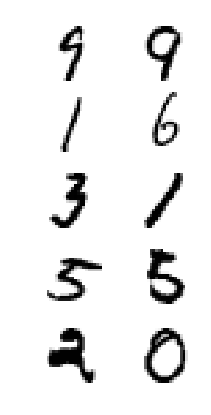

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(3, 3 * batch_size))
plt.subplot(121)
plt.imshow(X_batch[:,0].reshape(28 * batch_size, 28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.subplot(122)
plt.imshow(X_batch[:,1].reshape(28 * batch_size, 28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()

And let's look at the labels (0 means "different", 1 means "same"):

In [64]:
y_batch

array([[1],
       [0],
       [0],
       [1],
       [0]])

Perfect!

### 10.3.
_Exercise: train the DNN on this training set. For each image pair, you can simultaneously feed the first image to DNN A and the second image to DNN B. The whole network will gradually learn to tell whether two images belong to the same class or not._

Let's generate a test set composed of many pairs of images pulled from the MNIST test set:

In [65]:
X_test1, y_test1 = generate_batch(X_test, y_test, batch_size=len(X_test))

And now, let's train the model. There's really nothing special about this step, except for the fact that we need a fairly large `batch_size`, otherwise the model fails to learn anything and ends up with an accuracy of 50%:

In [66]:
n_epochs = 100
batch_size = 500

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = generate_batch(X_train1, y_train1, batch_size)
            loss_val, _ = sess.run([loss, training_op], feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Train loss:", loss_val)
        if epoch % 5 == 0:
            acc_test = accuracy.eval(feed_dict={X: X_test1, y: y_test1})
            print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_digit_comparison_model.ckpt")

0 Train loss: 0.492426
0 Test accuracy: 0.7861
1 Train loss: 0.334813
2 Train loss: 0.290434
3 Train loss: 0.253434
4 Train loss: 0.217843
5 Train loss: 0.17127
5 Test accuracy: 0.9185
6 Train loss: 0.207128
7 Train loss: 0.172275
8 Train loss: 0.166782
9 Train loss: 0.161094
10 Train loss: 0.125131
10 Test accuracy: 0.9425
11 Train loss: 0.159824
12 Train loss: 0.124752
13 Train loss: 0.112234
14 Train loss: 0.114502
15 Train loss: 0.0950093
15 Test accuracy: 0.9532
16 Train loss: 0.119296
17 Train loss: 0.0754429
18 Train loss: 0.112295
19 Train loss: 0.133708
20 Train loss: 0.113547
20 Test accuracy: 0.9596
21 Train loss: 0.0674082
22 Train loss: 0.0936298
23 Train loss: 0.0986469
24 Train loss: 0.111875
25 Train loss: 0.0735622
25 Test accuracy: 0.9675
26 Train loss: 0.0790325
27 Train loss: 0.0487644
28 Train loss: 0.0869071
29 Train loss: 0.0694422
30 Train loss: 0.0600889
30 Test accuracy: 0.9663
31 Train loss: 0.103903
32 Train loss: 0.0535952
33 Train loss: 0.0310679
34 Train 

All right, we reach 97.6% accuracy on this digit comparison task. That's not too bad, this model knows a thing or two about comparing handwritten digits!

Let's see if some of that knowledge can be useful for the regular MNIST classification task.

### 10.4.
_Exercise: now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons. Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class._

Let's create the model, it is pretty straightforward. There are many ways to freeze the lower layers, as explained in the book. In this example, we chose to use the `tf.stop_gradient()` function. Note that we need one `Saver` to restore the pretrained DNN A, and another `Saver` to save the final model: 

In [67]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

dnn_outputs = dnn(X, name="DNN_A")
frozen_outputs = tf.stop_gradient(dnn_outputs)

logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init)
Y_proba = tf.nn.softmax(logits)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

dnn_A_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="DNN_A")
restore_saver = tf.train.Saver(var_list={var.op.name: var for var in dnn_A_vars})
saver = tf.train.Saver()

Now on to training! We first initialize all variables (including the variables in the new output layer), then we restore the pretrained DNN A. Next, we just train the model on the small MNIST dataset (containing just 5,000 images):

In [68]:
n_epochs = 100
batch_size = 50

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_digit_comparison_model.ckpt")

    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_digit_comparison_model.ckpt
0 Test accuracy: 0.9269
10 Test accuracy: 0.9665
20 Test accuracy: 0.9671
30 Test accuracy: 0.967
40 Test accuracy: 0.9673
50 Test accuracy: 0.9675
60 Test accuracy: 0.9676
70 Test accuracy: 0.9676
80 Test accuracy: 0.9677
90 Test accuracy: 0.9675


Well, 96.7% accuracy, that's not the best MNIST model we have trained so far, but recall that we are only using a small training set (just 500 images per digit). Let's compare this result with the same DNN trained from scratch, without using transfer learning:

In [69]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

dnn_outputs = dnn(X, name="DNN_A")

logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init)
Y_proba = tf.nn.softmax(logits)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

dnn_A_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="DNN_A")
restore_saver = tf.train.Saver(var_list={var.op.name: var for var in dnn_A_vars})
saver = tf.train.Saver()

In [70]:
n_epochs = 150
batch_size = 50

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model_final.ckpt")

0 Test accuracy: 0.8893
10 Test accuracy: 0.9402
20 Test accuracy: 0.9474
30 Test accuracy: 0.9475
40 Test accuracy: 0.9472
50 Test accuracy: 0.9471
60 Test accuracy: 0.9474
70 Test accuracy: 0.9473
80 Test accuracy: 0.9475
90 Test accuracy: 0.9474
100 Test accuracy: 0.9475
110 Test accuracy: 0.9475
120 Test accuracy: 0.9476
130 Test accuracy: 0.9477
140 Test accuracy: 0.9476


Only 94.8% accuracy... So transfer learning helped us reduce the error rate from 5.2% to 3.3% (that's over 36% error reduction). Moreover, the model using transfer learning reached over 96% accuracy in less than 10 epochs.

Bottom line: transfer learning does not always work (as we saw in exercise 9), but when it does it can make a big difference. So try it out!